In [2112]:
import sys
import numpy as np
import math
import time

import pickle

from tqdm import tqdm

import flory

sys.path.append('../..')
print(np.__version__)


import matplotlib.pyplot as plt
import mpltern
#import matplotlib as mpl
import matplotlib as mpl

from mpltern.datasets import get_shanon_entropies

import importlib

from scipy import cluster, spatial

from scipy.optimize import minimize
from scipy.optimize import basinhopping
from scipy.optimize import differential_evolution

#sys.path.append('/Users/calvinsmith/dufresne_lab/lab_work/llps_classification')
import flory_generate as gen
import flory_plots as plots
import flory_classifier


importlib.reload(gen)
importlib.reload(plots)
importlib.reload(flory_classifier)

from flory_classifier import FloryClassifier

2.0.0
2.0.0


# Phi_Out Normalized Plots

Normalize the plot of the phi_out

In [2113]:
file_path = 'llps_data/data_plane_8_8_strength_4.pickle'
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)
plane_data = loaded_data

In [2114]:
def normalize_points(data):
    drop = min(data)
    data = data - drop
    scale = 1/max(data)
    data = data*scale
    return data

def step_func(x):
        '''Goal Function '''
        if x >= 0.5:
            return 0
        elif 0 <= x < 0.5:
            return 1
        else: 
            raise Exception("Sorry, no numbers below zero")
            
   

def calc_loss(data,index):
        '''Calculate the Loss'''
        loss = 0
        for i in range(len(data)):
            #loss += (step_func(point[0]) - point[1])**2
            loss += abs(step_func(index[i]) - data[i])
            #print(abs(step_func(index[i]) - data[i]))
        return loss



[0.  0.2 0.4 0.6 0.8 1. ]
Data: [np.float64(0.09999999994562205), np.float64(0.09999999941437158), np.float64(0.09999999986798185), np.float64(0.09640796315272472), np.float64(0.06930021669830623), np.float64(0.055945749209299594)]
Loss: 1.221600212052884
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [np.float64(0.0999999999883947), np.float64(0.10000000116251379), np.float64(0.10000000320183618), np.float64(0.088810699604862), np.float64(0.06809952903395723), np.float64(0.06928693849483895)]
Loss: 0.6864658239657253
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [np.float64(0.10000000010540518), np.float64(0.10000000089040428), np.float64(0.09999999095461605), np.float64(0.07827232581080536), np.float64(0.07269957148692276), np.float64(0.06726235098049439)]
Loss: 0.5023942189737939
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [np.float64(0.09999999922048941), np.float64(0.09999999060996743), np.float64(0.09092411460837316), np.float64(0.07268354901058988), np.float64(0.06770160113139535), np.float64(0.06211889963670739)]
Loss

/var/folders/9m/cpndqfzd1gz4mnj2t5nxdph00000gn/T/ipykernel_39227/2969753658.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


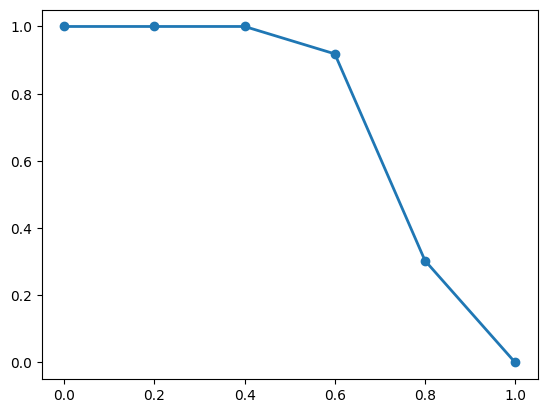

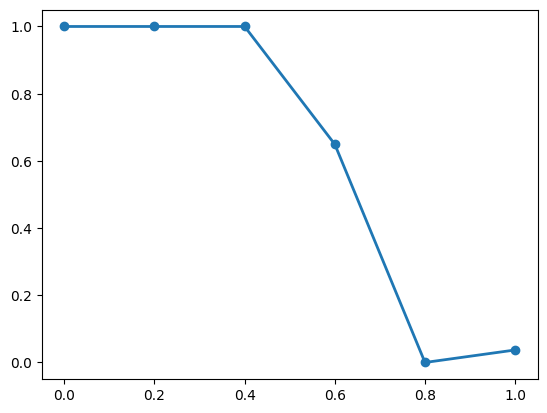

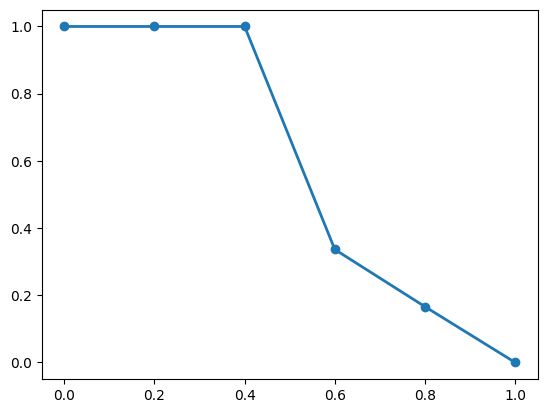

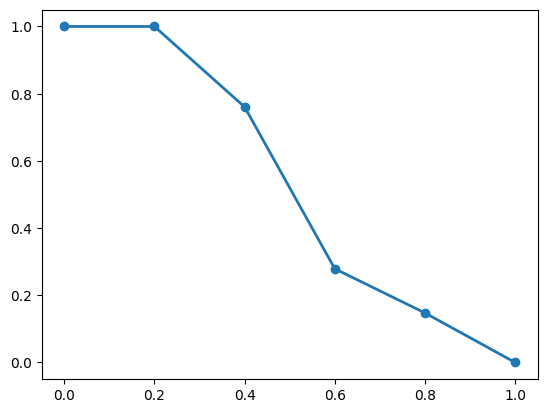

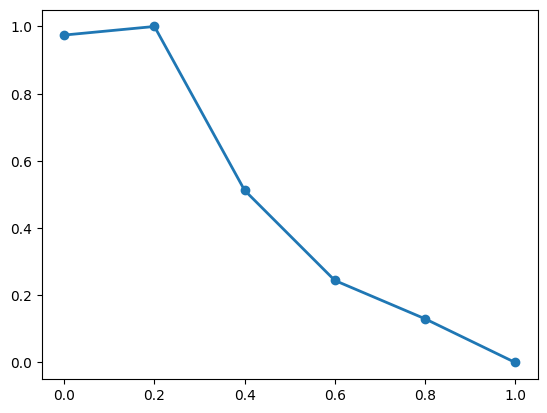

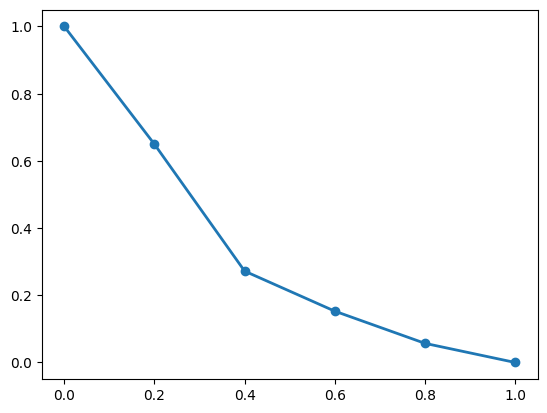

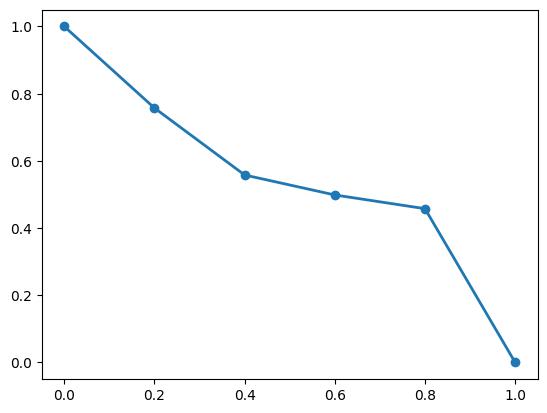

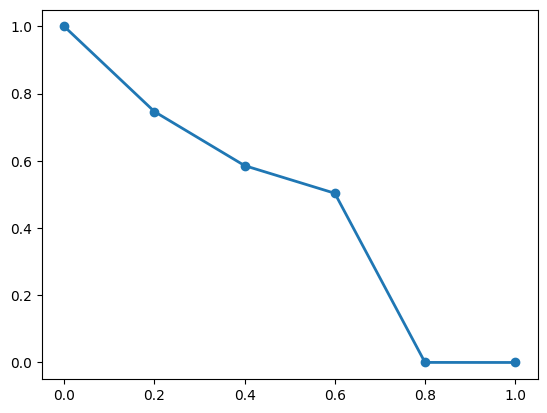

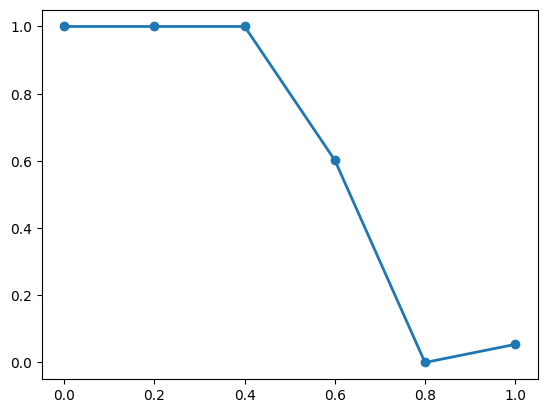

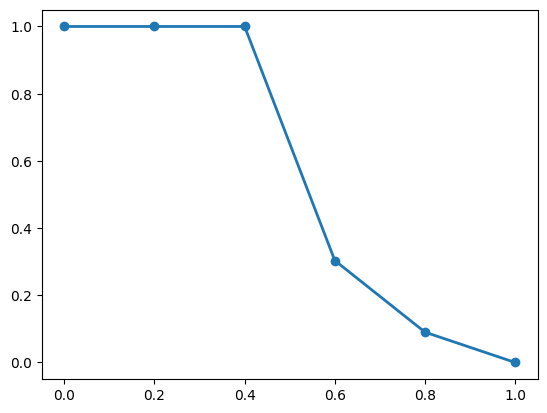

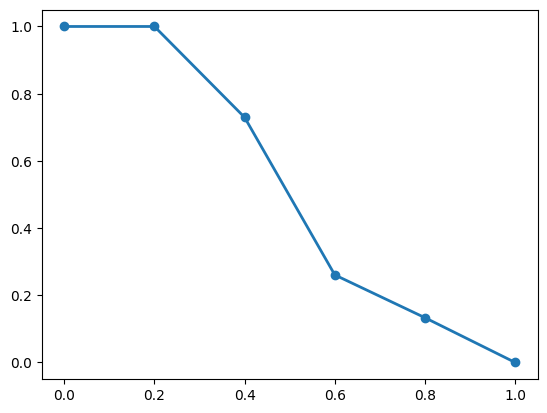

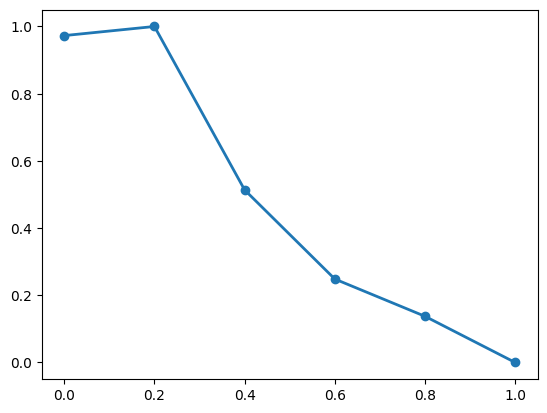

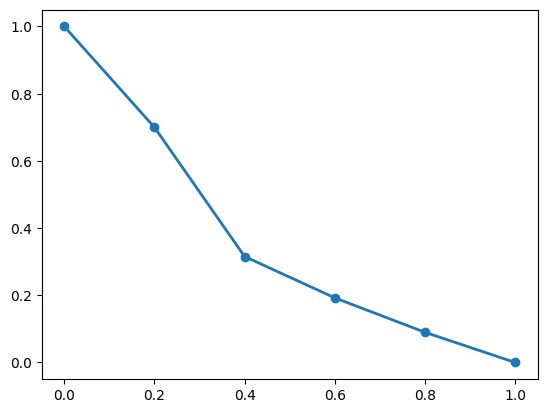

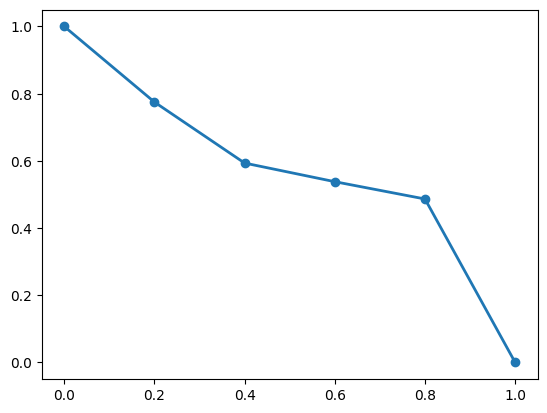

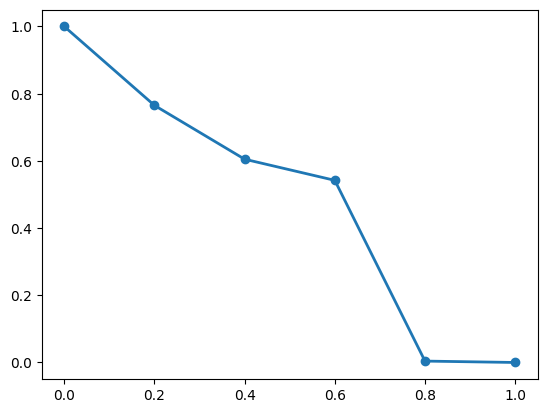

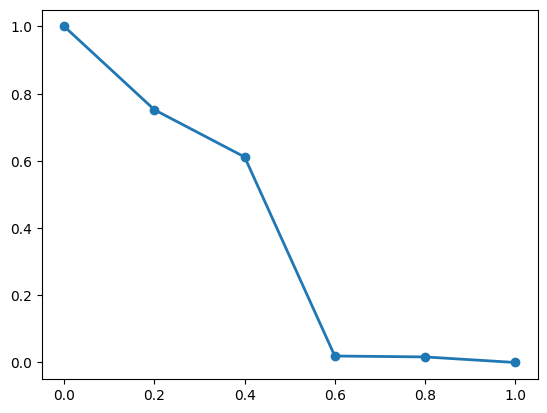

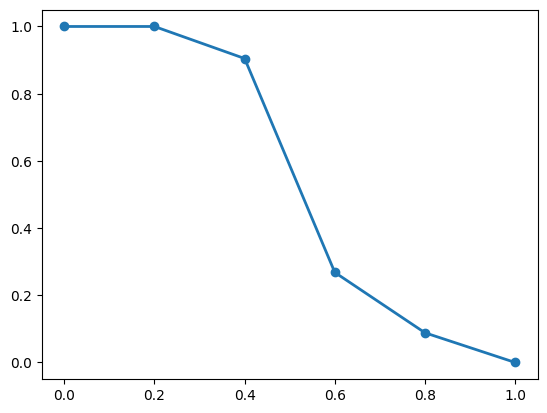

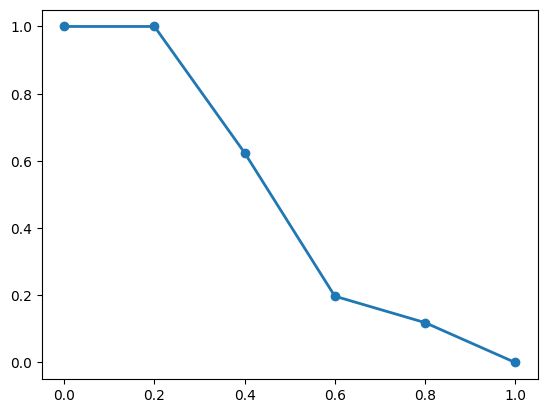

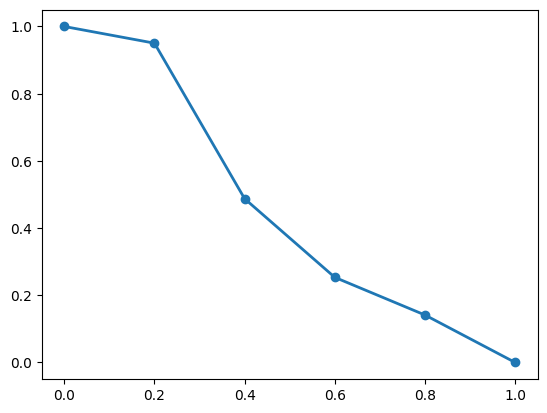

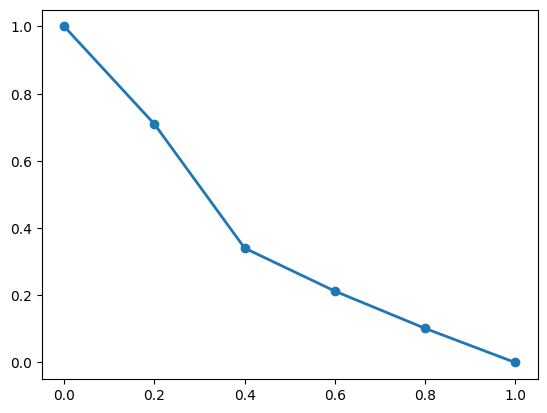

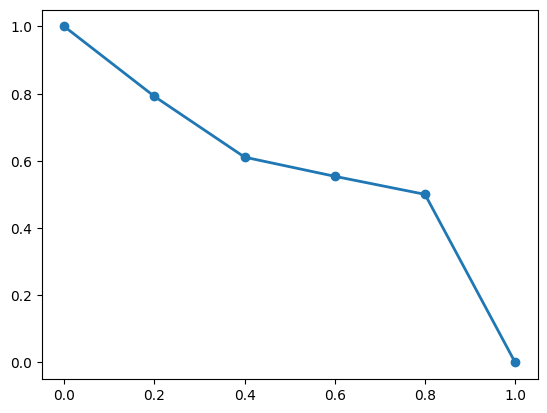

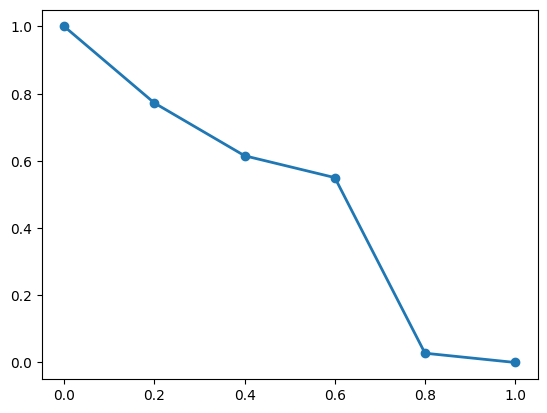

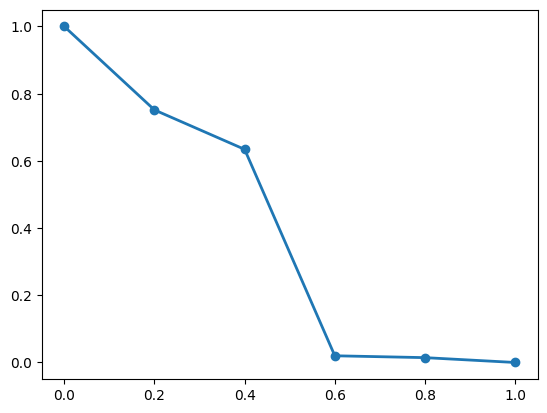

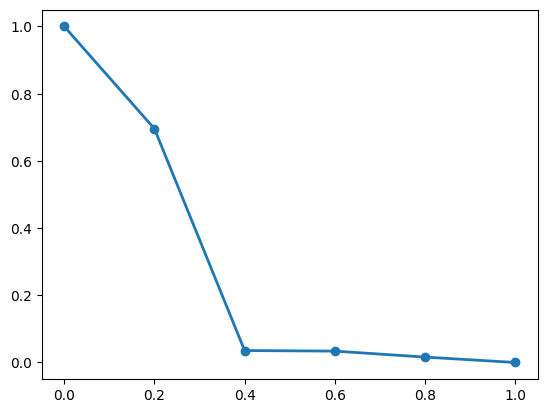

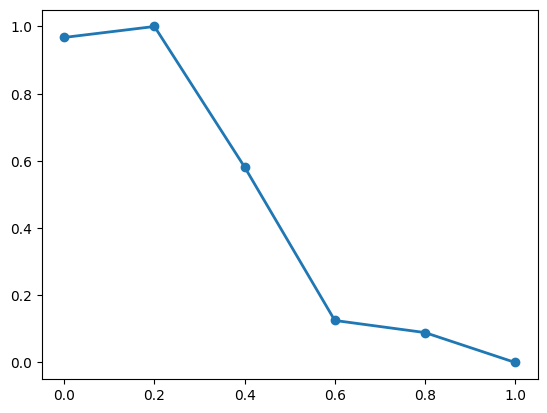

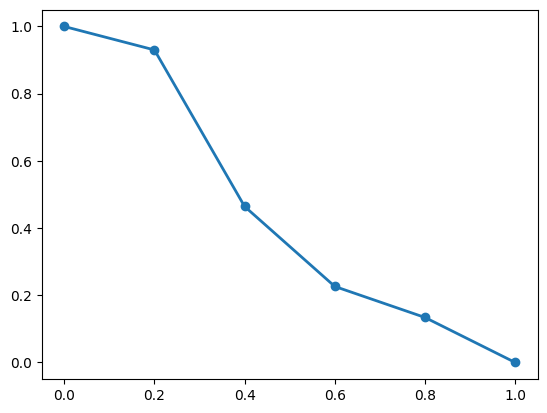

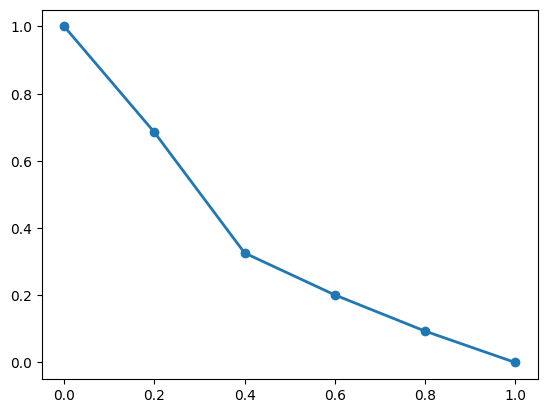

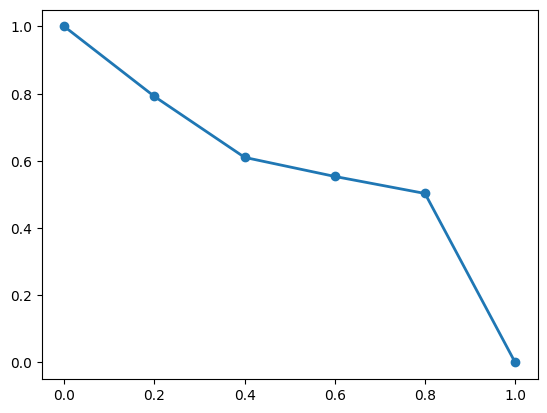

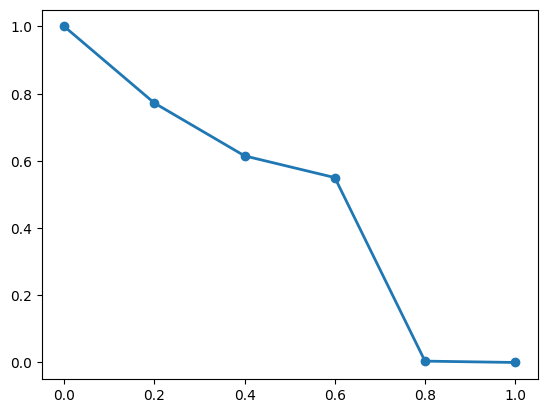

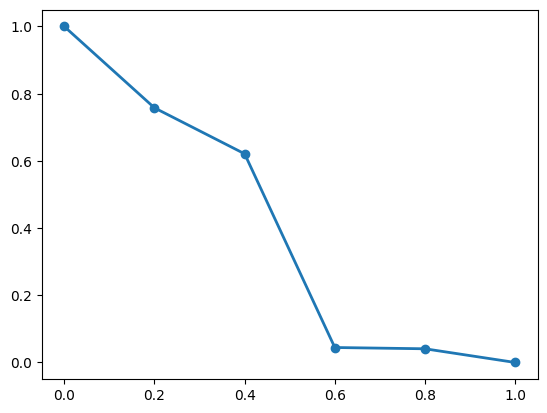

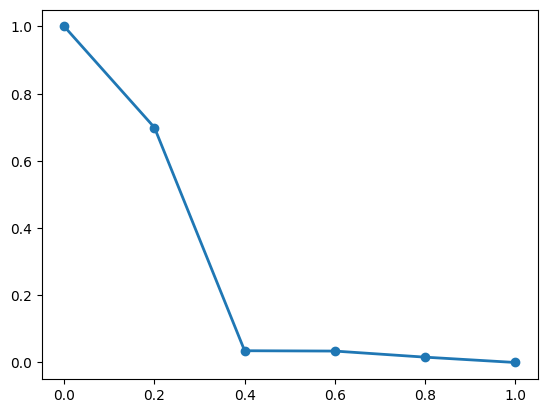

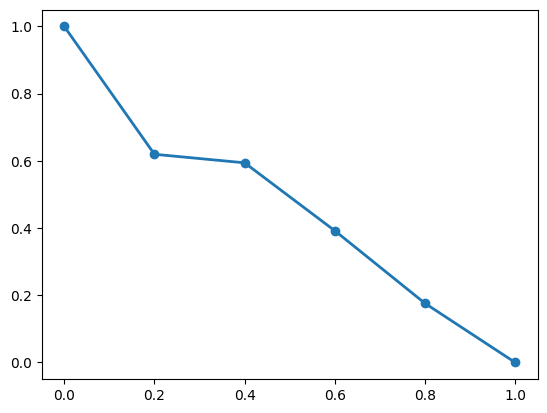

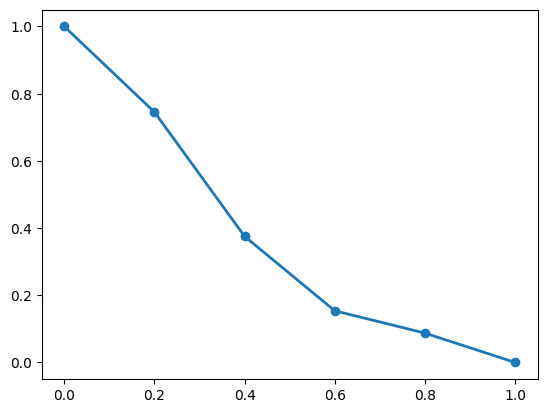

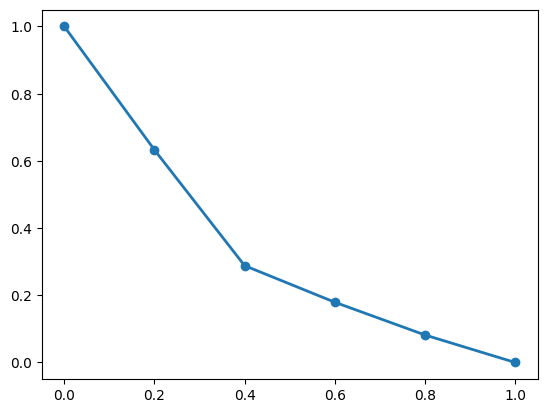

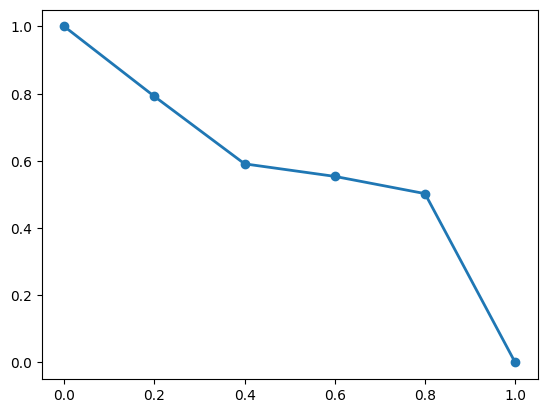

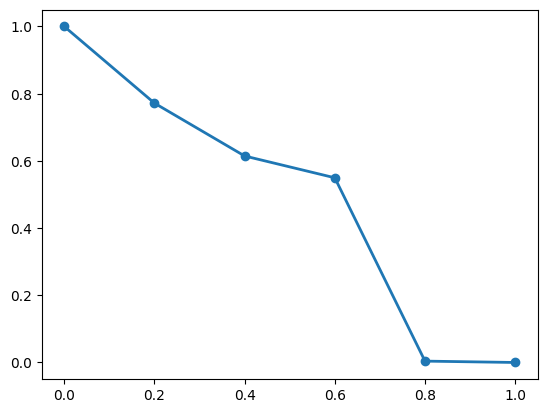

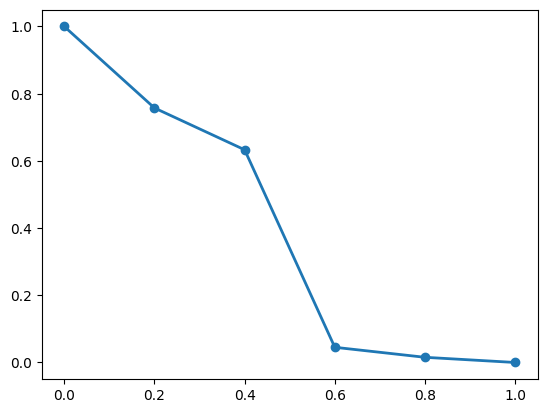

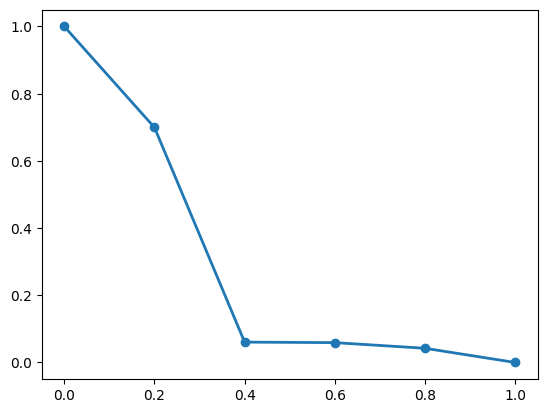

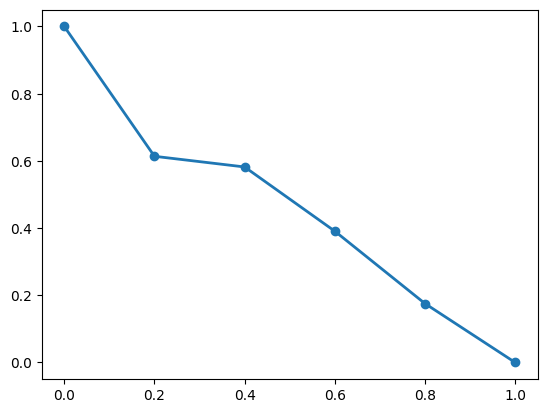

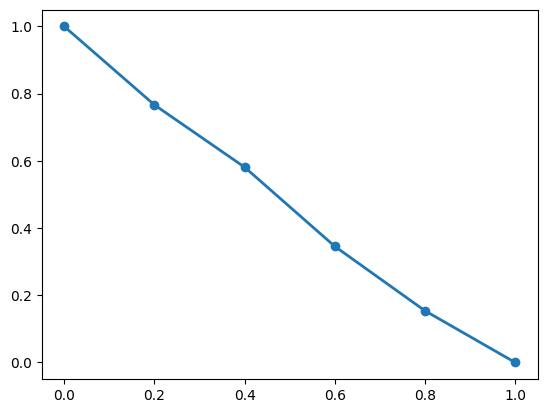

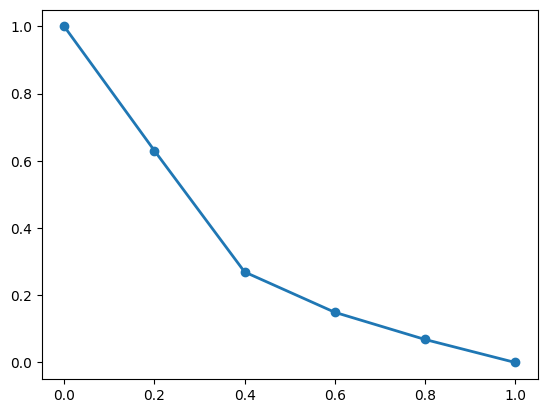

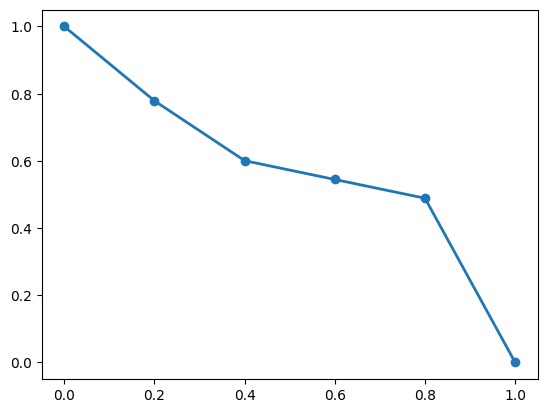

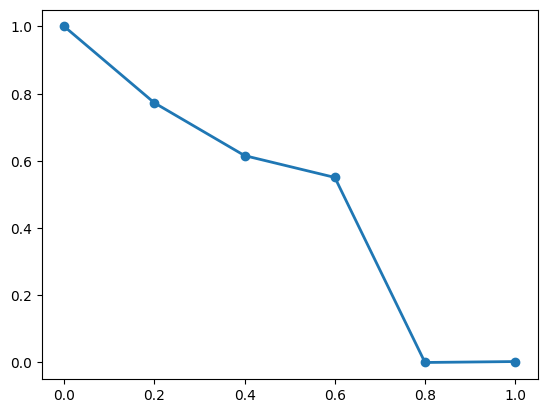

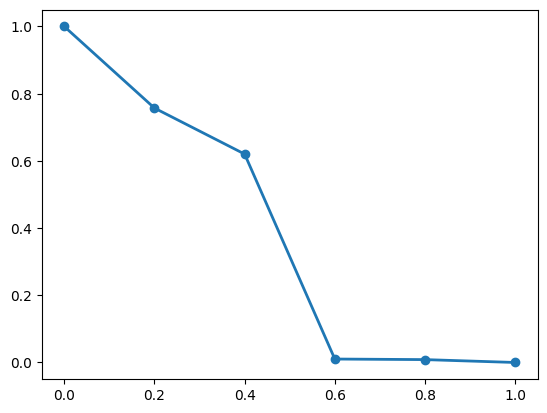

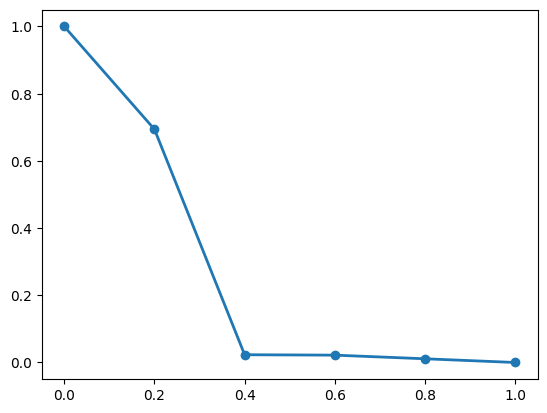

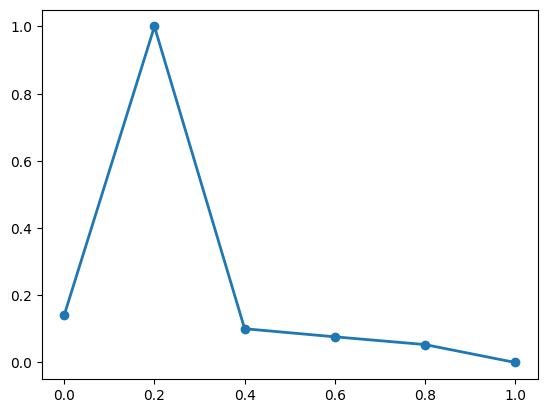

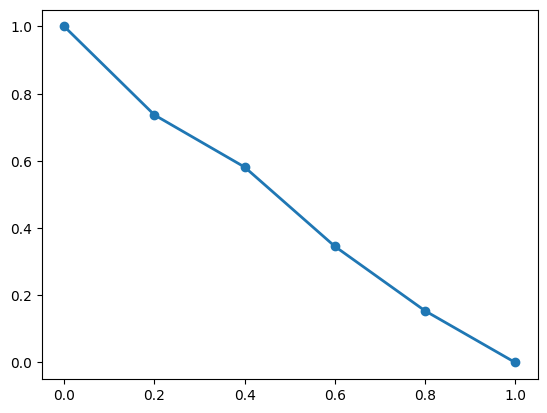

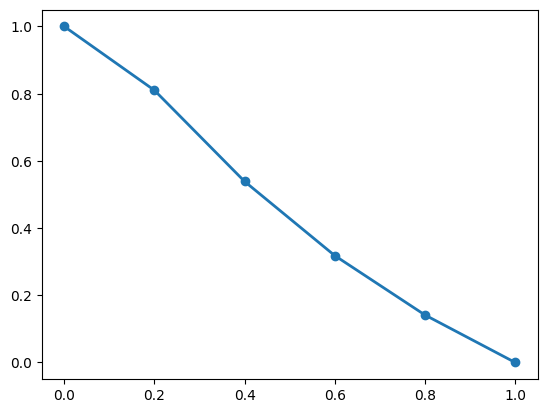

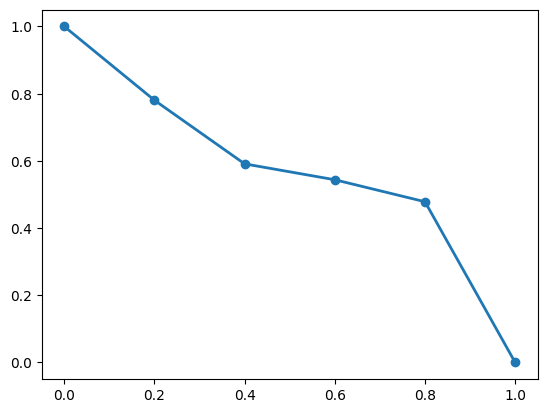

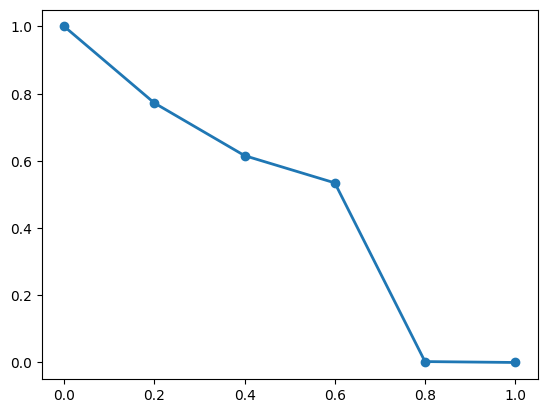

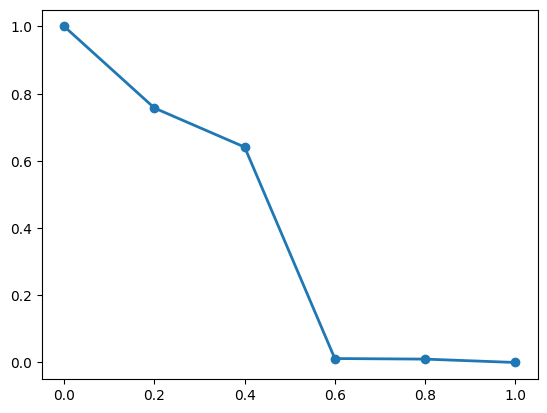

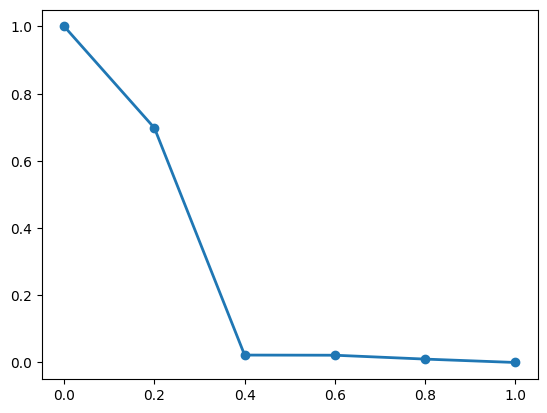

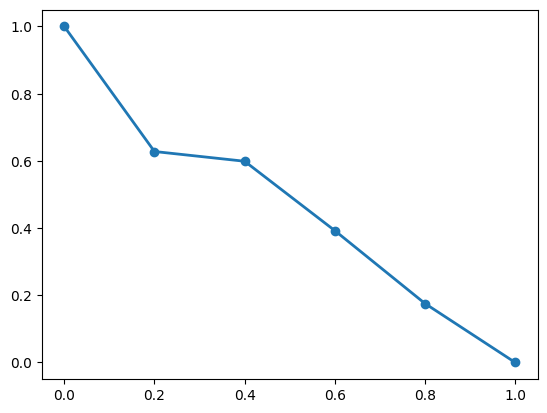

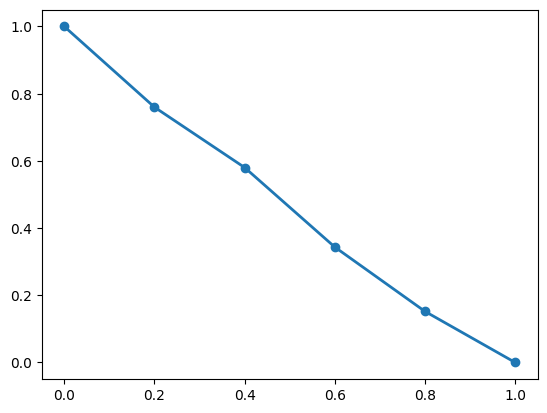

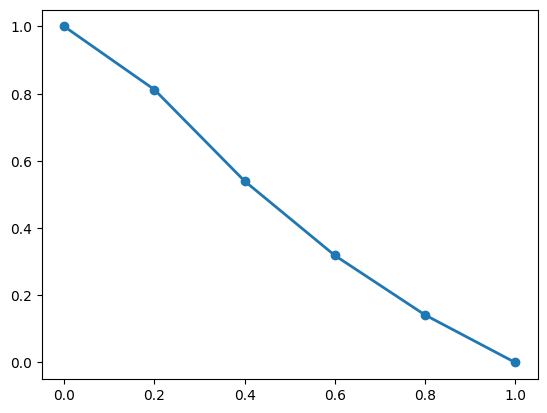

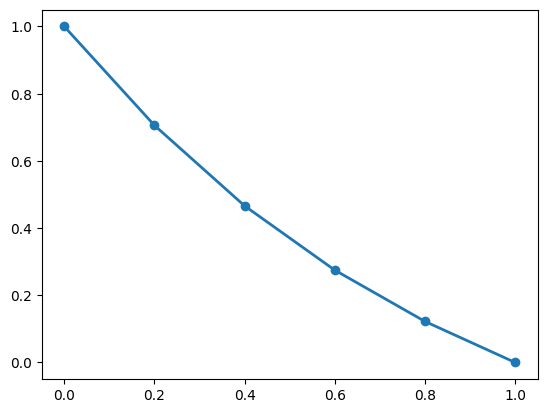

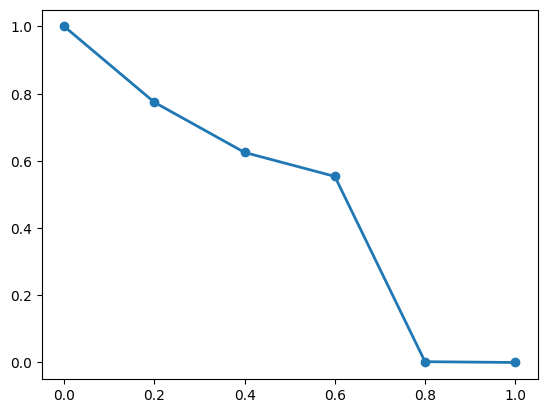

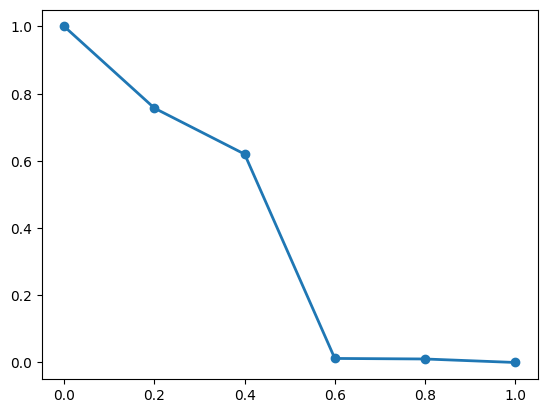

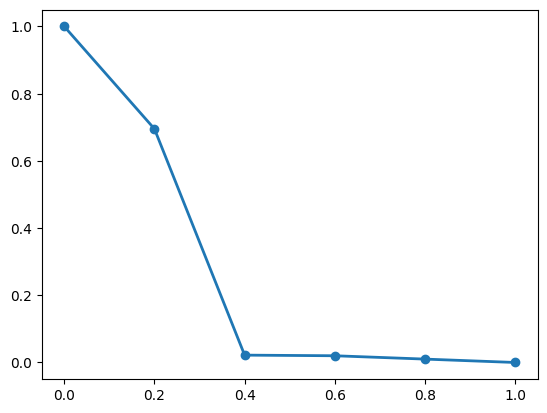

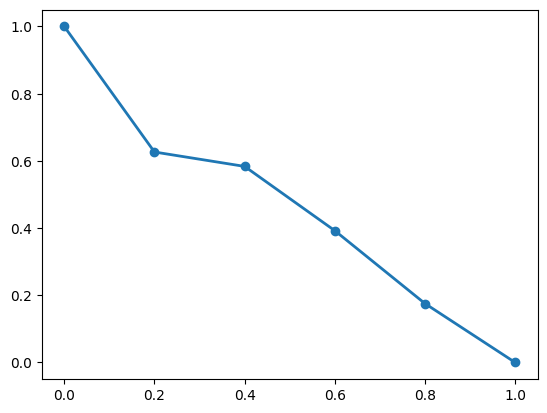

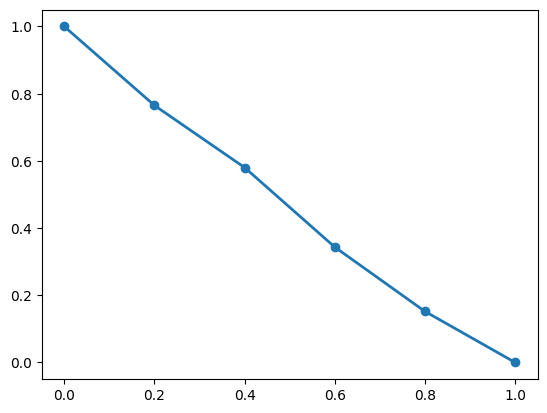

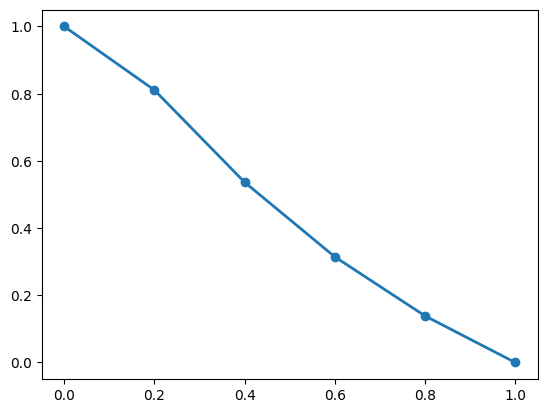

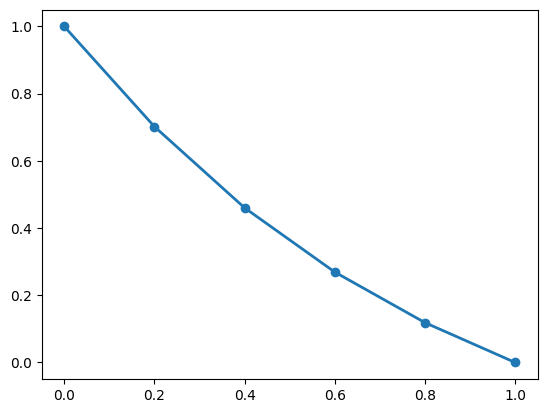

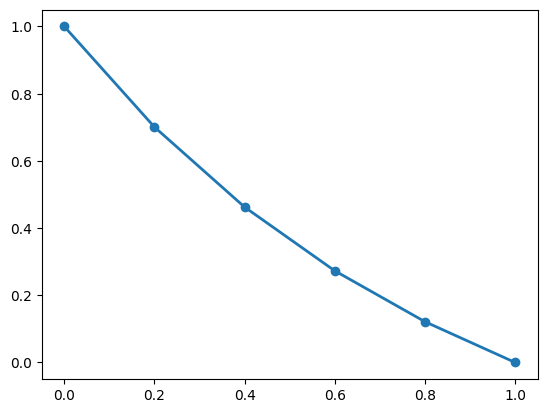

In [2115]:

loss_map = np.zeros((8,8))

for x in range(8):
    for y in range(8):
        out_data = []
        evolved_points = plane_data[x][y]
        dilute_comp_points = []
        for phase in evolved_points:
            z = gen.most_dilute_flory(phase)
            dilute_comp_points.append(z)
        for phase in dilute_comp_points:
            out_data.append(phase[-2])
        norm_points = np.linspace(0,1,len(evolved_points))
        print(norm_points)
        print(f"Data: {out_data}")
        out_data = normalize_points(out_data)
        tot_loss = calc_loss(out_data,norm_points)
        
        print(f"Loss: {tot_loss}")
        loss_map[x][y] = tot_loss
        plt.figure()
        plt.scatter(norm_points,out_data)
        plt.plot(norm_points,out_data, linewidth = 2.0)
        #plt.show()        
        

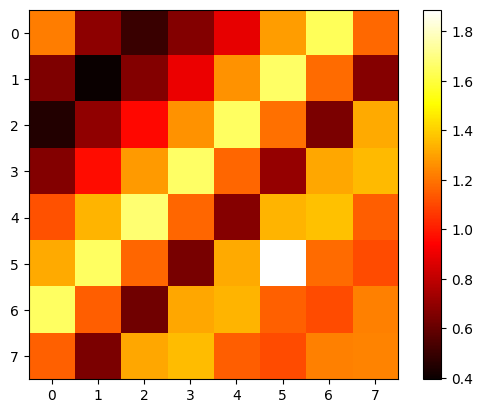

In [2116]:

plt.imshow(loss_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [2069]:
def plot_phase_space(phase_space_data,Nx,Ny,plotFlag = False, heatFlag = True):
        
    loss_map = np.zeros((Nx,Ny))
    
    for x in range(Nx):
        for y in range(Ny):
            out_data = []
            evolved_points = phase_space_data[x][y]
            dilute_comp_points = []
            for phase in evolved_points:
                z = gen.most_dilute_flory(phase)
                dilute_comp_points.append(z)
            for phase in dilute_comp_points:
                out_data.append(phase[-3])
            norm_points = np.linspace(0,1,len(evolved_points))
            out_data = normalize_points(out_data)
            tot_loss = calc_loss(out_data,norm_points)
            
            
            loss_map[x][y] = tot_loss
            if plotFlag:
                print(f"Loss: {tot_loss}")
                print(f"Data: {out_data}")
                plt.figure()
                plt.scatter(norm_points,out_data)
                plt.plot(norm_points,out_data, linewidth = 2.0)
                plt.show()
    if heatFlag:                 
        plt.imshow(loss_map, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()                

    return loss_map
            

Loss: 2.6611408186968144
Data: [0.70935442 0.70935345 0.90362472 0.98347341 1.         0.        ]


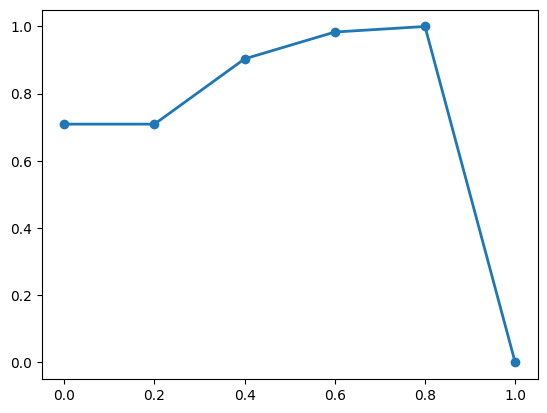

Loss: 1.807178121378095
Data: [0.76009976 0.7826278  0.91329964 1.         0.26320533 0.        ]


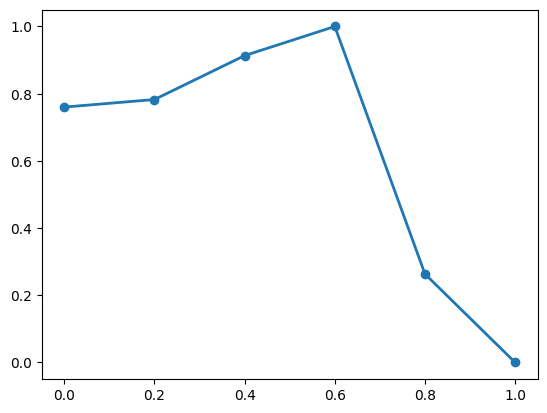

Loss: 2.5539639696585503
Data: [0.48199945 0.53261106 0.62974694 1.         0.19832142 0.        ]


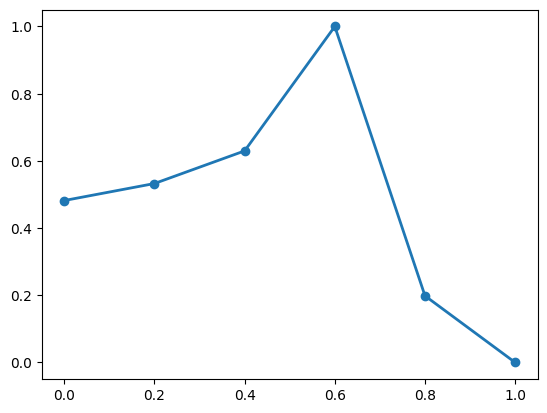

Loss: 1.0156744554154424
Data: [0.70923676 0.8213412  1.         0.35781756 0.18843486 0.        ]


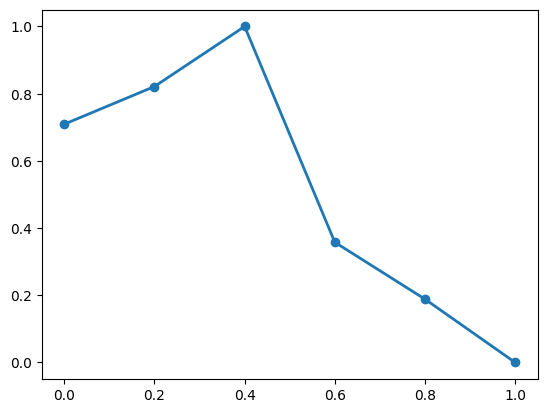

Loss: 1.0156264606824739
Data: [0.57655065 0.78312479 1.         0.26912678 0.10617512 0.        ]


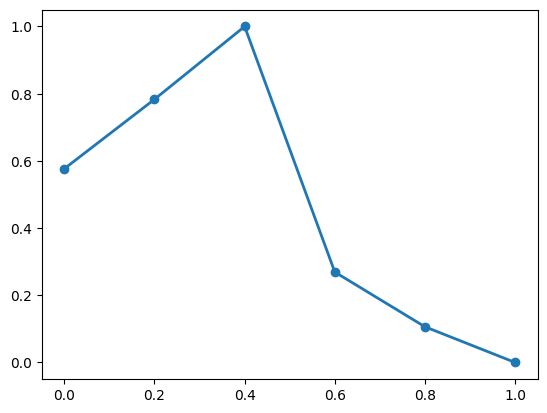

Loss: 2.201431173596559
Data: [0.78262073 0.78990136 0.95117181 1.         0.72512508 0.        ]


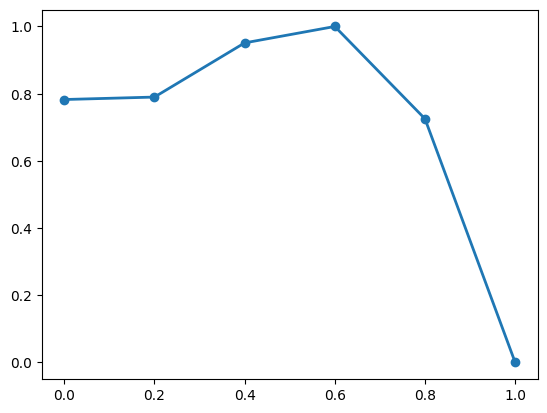

Loss: 1.9187298758834106
Data: [0.78768303 0.84689842 0.91891345 1.         0.47222477 0.        ]


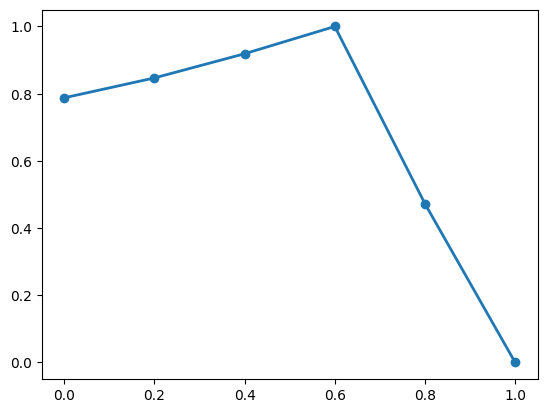

Loss: 1.7279232042906825
Data: [0.7392736  0.81737008 0.95765018 1.         0.24221707 0.        ]


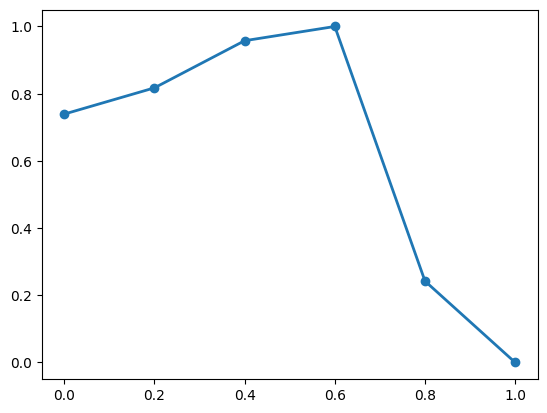

Loss: 0.9722535129408134
Data: [0.7468784  0.9025587  1.         0.48446883 0.13722179 0.        ]


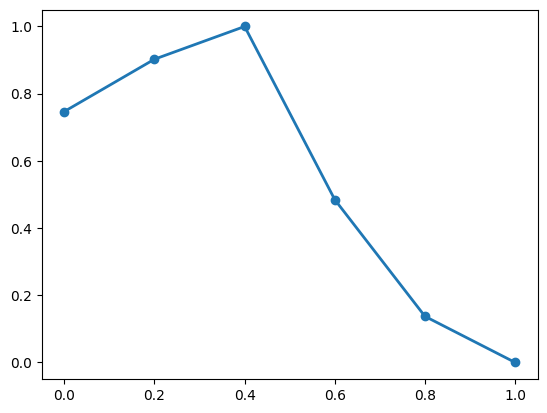

Loss: 0.5761740186323578
Data: [0.8847861  1.         0.89810874 0.27072427 0.08834459 0.        ]


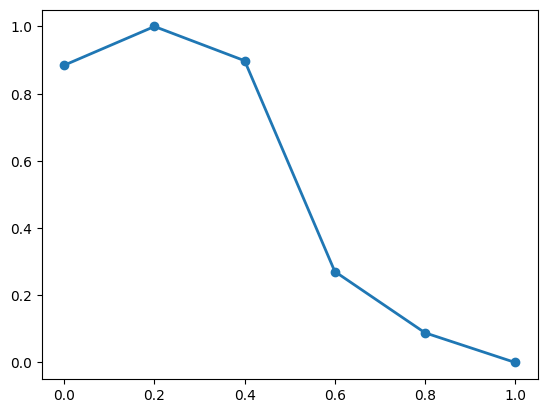

Loss: 2.0377347147330607
Data: [0.74120312 0.79786338 0.86679839 1.         0.44359961 0.        ]


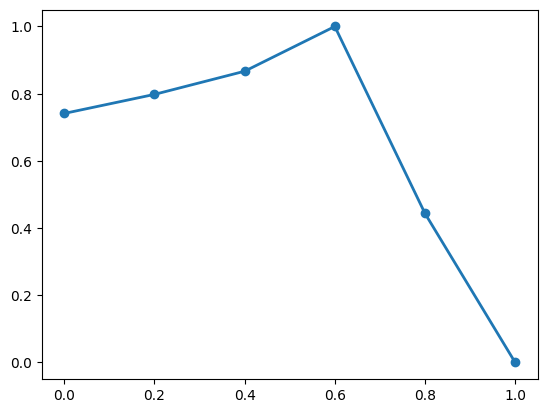

Loss: 1.797479010644871
Data: [0.73581877 0.80686965 0.89901417 1.         0.23918161 0.        ]


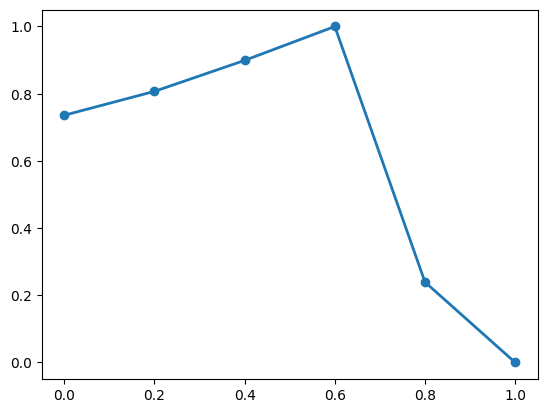

Loss: 1.0337133964730223
Data: [0.74121193 0.84965434 1.         0.48949504 0.13508462 0.        ]


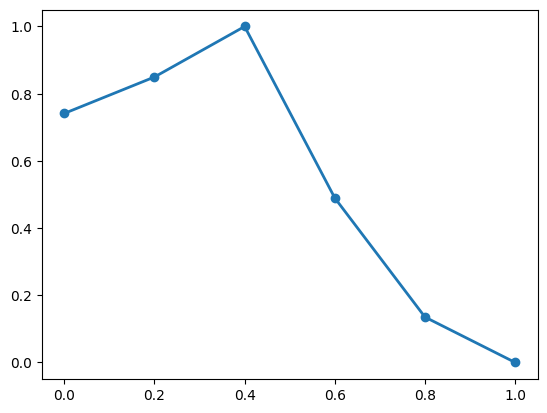

Loss: 0.5837785494688766
Data: [0.88154488 1.         0.8879741  0.26619194 0.0871056  0.        ]


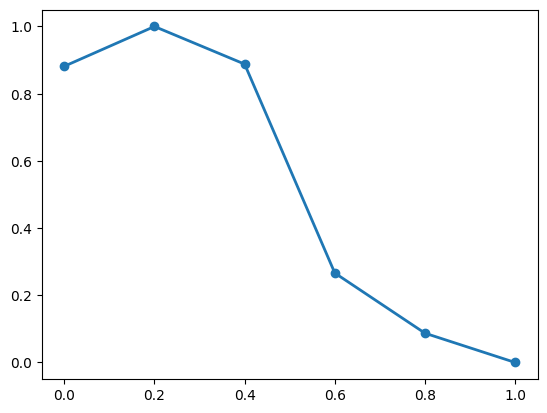

Loss: 0.8358987468974732
Data: [0.95105954 1.         0.40659797 0.14213489 0.05142136 0.        ]


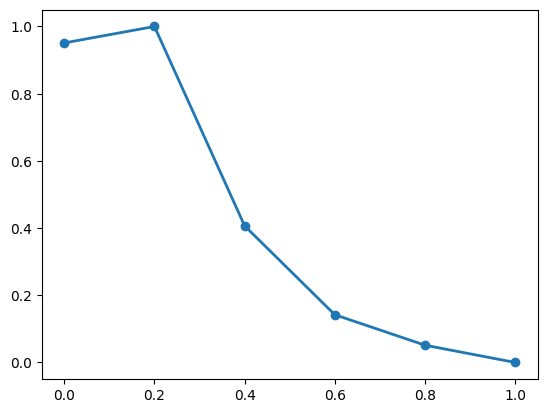

Loss: 1.4206775691699862
Data: [0.70456473 0.85124581 1.         0.74934406 0.22714405 0.        ]


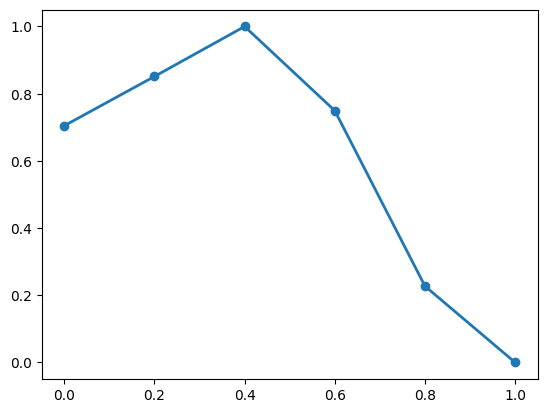

Loss: 0.9115053699893405
Data: [0.80567789 0.88748413 1.         0.47237685 0.13229054 0.        ]


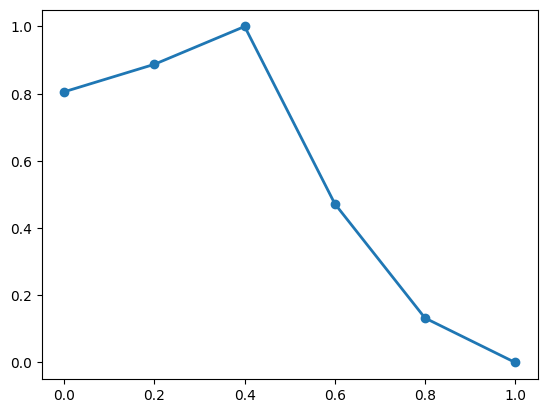

Loss: 0.5901880998242838
Data: [0.88259781 1.         0.87196563 0.25957911 0.08517244 0.        ]


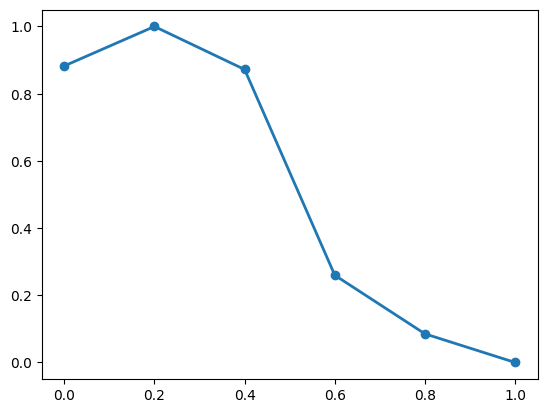

Loss: 0.8476848512634325
Data: [0.94480663 1.         0.39712128 0.13917239 0.05044037 0.        ]


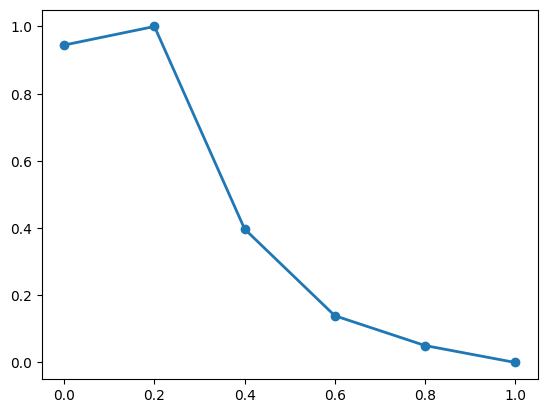

Loss: 1.095429837841013
Data: [1.         0.82125313 0.2087003  0.09067837 0.0347049  0.        ]


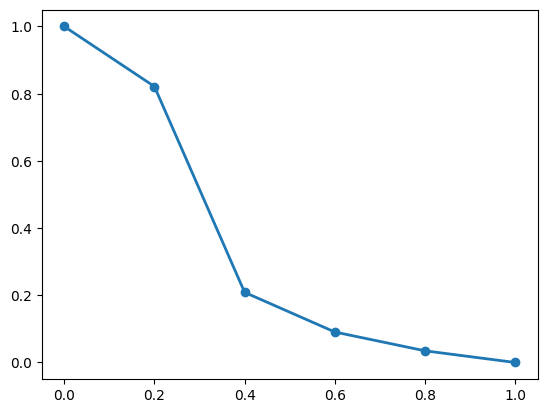

Loss: 0.7579743751606215
Data: [0.81476834 1.         0.95800039 0.40816612 0.12257698 0.        ]


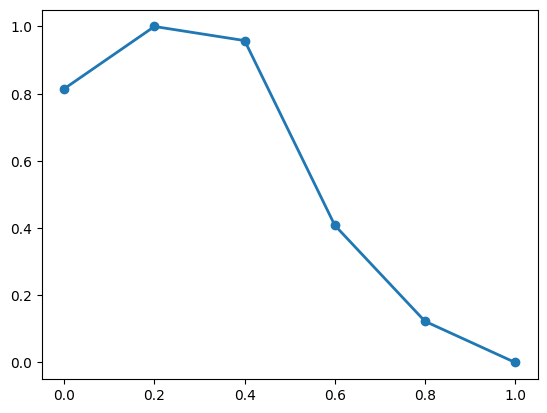

Loss: 0.4875308254645995
Data: [0.99228869 1.         0.85668756 0.25320519 0.08330189 0.        ]


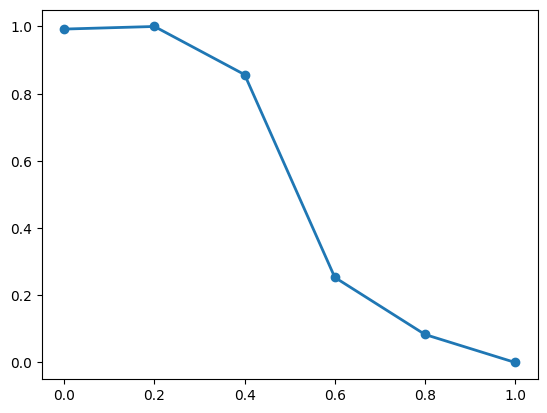

Loss: 0.8558295946359287
Data: [0.93766395 1.         0.39224684 0.13626235 0.04947804 0.        ]


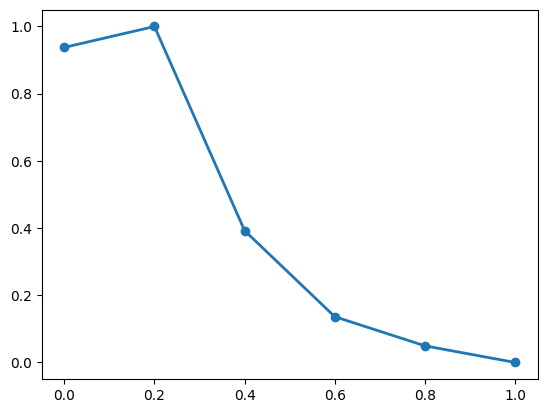

Loss: 1.0958739508630202
Data: [1.         0.82192809 0.20699116 0.09022702 0.03456618 0.        ]


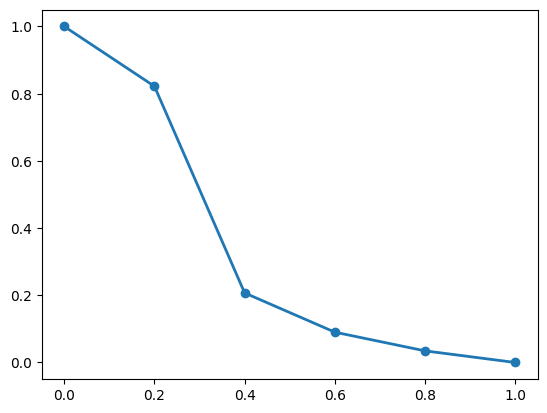

Loss: 4.688370740507363
Data: [0.25896075 0.10516847 0.         1.         0.64314009 0.40935987]


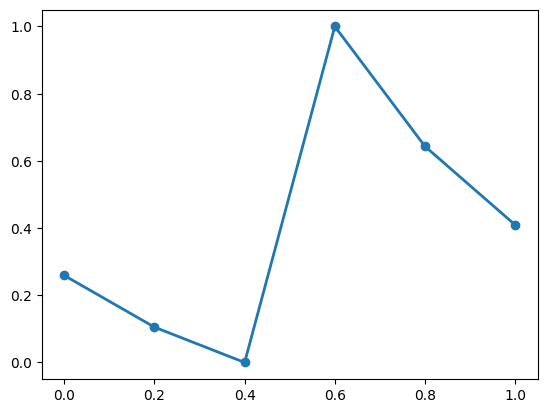

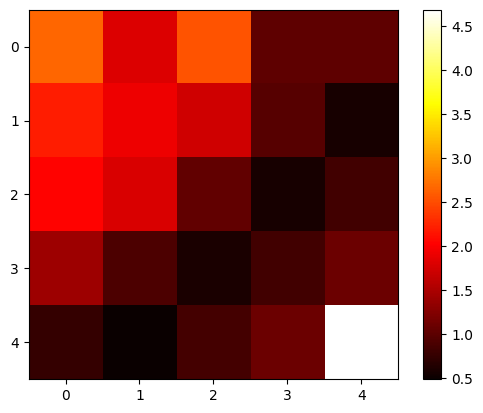

array([[2.66114082, 1.80717812, 2.55396397, 1.01567446, 1.01562646],
       [2.20143117, 1.91872988, 1.7279232 , 0.97225351, 0.57617402],
       [2.03773471, 1.79747901, 1.0337134 , 0.58377855, 0.83589875],
       [1.42067757, 0.91150537, 0.5901881 , 0.84768485, 1.09542984],
       [0.75797438, 0.48753083, 0.85582959, 1.09587395, 4.68837074]])

# Generate Phase Space for 10x10 with differnet Chi_matrices

In [2078]:
fc = FloryClassifier()

chi_matrix = gen.chi_matrix_strong_out(6,2,4,7)
fc.set_chi_matrix_multi(chi_matrix)

fc.phi_in_range = [0.02,0.2]
fc.get_info()
fc.generate_data_plane(10,10,[0.02,0.25],[0.02,0.25])

num_comps: 6 
H_DIM: 2
Phi_out_vector: [0.1, 0.1]
Phi_in_range: [0.02, 0.2]
num_of_points: 6
CHI_STRENGTH: 4 
 CHI_MATRIX: 
 [[0.         2.54471433 3.3375197  7.13757764 6.53232867 0.        ]
 [2.54471433 0.         3.04743209 5.58055641 5.23971724 0.        ]
 [3.3375197  3.04743209 0.         6.80128374 7.513048   0.        ]
 [7.13757764 5.58055641 6.80128374 0.         6.69943388 0.        ]
 [6.53232867 5.23971724 7.513048   6.69943388 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                    | 0/10 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  5.15it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  4.67it/s]

 50%|██████████████████████▌                      | 3/6 [00:00<00:00,  4.55it/s]

 67%|██████████████████████████████               | 4/6 [00:00<00:00,  3.95it/s]

 83%|█████████████████████████████████████▌       | 5/6 [00:08<00:02,  2.96s/it]

100%|█████████████████████████████████████████████| 6/6 [00:16<00:00,  2.73s/it]

 10%|████▍                                       | 1/10 [00:16<02:27, 16.36s/it]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:01,  4.40it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  4.21it/s]

 50%|███████████

File Created at llps_data/data_plane_10_10_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x32cb0bf50>,

       [[<flory.common.phases.Phases object at 0x32cad4aa0>,

       [[<flory.common.phases.Phases object at 0x32ca32210>,

       [[<flory.common.phases.Phases object at 0x32cbbeed0>,

       [[<flory.common.phases.Phases object at 0x32ca33680>,

       [[<flory.common.phases.Phases object at 0x32cb4b320>,

       [[<flory.common.phases.Phases object at 0x32cbbdc40>,

       [[<flory.common.phases.Phases object at 0x32cb0bb30>,

       [[<flory.common.phases.Phases object at 0x32ca54050>,

       [[<flory.common.phases.Phases object at 0x32ca9eff0>,
      dtype=object)

In [2117]:
fc.reset_rand_chi_matrix(6,4)
fc.generate_data_plane(8,8,[0.02,0.25],[0.02,0.25])

Reset CHI_MATRIX: 
 [[0.         4.85892407 4.87151026 4.07730667 4.05755138 0.        ]
 [4.85892407 0.         4.36073638 3.09566279 5.24904065 0.        ]
 [4.87151026 4.36073638 0.         4.76567169 4.83980518 0.        ]
 [4.07730667 3.09566279 4.76567169 0.         4.70931009 0.        ]
 [4.05755138 5.24904065 4.83980518 4.70931009 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                     | 0/8 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  5.41it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  5.94it/s]

 50%|██████████████████████▌                      | 3/6 [00:00<00:00,  6.13it/s]

 67%|██████████████████████████████               | 4/6 [00:00<00:00,  6.24it/s]

 83%|█████████████████████████████████████▌       | 5/6 [00:00<00:00,  6.28it/s]

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.19it/s]

 12%|█████▋                                       | 1/8 [00:00<00:06,  1.03it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.43it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  6.35it/s]

 50%|███████████

File Created at llps_data/data_plane_8_8_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x14600a4e0>,

       [[<flory.common.phases.Phases object at 0x32cfcc800>,

       [[<flory.common.phases.Phases object at 0x16d3452b0>,

       [[<flory.common.phases.Phases object at 0x338c86ae0>,

       [[<flory.common.phases.Phases object at 0x338c48950>,

       [[<flory.common.phases.Phases object at 0x144c6d940>,

       [[<flory.common.phases.Phases object at 0x16d2ce990>,

       [[<flory.common.phases.Phases object at 0x32cfcc710>,
      dtype=object)

In [ ]:

fc.reset_rand_chi_matrix(6,5)

fc.generate_data_plane(8,8,[0.02,0.25],[0.02,0.25])

Reset CHI_MATRIX: 
 [[0.         6.57488881 4.40818342 4.30324294 5.41636112 0.        ]
 [6.57488881 0.         4.76375082 4.70432411 4.59022014 0.        ]
 [4.40818342 4.76375082 0.         4.54951747 6.42355927 0.        ]
 [4.30324294 4.70432411 4.54951747 0.         4.57171949 0.        ]
 [5.41636112 4.59022014 6.42355927 4.57171949 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                     | 0/8 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.17it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  6.24it/s]

 50%|██████████████████████▌                      | 3/6 [00:00<00:00,  6.18it/s]

 67%|██████████████████████████████               | 4/6 [00:00<00:00,  6.33it/s]

 83%|█████████████████████████████████████▌       | 5/6 [00:00<00:00,  5.33it/s]

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.05it/s]

 12%|█████▋                                       | 1/8 [00:01<00:08,  1.19s/it]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.33it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  6.24it/s]

 50%|███████████

File Created at llps_data/data_plane_8_8_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x32cab9d30>,

       [[<flory.common.phases.Phases object at 0x32caba8d0>,

       [[<flory.common.phases.Phases object at 0x144c6cfe0>,

       [[<flory.common.phases.Phases object at 0x32c840200>,

       [[<flory.common.phases.Phases object at 0x32c840890>,

       [[<flory.common.phases.Phases object at 0x338c49610>,

       [[<flory.common.phases.Phases object at 0x338bca930>,

       [[<flory.common.phases.Phases object at 0x32cfccd10>,
      dtype=object)

In [ ]:

fc.reset_rand_chi_matrix(6,6)
fc.generate_data_plane(8,8,[0.02,0.25],[0.02,0.25])


Reset CHI_MATRIX: 
 [[0.         5.7704781  6.00095753 7.43763888 5.39416502 0.        ]
 [5.7704781  0.         5.25698433 6.87258639 7.49348987 0.        ]
 [6.00095753 5.25698433 0.         6.91427618 6.69226848 0.        ]
 [7.43763888 6.87258639 6.91427618 0.         5.17201033 0.        ]
 [5.39416502 7.49348987 6.69226848 5.17201033 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                     | 0/8 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.40it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  5.63it/s]

 50%|██████████████████████▌                      | 3/6 [00:00<00:00,  4.97it/s]

 67%|██████████████████████████████               | 4/6 [00:00<00:00,  4.13it/s]

 83%|█████████████████████████████████████▌       | 5/6 [00:02<00:00,  1.52it/s]

100%|█████████████████████████████████████████████| 6/6 [00:10<00:00,  1.67s/it]

 12%|█████▋                                       | 1/8 [00:10<01:10, 10.04s/it]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.56it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  6.50it/s]

 50%|███████████

File Created at llps_data/data_plane_8_8_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x338bc91c0>,

       [[<flory.common.phases.Phases object at 0x32cb9bd10>,

       [[<flory.common.phases.Phases object at 0x144c6f2c0>,

       [[<flory.common.phases.Phases object at 0x32cec3b90>,

       [[<flory.common.phases.Phases object at 0x338c49760>,

       [[<flory.common.phases.Phases object at 0x338c49940>,

       [[<flory.common.phases.Phases object at 0x144c6e420>,

       [[<flory.common.phases.Phases object at 0x124f82630>,
      dtype=object)

In [ ]:

fc.reset_rand_chi_matrix(6,6)
fc.generate_data_plane(8,8,[0.02,0.25],[0.02,0.25])


Reset CHI_MATRIX: 
 [[0.         5.7704781  6.00095753 7.43763888 5.39416502 0.        ]
 [5.7704781  0.         5.25698433 6.87258639 7.49348987 0.        ]
 [6.00095753 5.25698433 0.         6.91427618 6.69226848 0.        ]
 [7.43763888 6.87258639 6.91427618 0.         5.17201033 0.        ]
 [5.39416502 7.49348987 6.69226848 5.17201033 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                     | 0/8 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.40it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  5.63it/s]

 50%|██████████████████████▌                      | 3/6 [00:00<00:00,  4.97it/s]

 67%|██████████████████████████████               | 4/6 [00:00<00:00,  4.13it/s]

 83%|█████████████████████████████████████▌       | 5/6 [00:02<00:00,  1.52it/s]

100%|█████████████████████████████████████████████| 6/6 [00:10<00:00,  1.67s/it]

 12%|█████▋                                       | 1/8 [00:10<01:10, 10.04s/it]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.56it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  6.50it/s]

 50%|███████████

File Created at llps_data/data_plane_8_8_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x338bc91c0>,

       [[<flory.common.phases.Phases object at 0x32cb9bd10>,

       [[<flory.common.phases.Phases object at 0x144c6f2c0>,

       [[<flory.common.phases.Phases object at 0x32cec3b90>,

       [[<flory.common.phases.Phases object at 0x338c49760>,

       [[<flory.common.phases.Phases object at 0x338c49940>,

       [[<flory.common.phases.Phases object at 0x144c6e420>,

       [[<flory.common.phases.Phases object at 0x124f82630>,
      dtype=object)

In [ ]:

fc.reset_rand_chi_matrix(6,6)
fc.generate_data_plane(8,8,[0.02,0.25],[0.02,0.25])


Reset CHI_MATRIX: 
 [[0.         5.7704781  6.00095753 7.43763888 5.39416502 0.        ]
 [5.7704781  0.         5.25698433 6.87258639 7.49348987 0.        ]
 [6.00095753 5.25698433 0.         6.91427618 6.69226848 0.        ]
 [7.43763888 6.87258639 6.91427618 0.         5.17201033 0.        ]
 [5.39416502 7.49348987 6.69226848 5.17201033 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                     | 0/8 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.40it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  5.63it/s]

 50%|██████████████████████▌                      | 3/6 [00:00<00:00,  4.97it/s]

 67%|██████████████████████████████               | 4/6 [00:00<00:00,  4.13it/s]

 83%|█████████████████████████████████████▌       | 5/6 [00:02<00:00,  1.52it/s]

100%|█████████████████████████████████████████████| 6/6 [00:10<00:00,  1.67s/it]

 12%|█████▋                                       | 1/8 [00:10<01:10, 10.04s/it]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:00,  6.56it/s]

 33%|███████████████                              | 2/6 [00:00<00:00,  6.50it/s]

 50%|███████████

File Created at llps_data/data_plane_8_8_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x338bc91c0>,

       [[<flory.common.phases.Phases object at 0x32cb9bd10>,

       [[<flory.common.phases.Phases object at 0x144c6f2c0>,

       [[<flory.common.phases.Phases object at 0x32cec3b90>,

       [[<flory.common.phases.Phases object at 0x338c49760>,

       [[<flory.common.phases.Phases object at 0x338c49940>,

       [[<flory.common.phases.Phases object at 0x144c6e420>,

       [[<flory.common.phases.Phases object at 0x124f82630>,
      dtype=object)

In [ ]:
fc.reset_rand_chi_matrix(6,7)
fc.generate_data_plane(8,8,[0.02,0.25],[0.02,0.25])

Reset CHI_MATRIX: 
 [[0.         8.60644052 8.16973495 5.89724536 7.55298811 0.        ]
 [8.60644052 0.         6.38639306 5.80456831 6.67194186 0.        ]
 [8.16973495 6.38639306 0.         7.69697593 7.73695815 0.        ]
 [5.89724536 5.80456831 7.69697593 0.         8.93555507 0.        ]
 [7.55298811 6.67194186 7.73695815 8.93555507 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


  0%|                                                     | 0/8 [00:00<?, ?it/s]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:01,  2.62it/s]

 33%|███████████████                              | 2/6 [00:00<00:01,  2.33it/s]

 50%|██████████████████████▌                      | 3/6 [00:08<00:11,  3.75s/it]

 67%|██████████████████████████████               | 4/6 [00:13<00:08,  4.18s/it]

 83%|█████████████████████████████████████▌       | 5/6 [00:13<00:02,  2.86s/it]

100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.60s/it]

 12%|█████▋                                       | 1/8 [00:21<02:31, 21.63s/it]

  0%|                                                     | 0/6 [00:00<?, ?it/s]

 17%|███████▌                                     | 1/6 [00:00<00:02,  2.15it/s]

 33%|███████████████                              | 2/6 [00:01<00:02,  1.97it/s]

 50%|███████████

File Created at llps_data/data_plane_8_8_strength_4.pickle 


array([[[<flory.common.phases.Phases object at 0x1447a6c90>,

       [[<flory.common.phases.Phases object at 0x16c5a6420>,

       [[<flory.common.phases.Phases object at 0x14663b350>,

       [[<flory.common.phases.Phases object at 0x16d1bacf0>,

       [[<flory.common.phases.Phases object at 0x14663b050>,

       [[<flory.common.phases.Phases object at 0x14663b4d0>,

       [[<flory.common.phases.Phases object at 0x32cab94c0>,

       [[<flory.common.phases.Phases object at 0x32c3a0590>,
      dtype=object)

[[0.         3.22604606 2.62614377 8.96602804 6.14075844 0.        ]
 [3.22604606 0.         3.84179503 6.7696364  6.39646255 0.        ]
 [2.62614377 3.84179503 0.         7.08968659 7.40417203 0.        ]
 [8.96602804 6.7696364  7.08968659 0.         5.98815418 0.        ]
 [6.14075844 6.39646255 7.40417203 5.98815418 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
num_comps: 6 
H_DIM: 2
Phi_out_vector: [0.1, 0.1]
Phi_in_range: [0.02, 0.4]
num_of_points: 6
CHI_STRENGTH: 4 
 CHI_MATRIX: 
 [[0.         3.22604606 2.62614377 8.96602804 6.14075844 0.        ]
 [3.22604606 0.         3.84179503 6.7696364  6.39646255 0.        ]
 [2.62614377 3.84179503 0.         7.08968659 7.40417203 0.        ]
 [8.96602804 6.7696364  7.08968659 0.         5.98815418 0.        ]
 [6.14075844 6.39646255 7.40417203 5.98815418 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
[[0.02  0.05  0.1   0.1   0.1   0.63 ]
 [0.09

100%|█████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

Data: [[0.02       0.05       0.1        0.1        0.1        0.63      ]
 [0.11313243 0.05733341 0.11765369 0.05556391 0.08996187 0.56635465]
 [0.2289419  0.06523054 0.13273512 0.02222862 0.04751474 0.50334907]
 [0.33382681 0.06620466 0.13417452 0.01034255 0.0287359  0.42671556]]
[0.1 0.1]
TEST
[0.05556391 0.08996187]
TEST
[0.02222862 0.04751474]
TEST
[0.01034255 0.0287359 ]
TEST
[0.00513697 0.01827905]
TEST
[0.00262166 0.01186407]
TEST
[0.5        0.48818369 0.48187996 0.47648348 0.47196727 0.46814143]


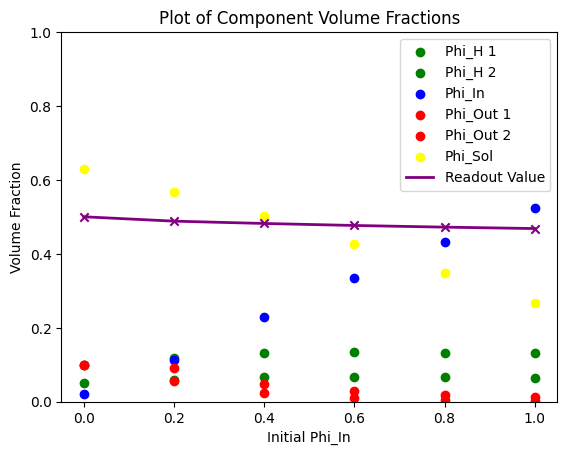

In [1980]:
fc = FloryClassifier()

chi_matrix = gen.chi_matrix_strong_out(6,2,4,7)
print(chi_matrix)
fc.set_chi_matrix_multi(chi_matrix)

#fc.reset_rand_chi_matrix(6,5)
fc.get_info()
phi_H = [0.05,0.1]
evolved_points = fc.evolve_components_flory_multi(phi_H)

[[0.02]
 [0.05]
 [0.1 ]
 [0.1 ]
 [0.1 ]
 [0.63]]
6
[0]
[[3.07401706e-04 8.81459862e-02 6.19097313e-04 6.92751533e-03]
 [5.94397548e-04 4.46707511e-02 3.70475274e-04 4.36437631e-03]
 [8.42367863e-04 9.16686842e-02 4.16663116e-04 7.07228541e-03]
 [4.62600170e-02 4.32920573e-02 1.19106493e-03 9.25686038e-03]
 [2.50631588e-03 7.00928790e-02 1.12908064e-02 1.61099971e-02]
 [3.99467071e-02 4.41269501e-01 1.34400399e-02 5.93437526e-02]]
6
[0 1 2 3]
[[3.56509004e-04 2.00728981e-03 1.69636201e-01]
 [6.84665519e-04 9.82280838e-04 4.83330537e-02]
 [8.11004532e-04 8.37926549e-04 9.83510690e-02]
 [8.04124751e-02 3.11706426e-03 1.64704606e-02]
 [2.89023067e-03 6.19033687e-02 3.52064005e-02]
 [5.50133490e-02 5.00264187e-02 3.72960232e-01]]
6
[0 1 2]
[[2.10118763e-04 1.39381251e-03 2.46396069e-01]
 [4.79095994e-04 6.55539724e-04 4.88653643e-02]
 [5.06642555e-04 4.59743386e-04 9.90336140e-02]
 [9.03717058e-02 1.99450465e-03 7.63378957e-03]
 [1.95976868e-03 7.68303912e-02 2.12098402e-02]
 [4.50070910e-0

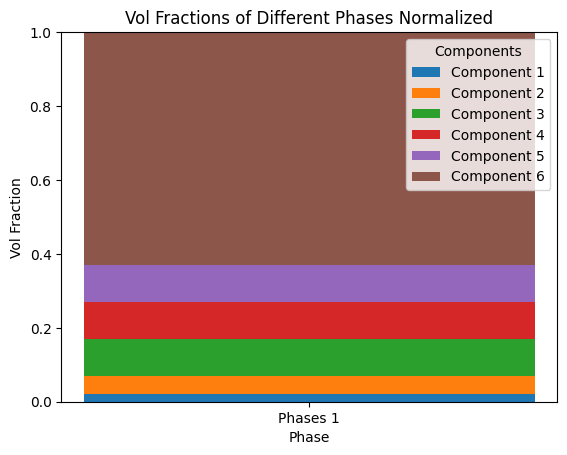

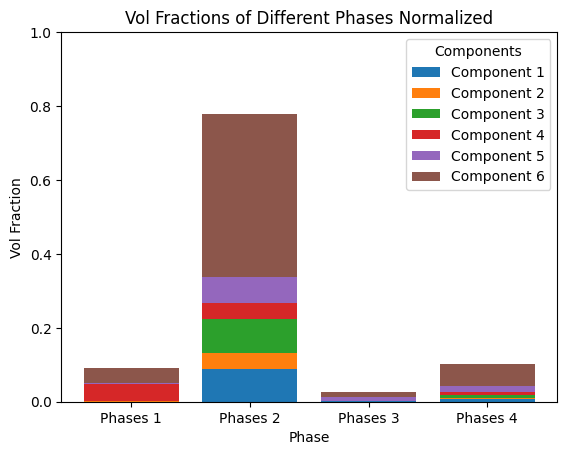

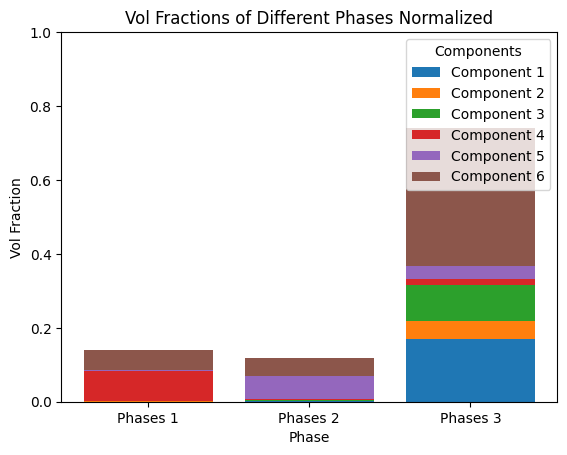

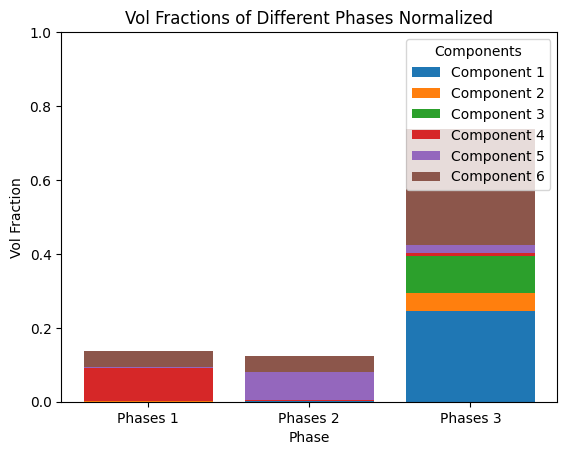

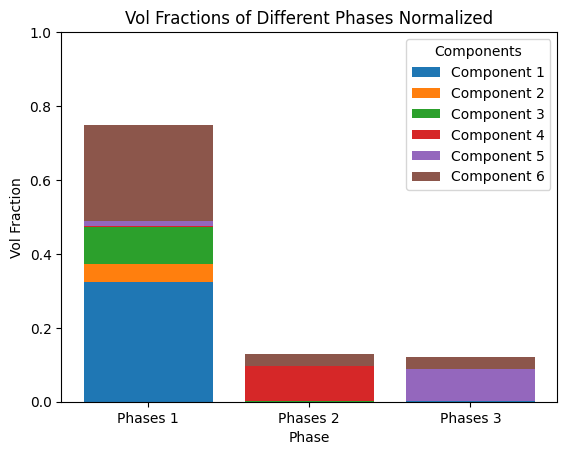

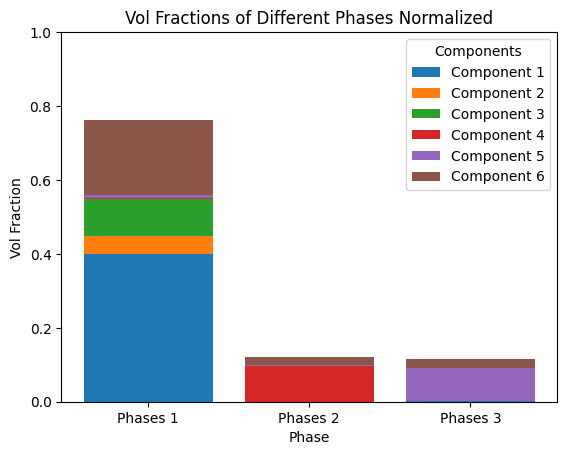

In [1981]:
for phases in evolved_points:
    plots.plot_phases_vol_norm(phases)

[[0.02]
 [0.05]
 [0.1 ]
 [0.1 ]
 [0.1 ]
 [0.63]]
6
[0]
[[2.78066990e-05 6.86780548e-02 1.69187718e-05 7.14052026e-04]
 [5.37675407e-05 3.48047645e-02 1.01243964e-05 4.49857069e-04]
 [7.61982423e-05 7.14227293e-02 1.13866237e-05 7.28974168e-04]
 [4.18455183e-03 3.37305691e-02 3.25495771e-05 9.54148723e-04]
 [2.26714328e-04 5.46121586e-02 3.08556625e-04 1.66053419e-03]
 [3.61346747e-03 3.43810674e-01 3.67291155e-04 6.11684344e-03]]
6
[0 1 2 3]
[[4.99712374e-05 2.38615259e-04 1.25693202e-01]
 [9.59683565e-05 1.16767990e-04 3.58127349e-02]
 [1.13677073e-04 9.96079686e-05 7.28739546e-02]
 [1.12712746e-02 3.70538968e-04 1.22039101e-02]
 [4.05118528e-04 7.35872233e-03 2.60864438e-02]
 [7.71112395e-03 5.94685769e-03 2.76347652e-01]]
6
[0 1 2]
[[2.91086815e-05 1.71954740e-04 1.81863833e-01]
 [6.63712868e-05 8.08739783e-05 3.60673061e-02]
 [7.01874338e-05 5.67185714e-05 7.30962661e-02]
 [1.25195921e-02 2.46062168e-04 5.63446583e-03]
 [2.71495422e-04 9.47857035e-03 1.56548879e-02]
 [6.23503135e-0

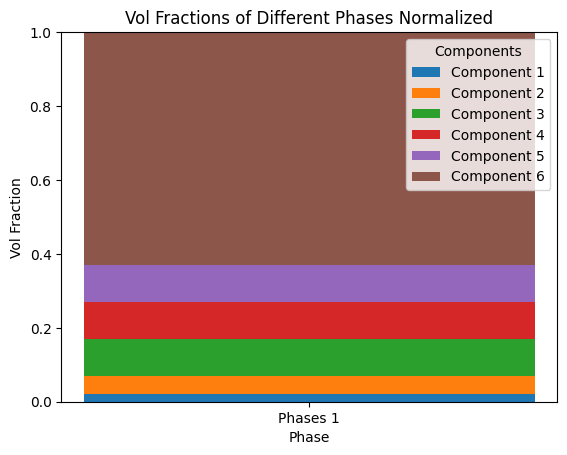

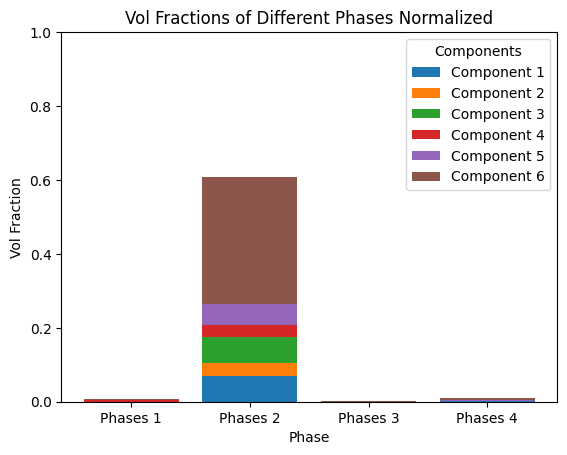

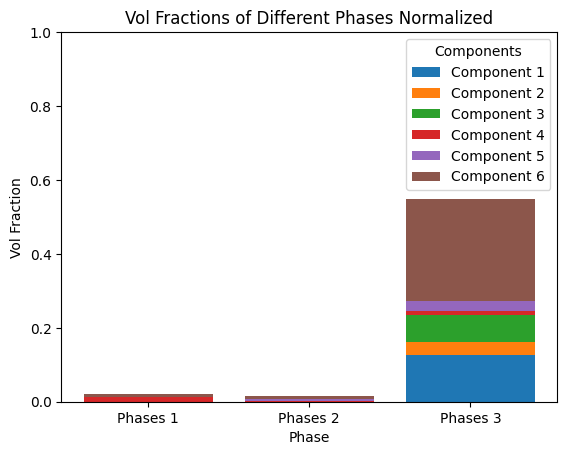

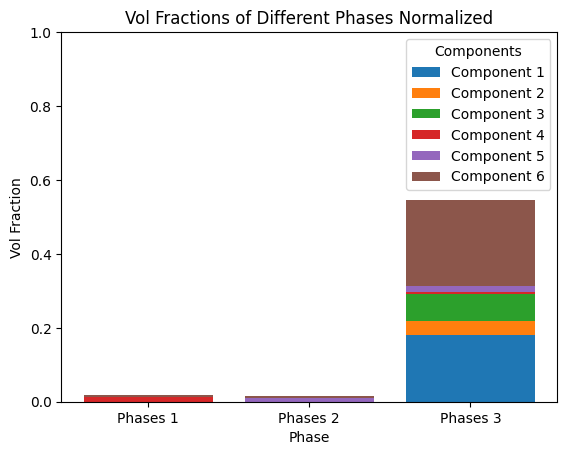

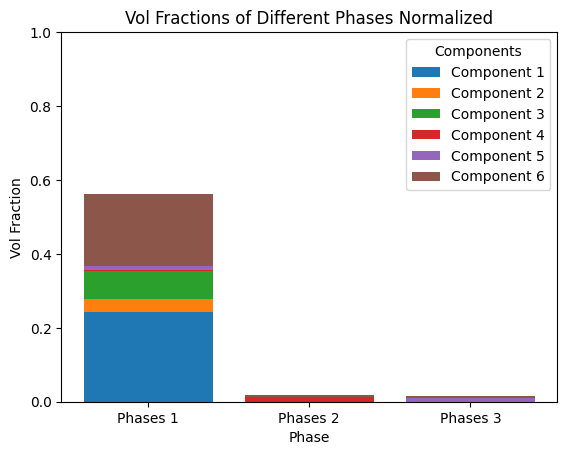

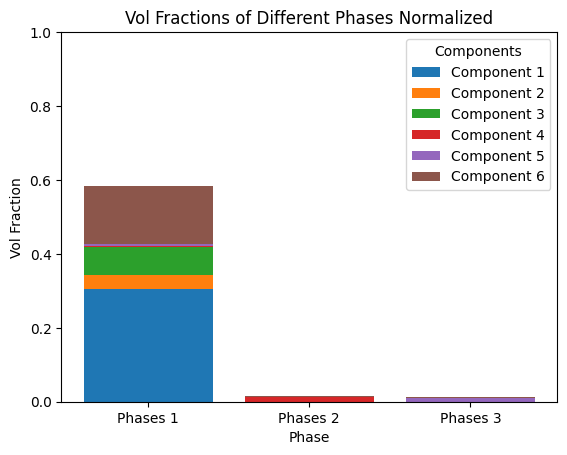

In [1982]:
for phases in evolved_points:
    plots.plot_phases_vol_norm(phases)

In [1817]:
test = FloryClassifier()
test.chi_strength = 6
test.pick_point(6, auto_chi = True)
data = test.generate_data_plane(3,3,[0.02,0.2],[0.02,0.2])


Reset CHI_MATRIX: 
 [[0.         5.71554176 5.7234877  6.48211622 5.70352595 0.        ]
 [5.71554176 0.         4.56074251 6.49848642 6.61029658 0.        ]
 [5.7234877  4.56074251 0.         6.68347662 6.23658906 0.        ]
 [6.48211622 6.49848642 6.68347662 0.         6.62038814 0.        ]
 [5.70352595 6.61029658 6.23658906 6.62038814 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Evolved Point: [0.15518853 0.32906542 0.07805471 0.14155542 0.01953845 0.27659745]


100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.03s/it]


In [1836]:
data = plane_data

In [1837]:
file_path = "llps_data/data_plane_3_3.pickle"

with open(file_path,'wb') as file:
    pickle.dump(data,file)


In [1841]:
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)
print(loaded_data)

[[[<flory.common.phases.Phases object at 0x16cc88dd0>

 [[<flory.common.phases.Phases object at 0x16c6ed670>

 [[<flory.common.phases.Phases object at 0x16c97e8a0>


In [1868]:

    def step_func(x):
        '''Goal Function '''
        if x >= 0.5:
            return 0
        elif 0 <= x < 0.5:
            return 1
        else: 
            raise Exception("Sorry, no numbers below zero")
            
   
    def calc_loss(data,index):
        '''Calculate the Loss'''
        loss = 0
        for i in range(len(data)):
            #loss += (step_func(point[0]) - point[1])**2
            loss += abs(step_func(index[i]) - data[i])
        return loss

2

In [1875]:
test = FloryClassifier()
test.chi_strength = 6
test.pick_point(6, auto_chi = True)
data = test.generate_data_plane(5,5,[0.02,0.2],[0.02,0.2])


Reset CHI_MATRIX: 
 [[0.         4.84964353 6.54008519 4.51757977 7.47160524 0.        ]
 [4.84964353 0.         7.1358618  7.03939975 6.78428802 0.        ]
 [6.54008519 7.1358618  0.         5.4407204  7.39559626 0.        ]
 [4.51757977 7.03939975 5.4407204  0.         7.24175691 0.        ]
 [7.47160524 6.78428802 7.39559626 7.24175691 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Evolved Point: [0.09117785 0.24837624 0.00376844 0.27844691 0.23270796 0.14552261]


100%|█████████████████████████████████████████████| 6/6 [00:16<00:00,  2.81s/it]

File Created at llps_data/data_plane_5_5_strength_6.pickle 


In [1882]:
file_path = 'llps_data/data_plane_5_5_strength_6.pickle'
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)
plane_data = loaded_data

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


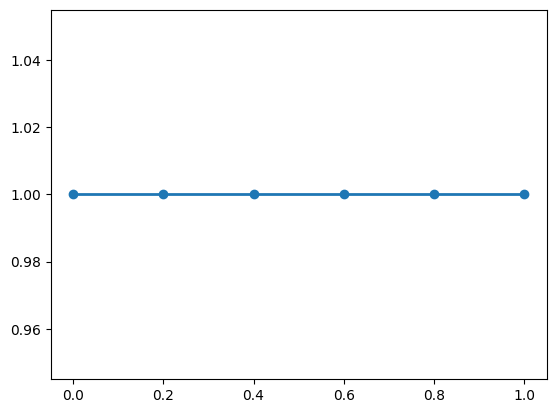

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


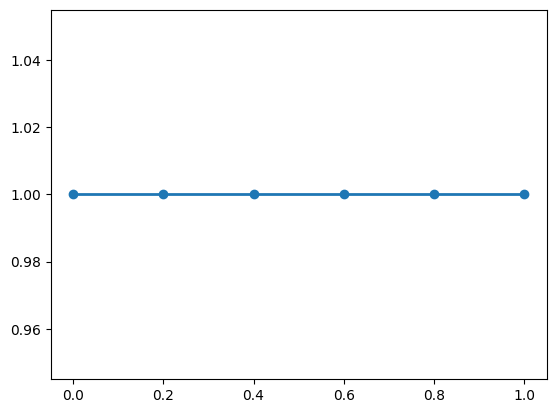

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


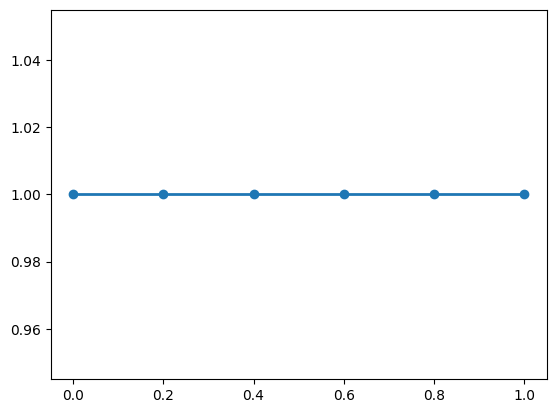

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


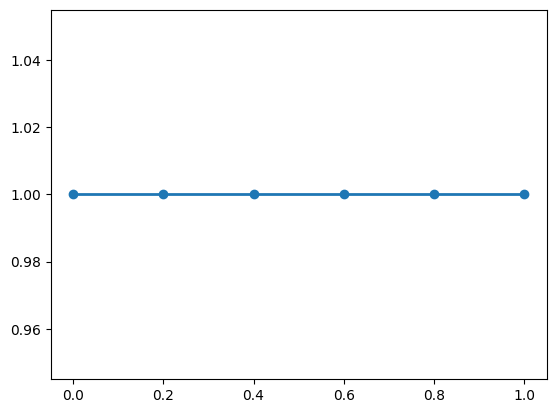

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 0]
Loss: 2


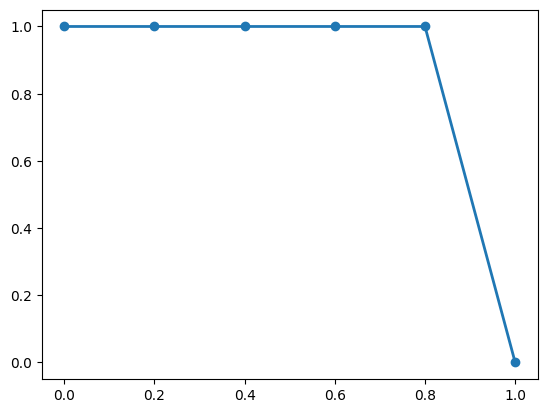

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


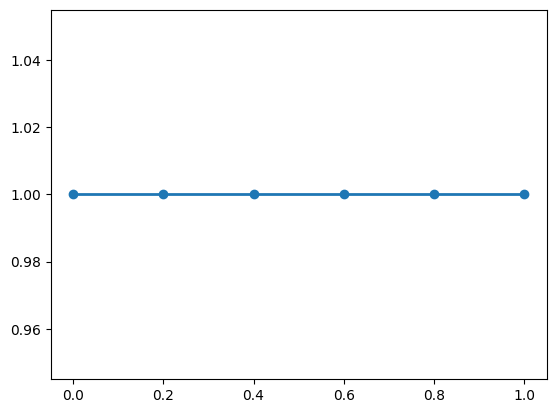

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


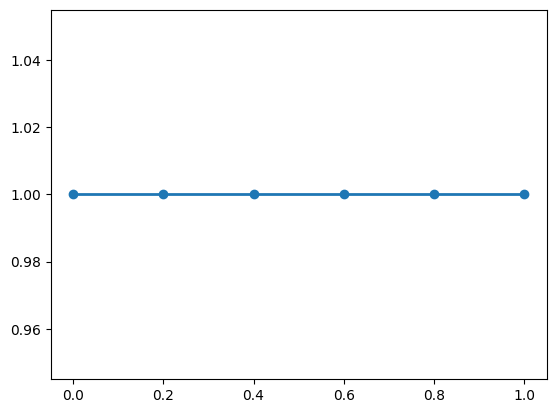

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
Phase 7 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


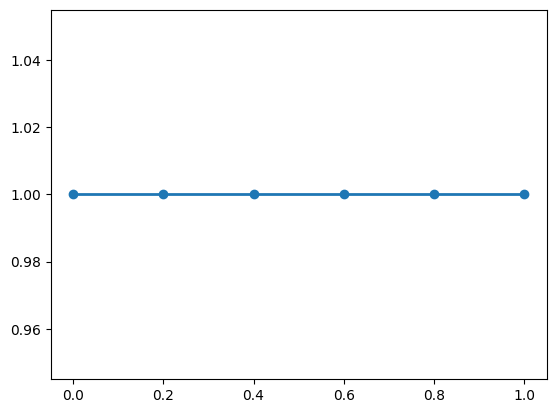

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 0]
Loss: 2


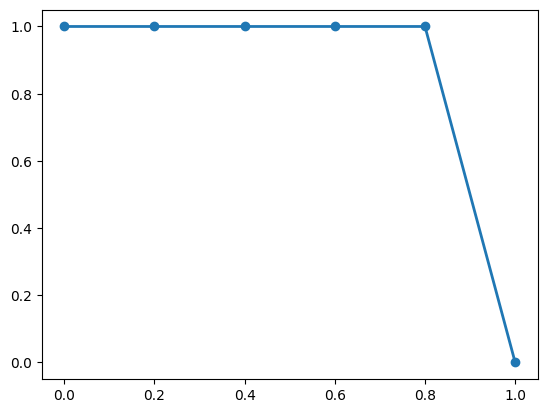

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Fits
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


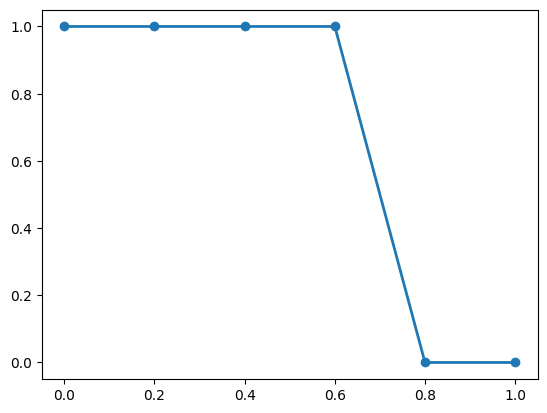

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


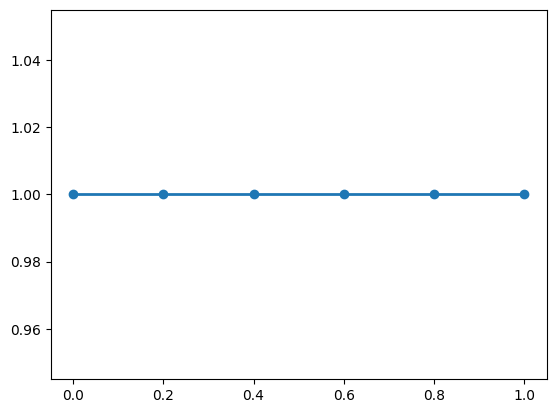

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


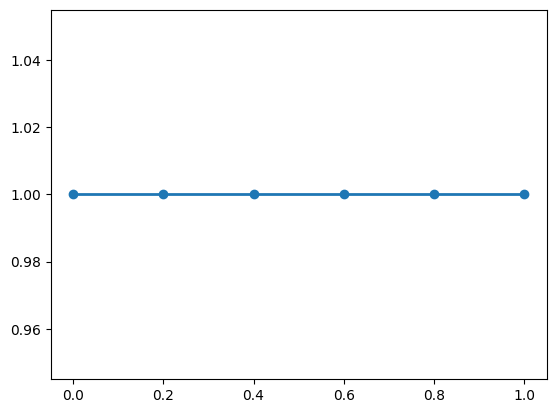

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 0]
Loss: 2


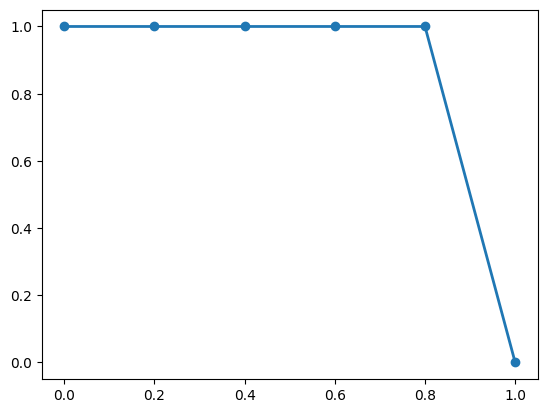

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Fits
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


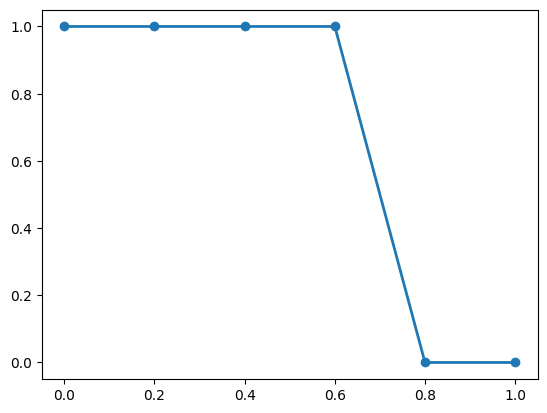

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
Phase 7 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


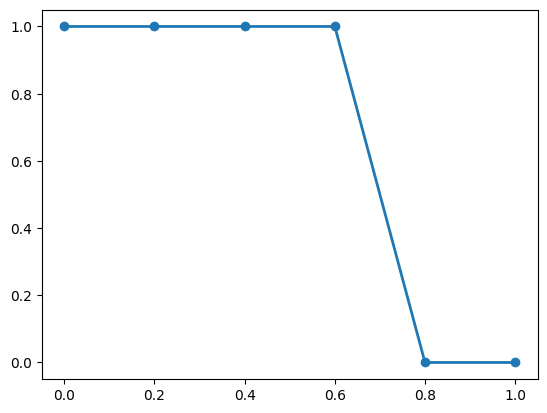

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 1]
Loss: 3


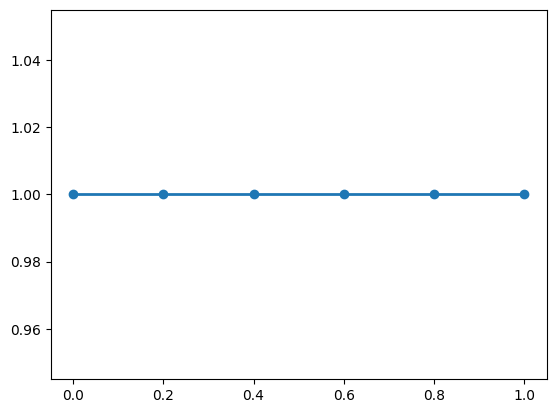

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 0]
Loss: 2


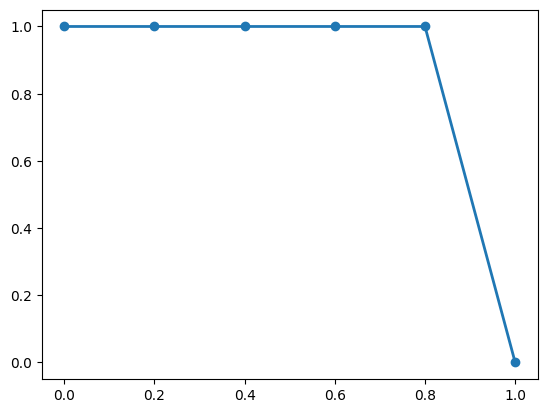

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Fits
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


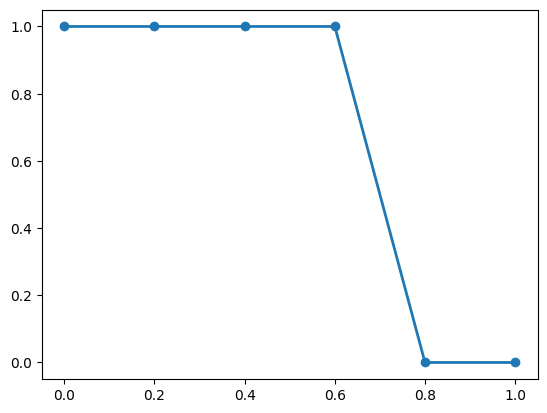

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
Phase 7 Doesn't Fit
Phase 8 Doesn't Fit
Phase 9 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


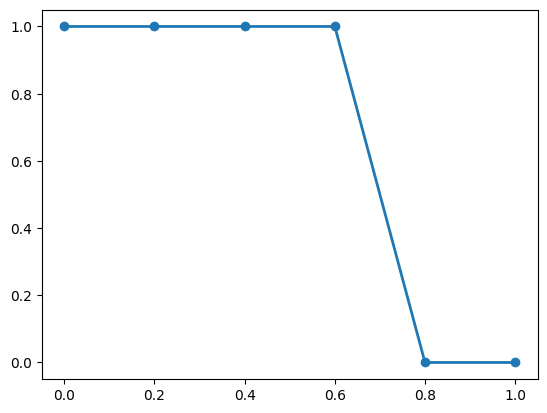

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Fits
Phase 3 Fits
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 0, 0, 0]
Loss: 0


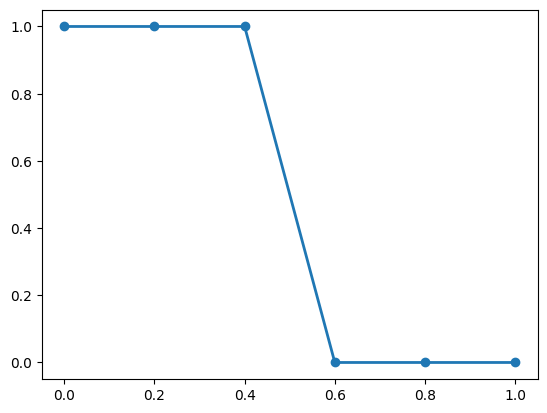

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 1, 0]
Loss: 2


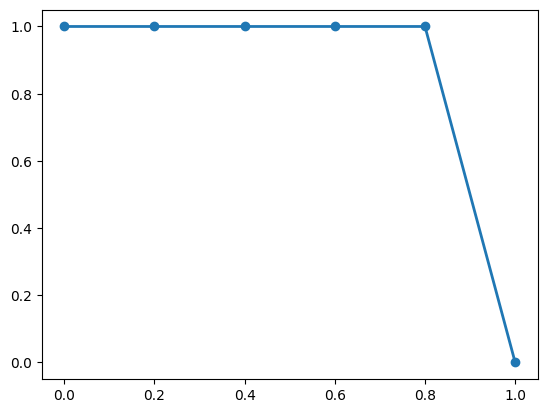

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Fits
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


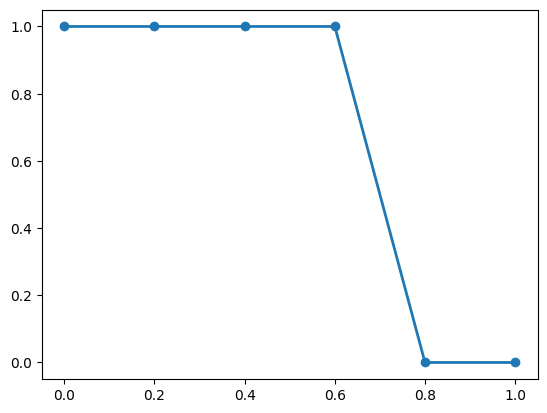

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 1, 0, 0]
Loss: 1


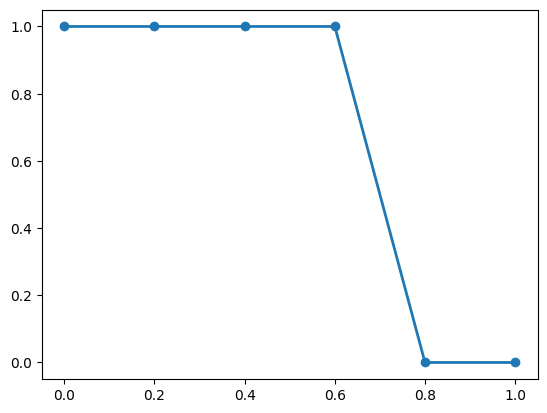

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Fits
Phase 3 Fits
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 0, 0, 0]
Loss: 0


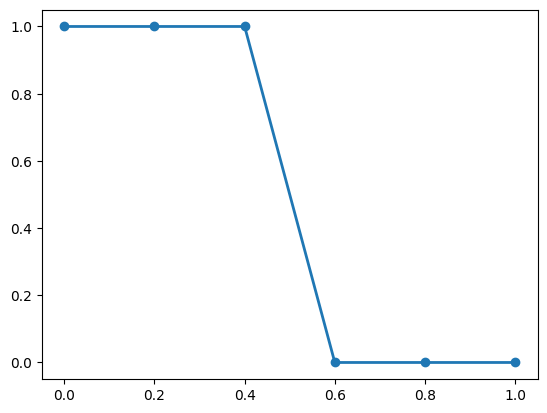

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
Phase 7 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [1, 1, 1, 0, 0, 0]
Loss: 0


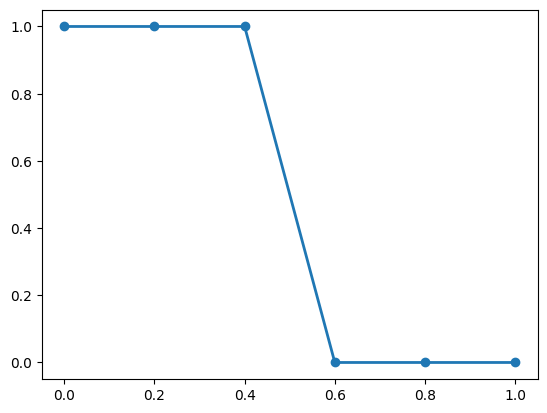

In [2017]:
loss_map = np.zeros((5,5))

for x in range(5):
    for y in range(5):
        data = []
        cutoff = 1
        phase_key_range = [1,1,1,1,0.3,0.2]
        phase_key_range = cutoff*np.array(phase_key_range)
        evolved_points = plane_data[x][y]
        for phases in evolved_points:
            #plot_phases_and_vol_norms(phases)
            phase_bool = phase_exists(phases,phase_key_range)
            #print(f"phases_bool {phase_bool}")
            if 1 in phase_bool:
                data.append(0)
                print("True")
            else:
                data.append(1)
                print("False")
                
        norm_points = np.linspace(0,1,len(evolved_points))
        print(norm_points)
        print(f"Data: {data}")
        tot_loss = calc_loss(data,norm_points)
        print(f"Loss: {tot_loss}")
        loss_map[x][y] = tot_loss
        plt.figure()
        plt.scatter(norm_points,data)
        plt.plot(norm_points,data, linewidth = 2.0)
        plt.show()        
        

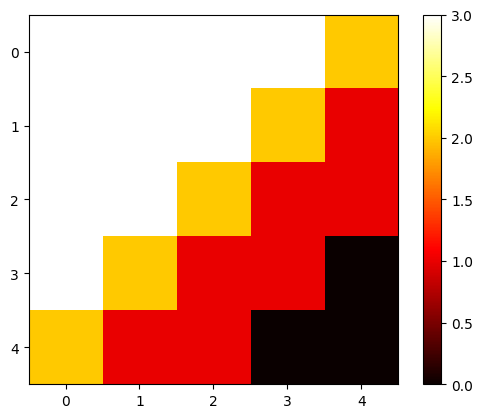

In [2013]:

plt.imshow(loss_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [2010]:
nx = 2
ny =2
loss_map = np.zeros((nx,ny))

for x in range(nx):
    for y in range(ny):
        data = []
        cutoff = 1
        phase_key_range = [1,1,1,1,0.3,0.2]
        phase_key_range = cutoff*np.array(phase_key_range)
        evolved_points = plane_data[x][y]
        dilute_comp_points = []
        for phase in evolved_points:
            z = gen.most_dilute_flory(phase)
            dilute_comp_points.append(z)

        dilute_comp_points = np.array(dilute_comp_points)
        print(dilute_comp_points)
        print("\n")
        dilute_out_arr = dilute_comp_points[:,-3:-1]
        print(dilute_out_arr)
        print("\n")
        """        
        norm_points = np.linspace(0,1,len(evolved_points))
        print(norm_points)
        print(f"Data: {data}")
        tot_loss = calc_loss(data,norm_points)
        print(f"Loss: {tot_loss}")
        loss_map[x][y] = tot_loss
        plt.figure()
        plt.scatter(norm_points,data)
        plt.show()        
        """

[[0.02       0.02       0.02       0.1        0.1        0.74      ]
 [0.09599995 0.02       0.02       0.09999995 0.10000008 0.66400001]
 [0.18834049 0.02148312 0.0215444  0.10903717 0.06153291 0.59806191]
 [0.28117354 0.02220814 0.02222692 0.11275161 0.03480884 0.52683095]
 [0.36967064 0.02240913 0.02238295 0.1135204  0.02057321 0.45144367]
 [0.50976988 0.02403147 0.01959521 0.06700188 0.01031991 0.36928165]]


[[0.1        0.1       ]
 [0.09999995 0.10000008]
 [0.10903717 0.06153291]
 [0.11275161 0.03480884]
 [0.1135204  0.02057321]
 [0.06700188 0.01031991]]


[[0.02       0.02       0.065      0.1        0.1        0.695     ]
 [0.09732387 0.02022016 0.06583996 0.10137044 0.09447287 0.6207727 ]
 [0.18845811 0.02162844 0.07076508 0.10931954 0.05318163 0.55664719]
 [0.2862949  0.02269469 0.05853491 0.11459375 0.03074962 0.48713213]
 [0.49366025 0.0222524  0.02117105 0.06977265 0.01129861 0.3818449 ]
 [0.56868207 0.02675977 0.01430374 0.0537612  0.00747434 0.32901888]]


[[0.1        

# FloryClassifier Class



Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


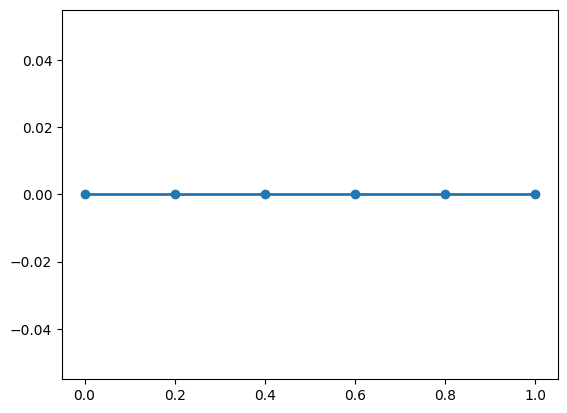

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


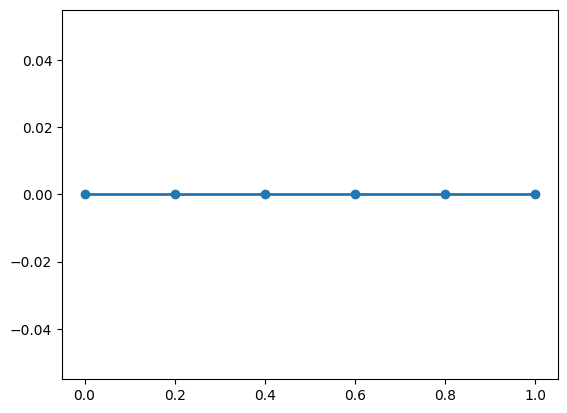

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


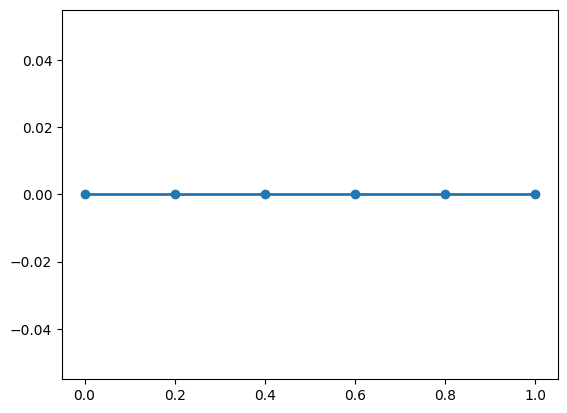

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


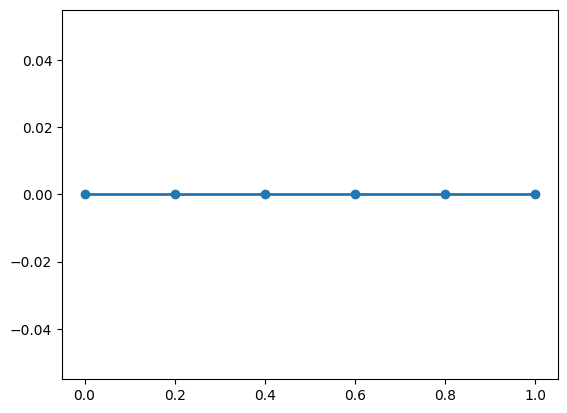

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


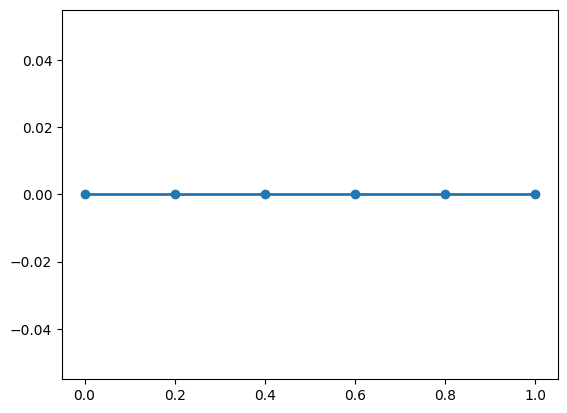

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
Phase 7 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


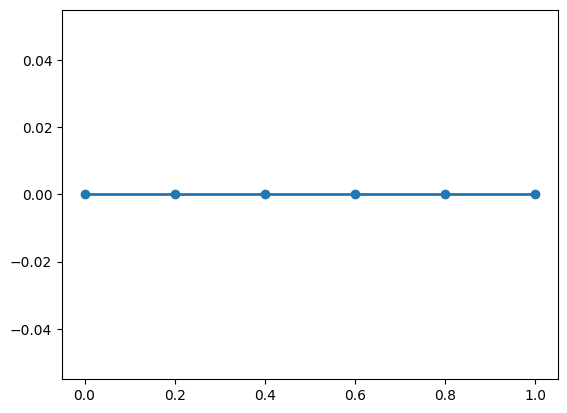

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


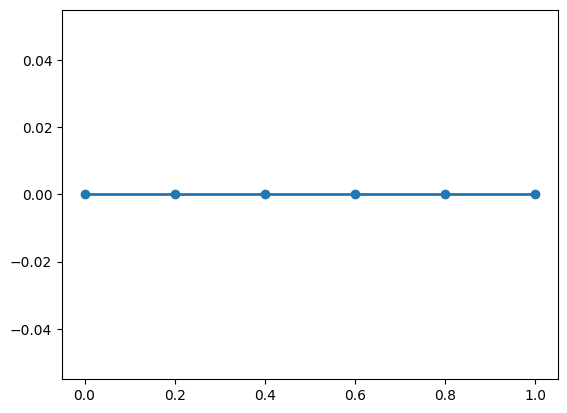

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


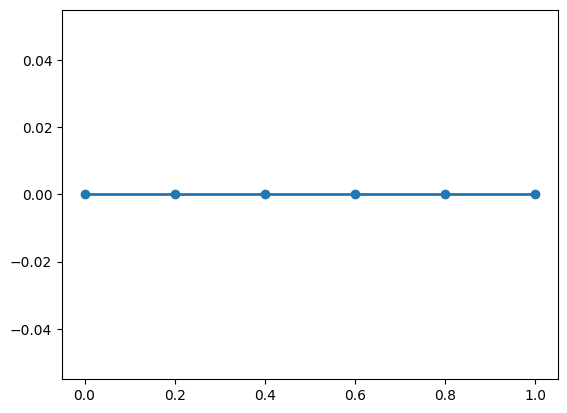

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 1]
Loss: 4


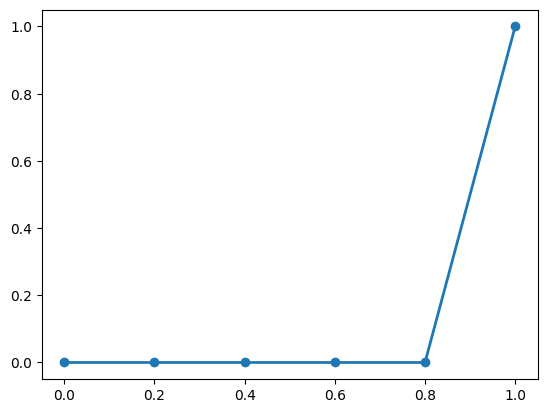

In [2016]:
loss_map = np.zeros((3,3))

for x in range(3):
    for y in range(3):
        data = []
        cutoff = 1
        phase_key_range = [1,1,1,1,0.3,0.2]
        phase_key_range = cutoff*np.array(phase_key_range)
        evolved_points = plane_data[x][y]
        for phases in evolved_points:
            #plot_phases_and_vol_norms(phases)
            phase_bool = phase_exists(phases,phase_key_range)
            #print(f"phases_bool {phase_bool}")
            if 1 in phase_bool:
                data.append(1)
                print("True")
            else:
                data.append(0)
                print("False")
                
        norm_points = np.linspace(0,1,len(evolved_points))
        print(norm_points)
        print(f"Data: {data}")
        tot_loss = calc_loss(data,norm_points)
        print(f"Loss: {tot_loss}")
        loss_map[x][y] = tot_loss
        plt.figure()
        plt.scatter(norm_points,data)
        
        plt.show()        
        

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


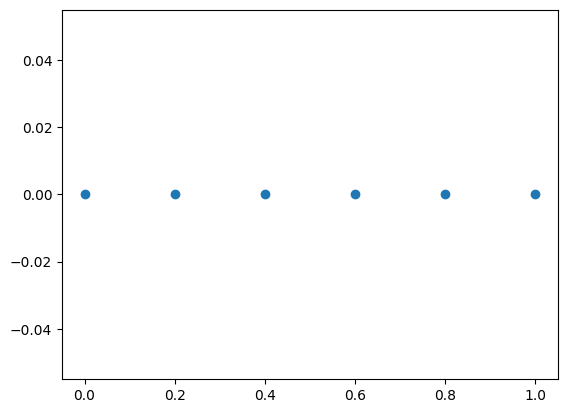

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


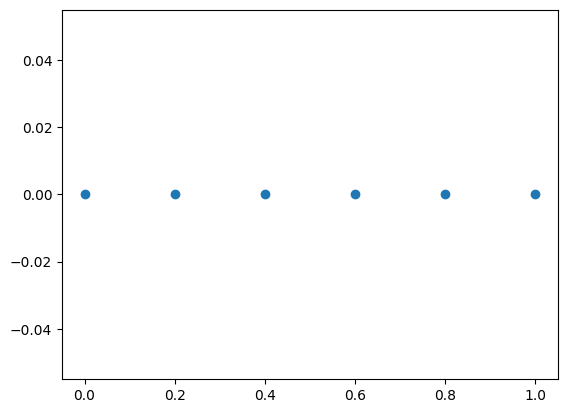

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


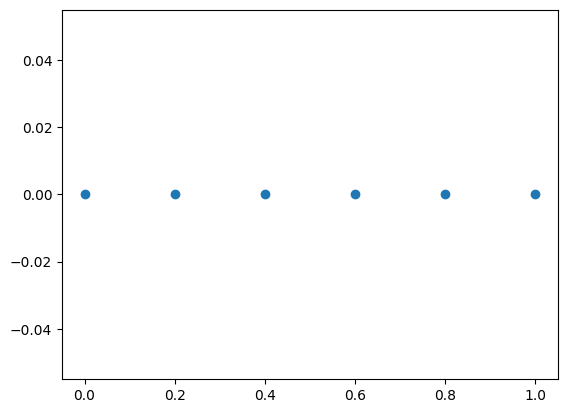

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


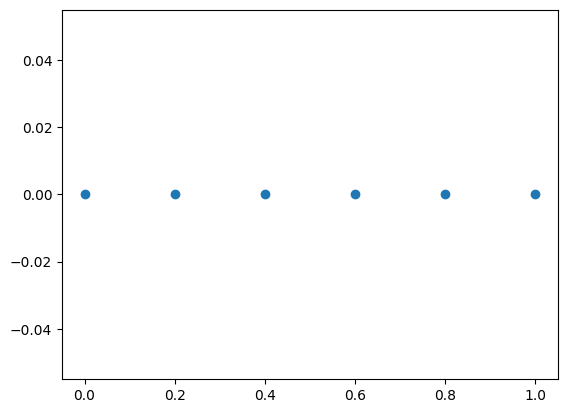

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


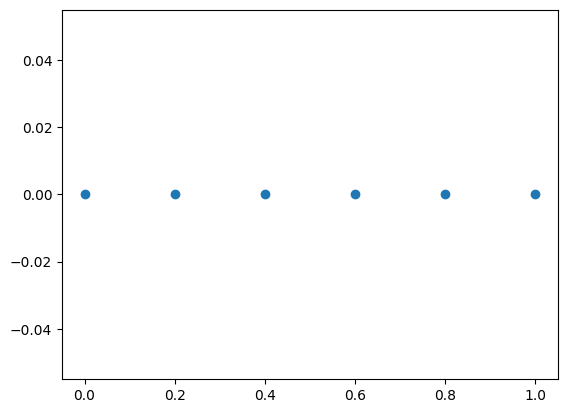

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
Phase 7 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


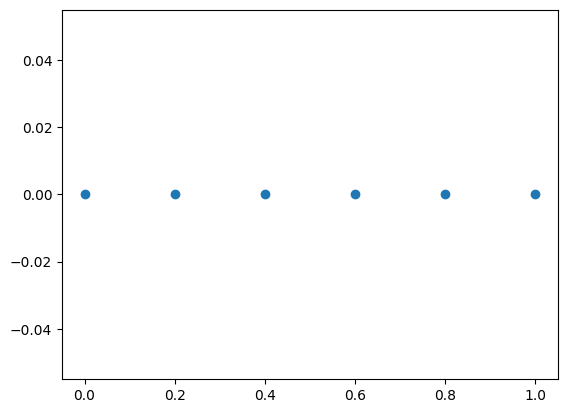

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


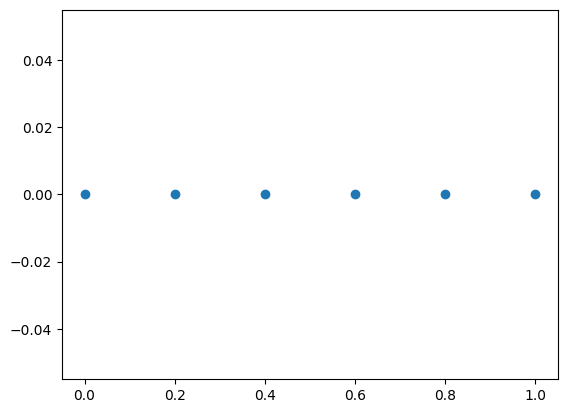

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
Phase 6 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 0]
Loss: 3


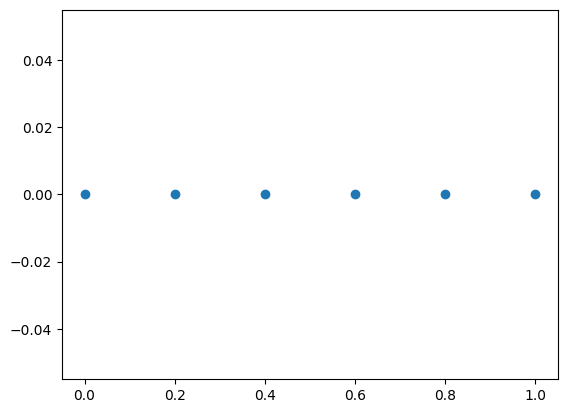

Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Doesn't Fit
Phase 2 Doesn't Fit
Phase 3 Doesn't Fit
Phase 4 Doesn't Fit
Phase 5 Doesn't Fit
False
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Doesn't Fit
True
[0.  0.2 0.4 0.6 0.8 1. ]
Data: [0, 0, 0, 0, 0, 1]
Loss: 4


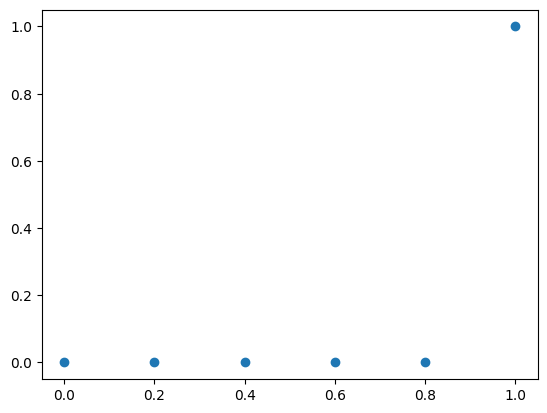

In [2015]:
loss_map = np.zeros((3,3))

for x in range(3):
    for y in range(3):
        data = []
        cutoff = 1
        phase_key_range = [1,1,1,1,0.3,0.2]
        phase_key_range = cutoff*np.array(phase_key_range)
        evolved_points = plane_data[x][y]
        for phases in evolved_points:
            #plot_phases_and_vol_norms(phases)
            phase_bool = phase_exists(phases,phase_key_range)
            #print(f"phases_bool {phase_bool}")
            if 1 in phase_bool:
                data.append(1)
                print("True")
            else:
                data.append(0)
                print("False")
                
        norm_points = np.linspace(0,1,len(evolved_points))
        print(norm_points)
        print(f"Data: {data}")
        tot_loss = calc_loss(data,norm_points)
        print(f"Loss: {tot_loss}")
        loss_map[x][y] = tot_loss
        plt.figure()
        plt.scatter(norm_points,data)
        plt.show()        
        

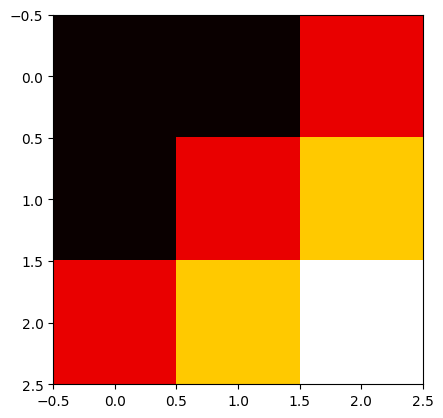

In [1873]:

plt.imshow(loss_map, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
for x in range(3):
    for y in range(3):
        phi_H = [x,y]
        evolved_points = test.evolve_components_flory_all_phases(phi_H, plotFlag = False)
        #print(f"Evolved Points {evolved_points}")
        data = []
        cutoff = 1
        phase_key_range = [1,1,1,1,0.6,0.6]
        phase_key_range = cutoff*np.array(phase_key_range)
        for phases in evolved_points:
            #plot_phases_and_vol_norms(phases)
            phase_bool = phase_exists(phases,phase_key_range)
            #print(f"phases_bool {phase_bool}")
            if 1 in phase_bool:
                data.append(1)
                print("True")
            else:
                data.append(0)
                print("False")
                
        norm_points = np.linspace(0,1,len(evolved_points))
        print(f"Data: {data}")
        plt.figure()
        plt.scatter(norm_points,data)
        plt.show()
        


In [1471]:
def optimize_Flory(fc):
    '''
    Optimizes the FloryClassifier Object Using the Differential Evolution Solver from Scipy.optimize
    This needs work... 
    '''
    def evolve_flory_calc_loss(phi_H): 
        ''' 
        Wrapper function for evolve_components_flory_(multi, multi_clean)
        Calculates the loss from each point between the readout_value and ideal function using the loss function.
        Returns the loss
        '''
        # gen.in_bounds checks if a the point is bounds based on seeing if the point is possible
        #Returns OUT OF BOUNDS if the point the optimizer guesses is not valid
        if gen.in_bounds(phi_H,fc.phi_H_thresh):
            print("IN BOUNDS")
            results = fc.evolve_components_flory_multi_clean(phi_H, readoutFlag = True)
            output_comp_points = np.zeros((fc.num_of_points,2))
            count = 0
            phi_init = np.linspace(0,1, fc.num_of_points)

            #Calculates the readout for each point and adds to output_comp_points
            for point in results:
                x = fc.phi_out_readout_func(point[-len(fc.phi_out_vector)-1:-1])
                output_comp_points[count,:] = [phi_init[count],x]
                count+=1
            
            # Calculates the loss
            loss = fc.calc_loss(output_comp_points)
            print(f"LOSS: {loss}")
    
            return loss
        else:
            #This is if it is out of bounds, supposed to disincentivize going out of bounds
            print("OUT OF BOUNDS")
            return 10000

    #This is the scipy optimizer
    bounds_range = [0,fc.phi_H_thresh]
    bounds = np.tile(bounds_range, [fc.H_dim,1] )
    #print(bounds)
    result_DE = differential_evolution(evolve_flory_calc_loss,bounds = bounds, maxiter = 5, popsize = 4)



In [1472]:
fc = FloryClassifier()
chi_strength = 5
out_chi_strength = 7
chi_matrix = gen.chi_matrix_strong_out(fc.num_comps,len(fc.phi_out_vector),chi_strength,out_chi_strength)
fc.set_chi_matrix_multi(chi_matrix)
print(fc.chi_matrix)




NameError: name 'gen' is not defined

In [1463]:
num_comps = 6
chi_strength = 4
num_out = 2
out_1_chi_strength = 8
out_2_chi_strength = 9

num_comps = num_comps -1
chi_matrix = gen.square_matrix(num_comps,chi_strength)
out_chi_matrix = gen.square_matrix(num_comps,out_2_chi_strength)
out_chi_matrix[1:-1,0:num_comps-1] = out_1_chi_strength

chi_matrix[:,num_comps - num_out:num_comps] = out_chi_matrix[:,num_comps - num_out:num_comps]
chi_matrix[num_comps - num_out:num_comps:] = out_chi_matrix[num_comps - num_out:num_comps:]


chi_matrix = np.vstack([chi_matrix,np.zeros(num_comps)])
zero_col = np.zeros(num_comps+1)
zero_col = zero_col[:, np.newaxis]
chi_matrix = np.hstack([chi_matrix,zero_col])
print(chi_matrix)

fc.set_chi_matrix_multi(chi_matrix)


[[0. 4. 4. 9. 9. 0.]
 [4. 0. 4. 8. 9. 0.]
 [4. 4. 0. 8. 9. 0.]
 [8. 8. 8. 8. 9. 0.]
 [9. 9. 9. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


[[0.02  0.2   0.2   0.1   0.1   0.38 ]
 [0.096 0.2   0.2   0.1   0.1   0.304]
 [0.172 0.2   0.2   0.1   0.1   0.228]
 [0.248 0.2   0.2   0.1   0.1   0.152]
 [0.324 0.2   0.2   0.1   0.1   0.076]
 [0.4   0.2   0.2   0.1   0.1   0.   ]]


100%|█████████████████████████████████████████████| 6/6 [00:24<00:00,  4.14s/it]

Data: [[2.36460498e-02 2.12391766e-01 2.11953833e-01 1.23186818e-01
  1.01951355e-02 4.18626332e-01]
 [1.14611153e-01 2.08699789e-01 2.09343403e-01 1.21512633e-01
  6.47584715e-03 3.39357161e-01]
 [1.52182167e-01 1.87497309e-01 1.87463073e-01 1.52146306e-01
  6.27364731e-03 3.14437438e-01]
 [8.13078268e-01 3.63104054e-02 3.63103514e-02 1.15355847e-02
  3.99674560e-04 1.02365717e-01]]
[0.12318682 0.01019514]
TEST
[0.12151263 0.00647585]
TEST
[0.15214631 0.00627365]
TEST
[0.01153558 0.00039967]
TEST
[0.01061142 0.0002356 ]
TEST
[0.01469179 0.00016727]
TEST
[0.54225541 0.54481966 0.54591018 0.54651641 0.54768262 0.54871921]


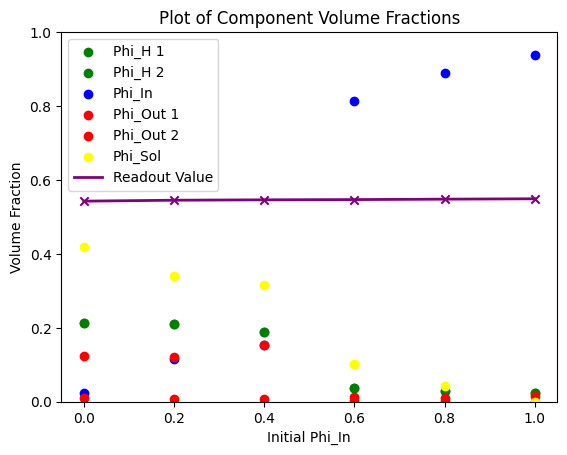

In [1464]:

phases = fc.evolve_components_flory_multi([0.2,0.2])


IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:27<00:00,  4.60s/it]

[0.08460512 0.06100852]
[0.06599025 0.04162324]
[0.05107638 0.03194041]
[0.01096241 0.00452408]
[0.00719101 0.00269273]
[0.00435362 0.00144662]
[0.72557696 0.79552959 0.79947929 0.92375065 0.93881516 0.95289441]
NORM FACTOR 1.0494342205243115


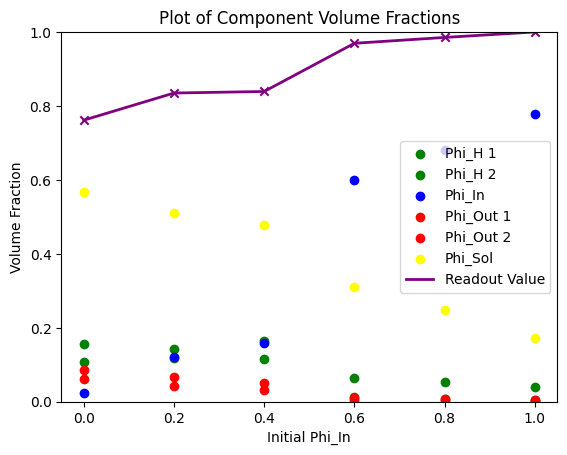

LOSS: 2.800021624269839
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.17s/it]

[0.09184813 0.07327648]
[0.06240643 0.04314304]
[0.0400183  0.02454719]
[0.02904266 0.01966978]
[0.00776911 0.00296259]
[0.00497454 0.00170656]
[0.66258233 0.74932869 0.80810027 0.76032733 0.93627233 0.94954126]
NORM FACTOR 1.0531401269915304


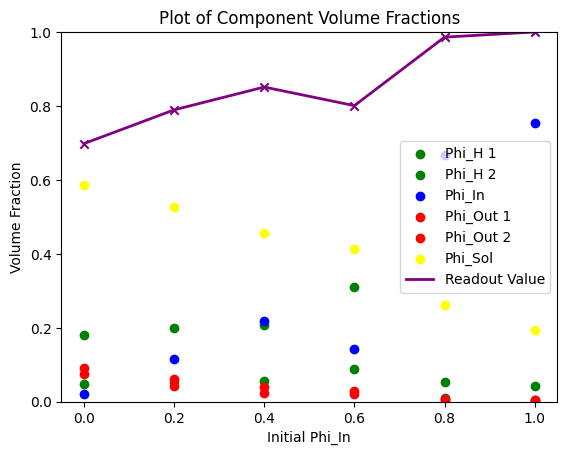

LOSS: 2.5698444215110516
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.34s/it]

[0.1 0.1]
[0.1        0.10000001]
[0.1054139  0.05968507]
[0.04496029 0.02426366]
[0.02482361 0.01209686]
[0.01391954 0.00602769]
[0.49999999 0.49999996 0.84048883 0.85740288 0.88777791 0.91480881]
NORM FACTOR 1.0931245790054864


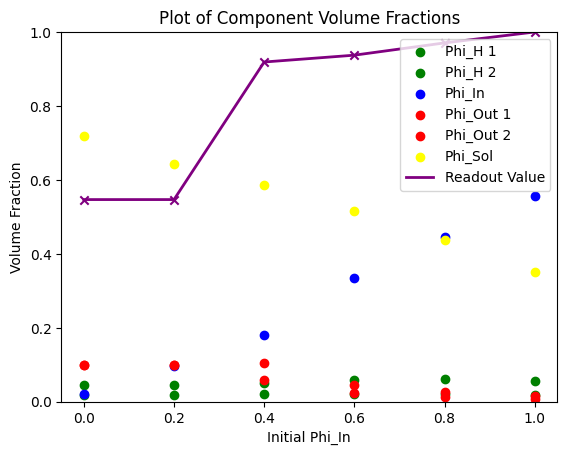

LOSS: 2.8856083615560353
OUT OF BOUNDS
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:28<00:00,  4.83s/it]

[0.1        0.09999998]
[0.10380446 0.08173964]
[0.1165087  0.06318896]
[0.0196044  0.00903685]
[0.01402229 0.00603121]
[0.00849937 0.00327565]
[0.50000015 0.67117787 0.85573576 0.90147983 0.91613298 0.93473247]
NORM FACTOR 1.0698248207137024


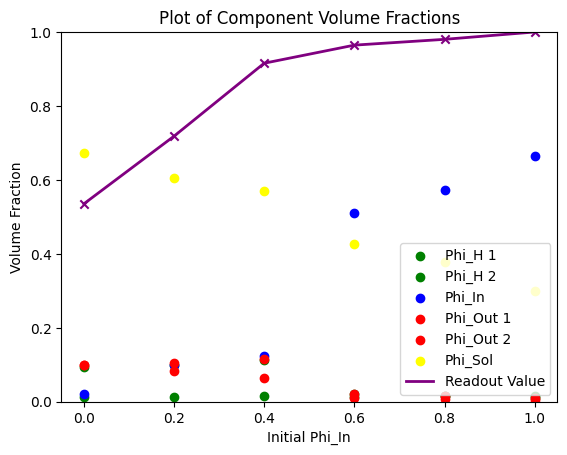

LOSS: 2.904626325743257
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.38s/it]

[0.06824201 0.05572784]
[0.04913889 0.03448081]
[0.03392092 0.0221732 ]
[0.02158632 0.01520009]
[0.0065236  0.00238721]
[0.0041148  0.00134889]
[0.6469528  0.74111417 0.77843543 0.73916207 0.94187064 0.95423607]
NORM FACTOR 1.0479587054702895


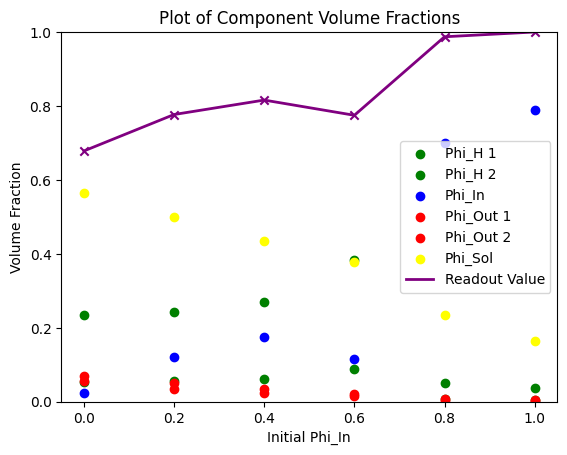

LOSS: 2.5848024072459
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:28<00:00,  4.83s/it]

[0.08297656 0.0598474 ]
[0.06561387 0.04135387]
[0.05060136 0.03167568]
[0.01083802 0.00446137]
[0.00708737 0.00264484]
[0.00428982 0.00142039]
[0.72544838 0.7958871  0.7990139  0.92419407 0.939281   0.95324976]
NORM FACTOR 1.0490430147308318


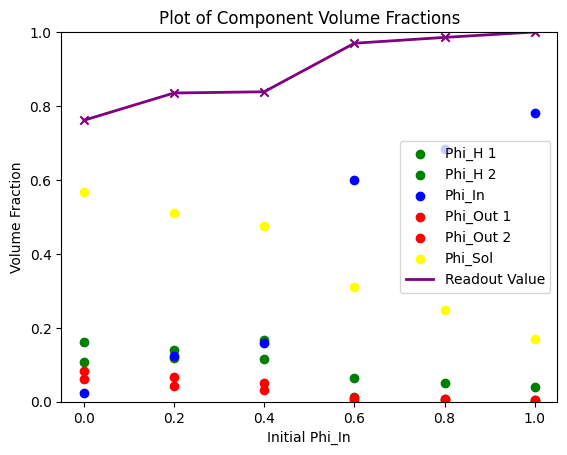

LOSS: 2.802504643046455
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

[0.03883727 0.03308694]
[0.03298994 0.02406088]
[0.02025415 0.01476183]
[0.01052077 0.00804426]
[0.0054141  0.00189638]
[0.00337676 0.00105558]
[0.61767698 0.71891041 0.71932398 0.69005577 0.94720648 0.95859803]
NORM FACTOR 1.0431901210891616


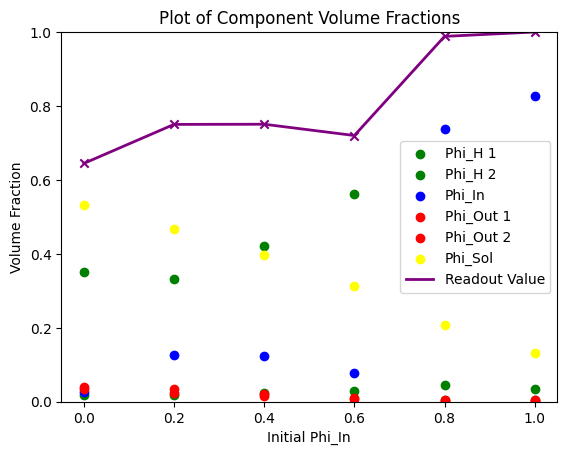

LOSS: 2.5962485469517143
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:12<00:00,  2.08s/it]

[0.05152685 0.03850785]
[0.04173817 0.02748169]
[0.02740594 0.01870911]
[0.00727914 0.00273356]
[0.0045775 0.0015394]
[0.00283814 0.00085085]
[0.7042458  0.77482454 0.75612278 0.93842154 0.9516639  0.96202989]
NORM FACTOR 1.0394687460944538


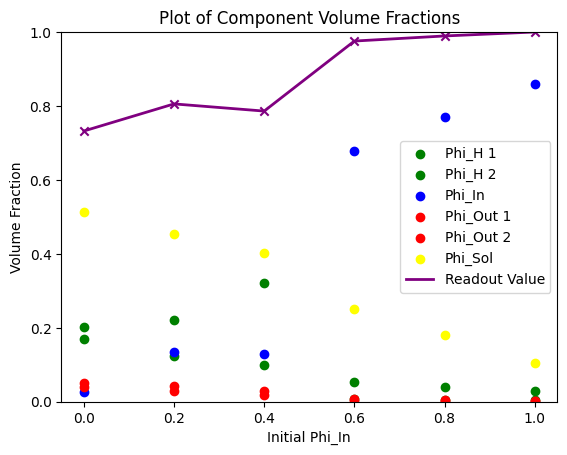

LOSS: 2.909451291694008
OUT OF BOUNDS
OUT OF BOUNDS
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:15<00:00,  2.64s/it]

[0.06342361 0.05197864]
[0.04644662 0.03268971]
[0.03218156 0.02130742]
[0.02003322 0.01421939]
[0.00625506 0.00226624]
[0.00394109 0.00127863]
[0.64452247 0.739434   0.77202503 0.73466136 0.94313883 0.95523201]
NORM FACTOR 1.0468660960711578


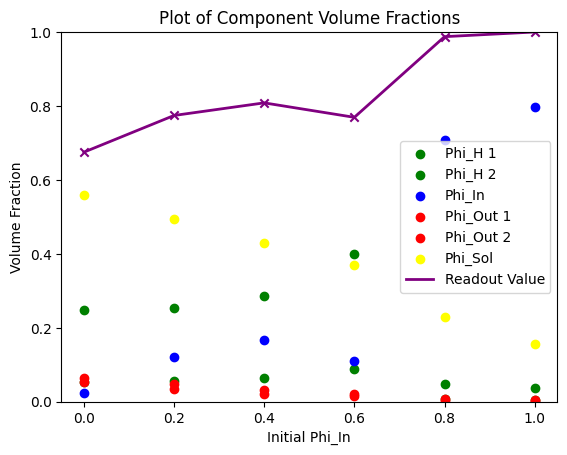

LOSS: 2.5879378583319887
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.68s/it]

[0.07379077 0.06129038]
[0.05200827 0.0369819 ]
[0.03477582 0.02217015]
[0.02145978 0.0152821 ]
[0.0071229  0.00266124]
[0.00454921 0.00152762]
[0.63535021 0.73363151 0.79053798 0.73278964 0.939121   0.95181807]
NORM FACTOR 1.0506209455297004


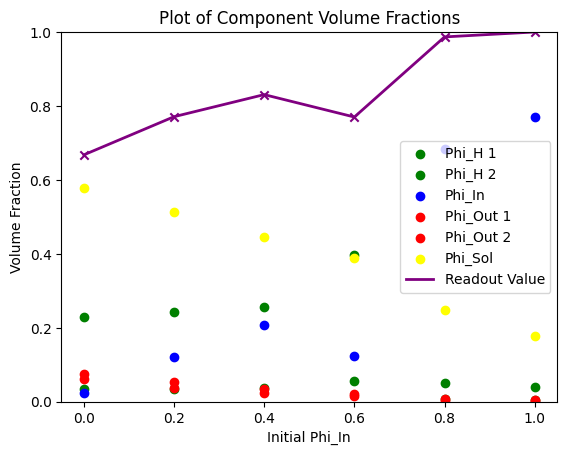

LOSS: 2.572682511996203
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.34s/it]

[0.05055633 0.04325672]
[0.04653358 0.03370031]
[0.03134373 0.02073198]
[0.01614074 0.01201534]
[0.00721912 0.00270951]
[0.00440188 0.00146621]
[0.61464045 0.72305963 0.7725301  0.70663859 0.93849813 0.95264879]
NORM FACTOR 1.0497047895429936


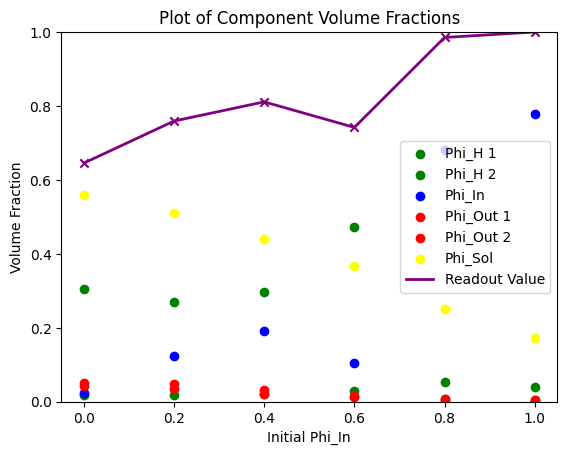

LOSS: 2.564597073431436
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.44s/it]

[0.1 0.1]
[0.09299178 0.06040015]
[0.05545275 0.03306217]
[0.04534387 0.02848817]
[0.0101553  0.00411966]
[0.0067735  0.00250081]
[0.50000001 0.78156973 0.8202068  0.79734588 0.92668723 0.94071081]
NORM FACTOR 1.0630259427341253


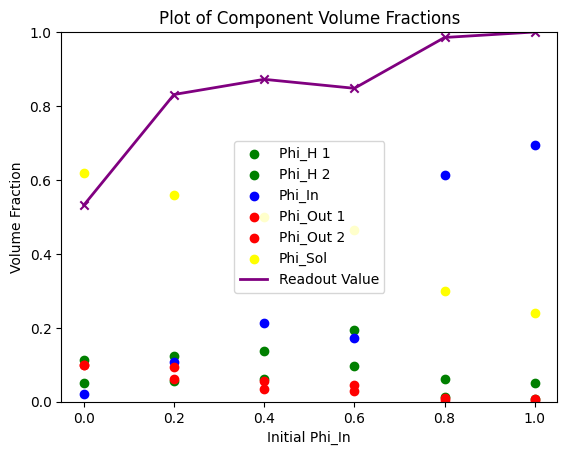

LOSS: 2.709483864756012
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:19<00:00,  3.18s/it]

[0.06370094 0.05307366]
[0.04672045 0.03330211]
[0.03196139 0.02108865]
[0.01887092 0.01361244]
[0.00654735 0.00239796]
[0.00415106 0.00136364]
[0.63321651 0.73225454 0.77376875 0.72537752 0.9417596  0.95403028]
NORM FACTOR 1.0481847561511903


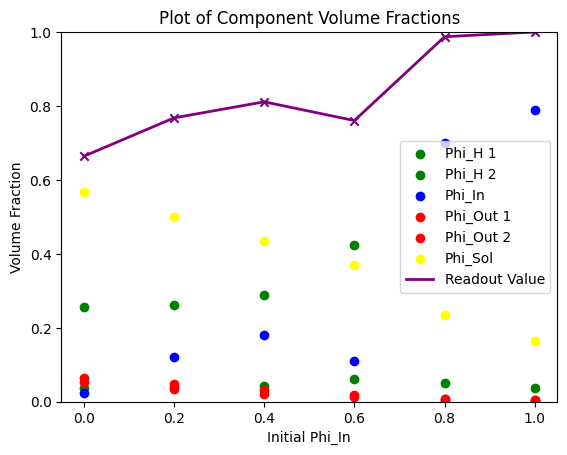

LOSS: 2.580655798824735
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:29<00:00,  4.84s/it]

[0.1 0.1]
[0.1 0.1]
[0.12328388 0.07703829]
[0.02676404 0.01316627]
[0.01902244 0.00871347]
[0.01277677 0.00538913]
[0.5        0.5        0.79981467 0.88526128 0.90291994 0.91983116]
NORM FACTOR 1.0871560405305216


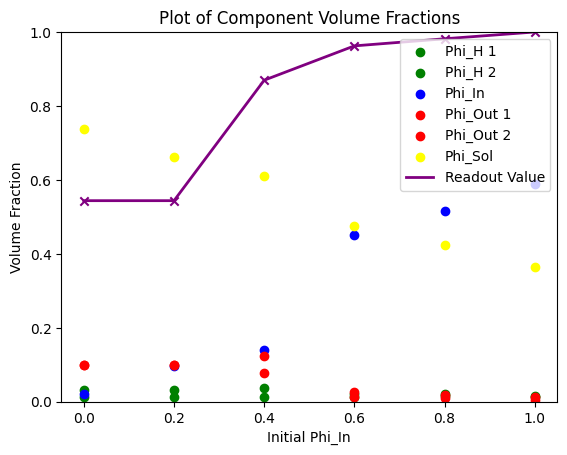

LOSS: 2.985115464131851
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:17<00:00,  2.84s/it]

[0.03738675 0.03228696]
[0.03315263 0.02445033]
[0.01883244 0.01402109]
[0.00927342 0.00723902]
[0.00596942 0.00214578]
[0.00363976 0.00116034]
[0.60806166 0.71227177 0.70655122 0.67682605 0.94411861 0.95686036]
NORM FACTOR 1.0450845767928525


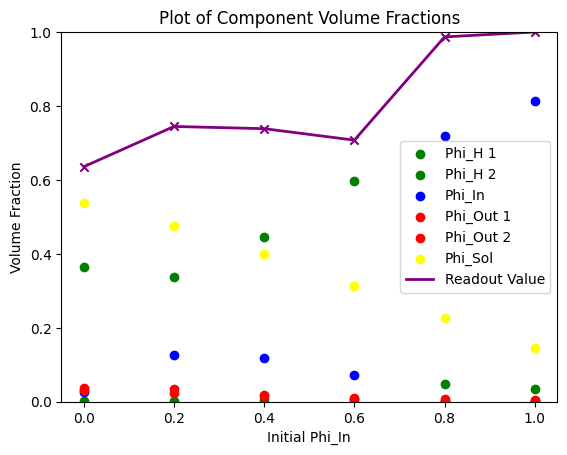

LOSS: 2.5875505790800633
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:31<00:00,  5.25s/it]

[0.09999999 0.10000004]
[0.10521201 0.07330557]
[0.08388567 0.04874726]
[0.01858313 0.00852169]
[0.0145186  0.00636142]
[0.00883104 0.00346963]
[0.49999962 0.74504925 0.83055674 0.90266807 0.91245732 0.93183206]
NORM FACTOR 1.0731547466139113


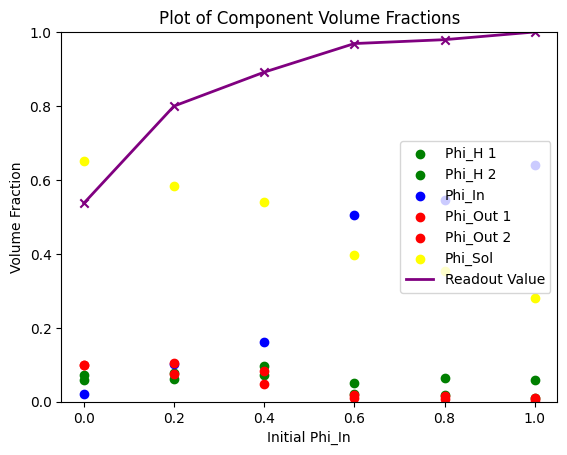

LOSS: 2.859410273390911
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.39s/it]

[0.03996834 0.03460459]
[0.04072314 0.02988596]
[0.02605832 0.01830031]
[0.01213253 0.00517744]
[0.00700482 0.00261594]
[0.00423577 0.00140027]
[0.60624554 0.71522309 0.74065165 0.91764552 0.93918224 0.95340791]
NORM FACTOR 1.0488689955459112


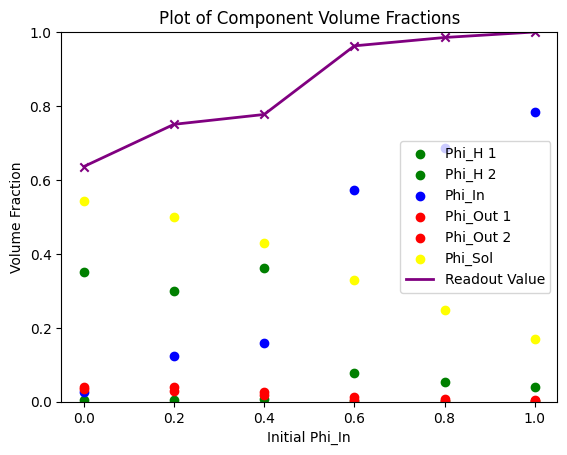

LOSS: 2.936525270800165
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:24<00:00,  4.00s/it]

[0.10128191 0.09439548]
[0.07326307 0.05230388]
[0.04394022 0.02778866]
[0.02186482 0.01086342]
[0.01157867 0.00488888]
[0.00667469 0.00246515]
[0.55259393 0.73135313 0.79430141 0.88255636 0.91963838 0.94066696]
NORM FACTOR 1.063075502580906


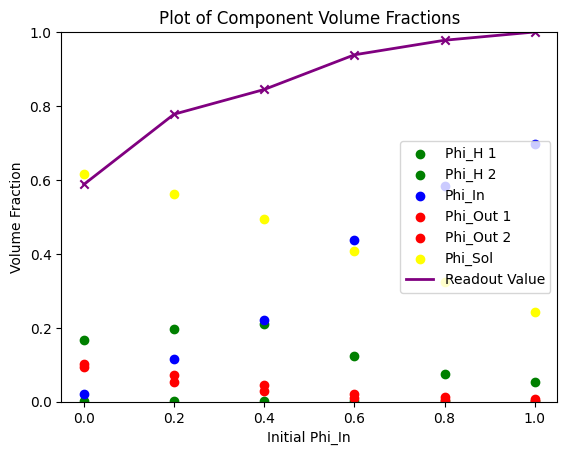

LOSS: 2.824150040995691
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.59s/it]

[0.05374448 0.04579084]
[0.04352416 0.03154188]
[0.02936372 0.01983182]
[0.01504752 0.01124787]
[0.00674719 0.00249109]
[0.00413998 0.00135854]
[0.61761707 0.72266901 0.76179244 0.70411918 0.9407112  0.95413552]
NORM FACTOR 1.0480691514957947


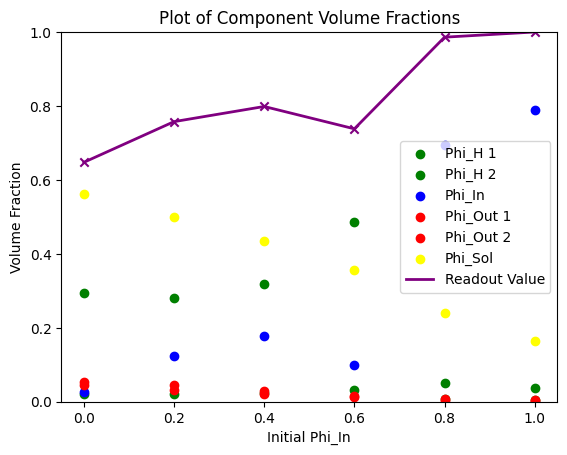

LOSS: 2.5709679885529573
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:15<00:00,  2.63s/it]

[0.05717183 0.04629471]
[0.0427725 0.0298347]
[0.02986042 0.02013028]
[0.01641194 0.01190157]
[0.00564377 0.00199536]
[0.00353916 0.00111892]
[0.65266218 0.74443224 0.76275323 0.72228123 0.94611773 0.95760741]
NORM FACTOR 1.0442692793904427


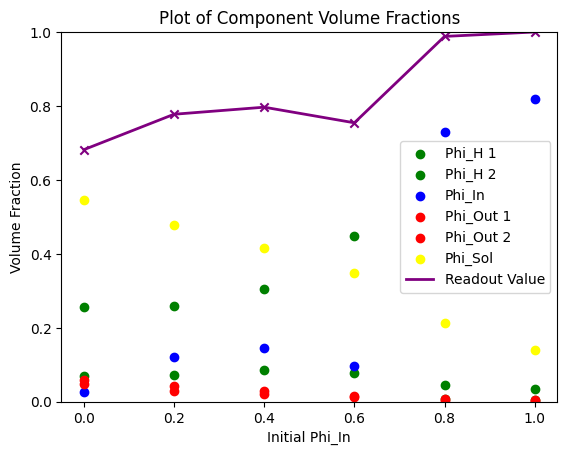

LOSS: 2.576085340865153
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.03s/it]

[0.046356   0.04017206]
[0.04947054 0.03609265]
[0.03286615 0.0209875 ]
[0.0145412  0.00648658]
[0.00822201 0.00319138]
[0.00491343 0.00168354]
[0.60558813 0.71871699 0.78975291 0.90873465 0.93367682 0.94967475]
NORM FACTOR 1.0529920872583565


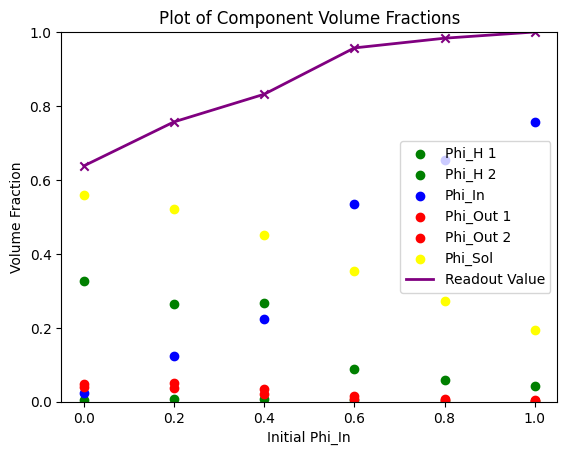

LOSS: 2.8783178891891827
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.80s/it]


[0.07609229 0.06229978]
[0.0533554  0.03752828]
[0.03597088 0.02298704]
[0.02337301 0.01636531]
[0.00706255 0.0026334 ]
[0.00448764 0.00150203]
[0.64519304 0.73979086 0.78940346 0.74232274 0.93939306 0.95215471]
NORM FACTOR 1.050249495756977


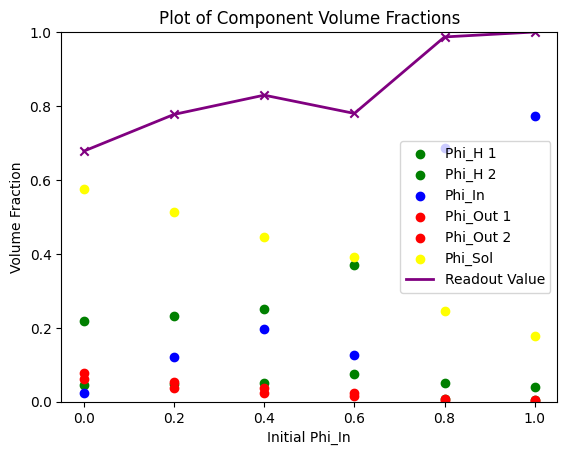

LOSS: 2.5780486358430226
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]

[0.04423586 0.03646235]
[0.03502757 0.0248481 ]
[0.02354222 0.01650064]
[0.01248713 0.00926565]
[0.00498047 0.00170908]
[0.00313376 0.00096217]
[0.64059997 0.73498454 0.74175444 0.70859466 0.94951026 0.96011682]
NORM FACTOR 1.0415399245953778


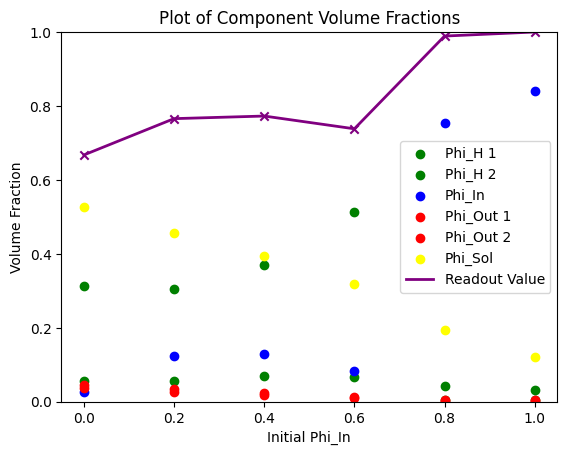

LOSS: 2.5915927793796714
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:18<00:00,  3.16s/it]

[0.06372332 0.05300767]
[0.04670715 0.03325398]
[0.03198328 0.02112021]
[0.01901341 0.01369059]
[0.00652068 0.00238588]
[0.00413143 0.00135565]
[0.63431803 0.73291806 0.7733606  0.72642235 0.94188435 0.95414156]
NORM FACTOR 1.0480625133228962


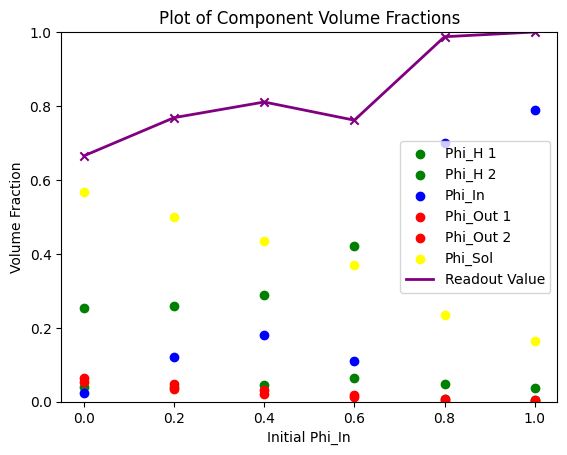

LOSS: 2.581643151939632
OUT OF BOUNDS
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:10<00:00,  1.69s/it]

[0.04039232 0.03283834]
[0.03219698 0.02261001]
[0.0215233  0.01516011]
[0.01012617 0.00761548]
[0.00444454 0.00148417]
[0.00279401 0.00083446]
[0.64997267 0.74068548 0.7389995  0.70037471 0.95239176 0.96232232]
NORM FACTOR 1.0391528715797795


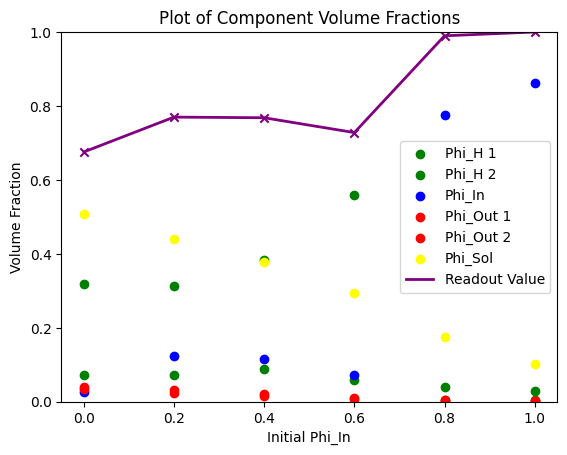

LOSS: 2.5815234607041493
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:16<00:00,  2.72s/it]

[0.05809929 0.048936  ]
[0.04388039 0.03155739]
[0.02986172 0.02007213]
[0.01645857 0.01210628]
[0.00633521 0.0023017 ]
[0.00406299 0.00132786]
[0.62566399 0.72713196 0.76428326 0.71385695 0.94278688 0.9545313 ]
NORM FACTOR 1.0476345815813517


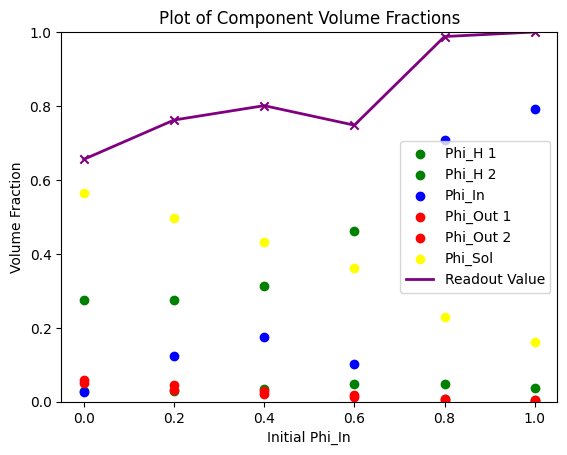

LOSS: 2.5797156460078865
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.79s/it]

[0.0534352  0.04566675]
[0.04653172 0.03369869]
[0.03131199 0.02073806]
[0.01614617 0.01201876]
[0.007219   0.00270946]
[0.00441842 0.00147336]
[0.61546202 0.72306443 0.77186905 0.70667006 0.93849864 0.9525357 ]
NORM FACTOR 1.0498294177740368


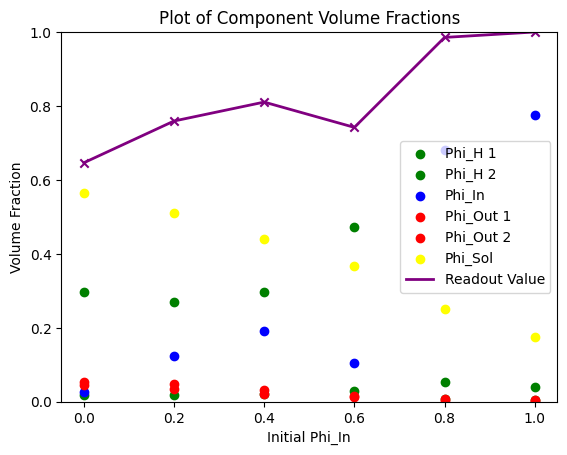

LOSS: 2.5640930430305886
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:23<00:00,  3.86s/it]

[0.04859141 0.0415957 ]
[0.04653584 0.03370064]
[0.03121655 0.02074247]
[0.01614624 0.0120188 ]
[0.00721985 0.00270984]
[0.00441842 0.00147336]
[0.61429739 0.72308237 0.77021046 0.70667061 0.93849549 0.95253568]
NORM FACTOR 1.0498294351159525


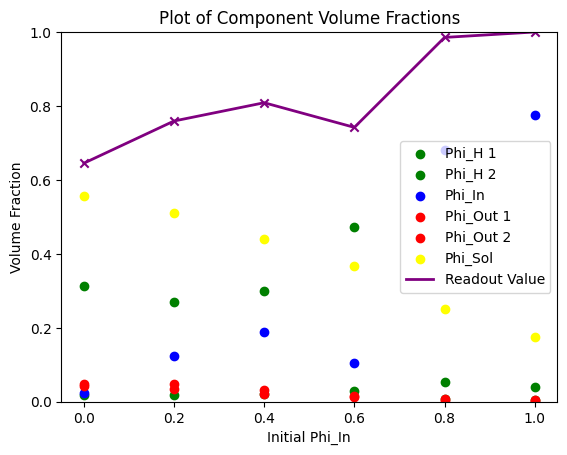

LOSS: 2.565734486302823
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.73s/it]

[0.05145637 0.04401136]
[0.04653568 0.03370042]
[0.03138296 0.02072098]
[0.01614627 0.01201882]
[0.00721971 0.00270978]
[0.00441843 0.00147337]
[0.61488843 0.72308404 0.77342864 0.70667077 0.93849598 0.95253565]
NORM FACTOR 1.0498294753809367


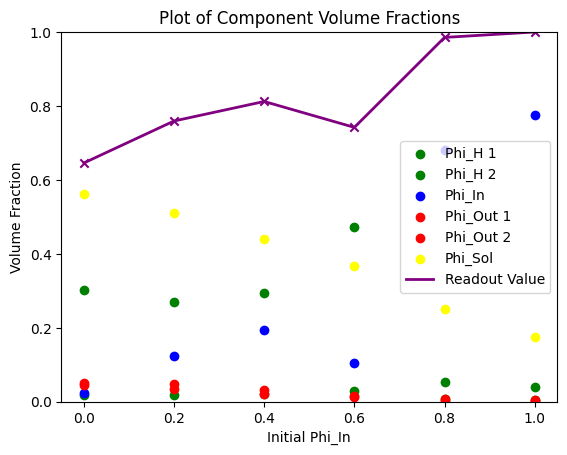

LOSS: 2.5638104005322164
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:17<00:00,  2.87s/it]


[0.0193326  0.01283973]
[0.01238709 0.00782412]
[0.00748944 0.00447394]
[0.00461526 0.00260408]
[0.00386846 0.00123861]
[0.00248951 0.00071813]
[0.77045691 0.79487791 0.81941165 0.84177478 0.95646395 0.96488701]
NORM FACTOR 1.036390775376963


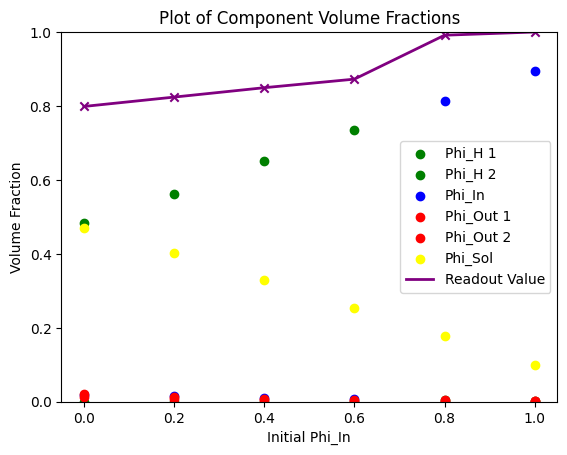

LOSS: 2.6817922601048663
OUT OF BOUNDS
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:16<00:00,  2.83s/it]


[0.01905283 0.01261747]
[0.01226845 0.00773848]
[0.0074892  0.00447382]
[0.00461521 0.00260406]
[0.00386844 0.00123861]
[0.00248951 0.00071813]
[0.77192098 0.79551882 0.81940944 0.84177359 0.95646381 0.96488702]
NORM FACTOR 1.0363907705084325


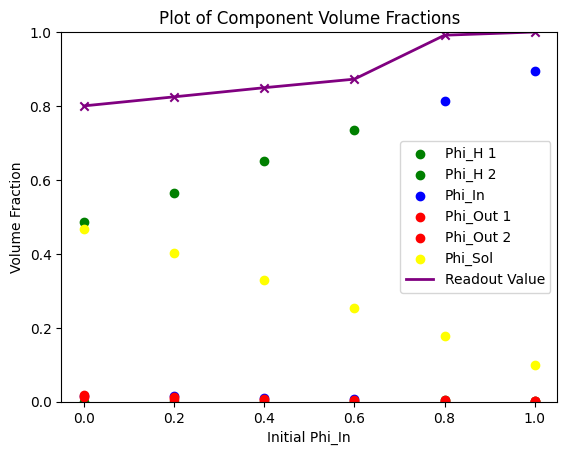

LOSS: 2.680858294154847
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.69s/it]

[0.05019843 0.04294722]
[0.04653556 0.03370066]
[0.0313512  0.02072948]
[0.01614614 0.01201875]
[0.00721906 0.00270948]
[0.00440184 0.0014662 ]
[0.6146944  0.72307842 0.77271141 0.70666951 0.93849838 0.95264894]
NORM FACTOR 1.0497046288663097


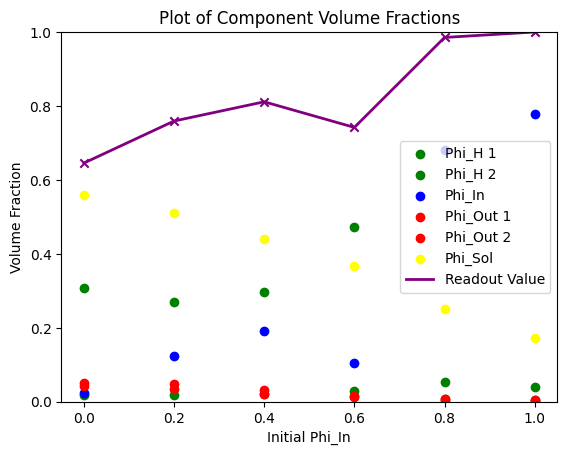

LOSS: 2.5645070894267397
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.73s/it]

[0.0575673  0.04910696]
[0.04653207 0.03369892]
[0.03122144 0.0207423 ]
[0.0161461  0.01201872]
[0.00721985 0.00270984]
[0.00441842 0.00147336]
[0.61676977 0.72306482 0.77029456 0.70666957 0.93849545 0.9525357 ]
NORM FACTOR 1.0498294162136368


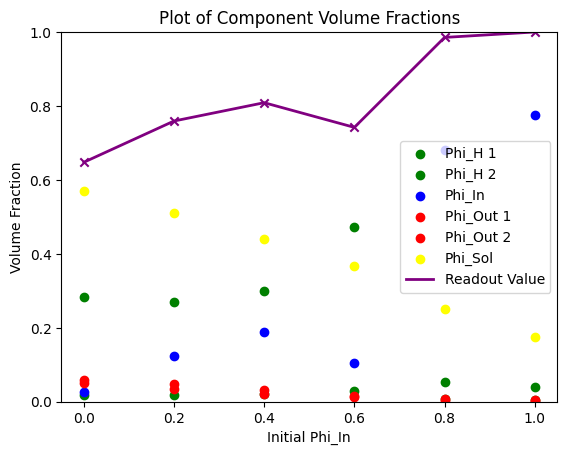

LOSS: 2.563802946366209
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.64s/it]

[0.04888223 0.04185197]
[0.04653193 0.03369886]
[0.03129581 0.02073736]
[0.01614599 0.01201864]
[0.00721986 0.00270984]
[0.00440186 0.00146621]
[0.61417384 0.72306411 0.77162431 0.70666897 0.93849546 0.95264886]
NORM FACTOR 1.0497047130137993


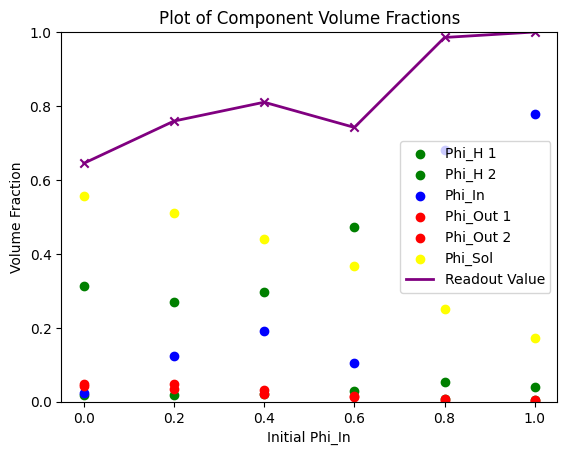

LOSS: 2.565405387798554
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.77s/it]

[0.05417008 0.04628054]
[0.04653168 0.0336988 ]
[0.03129709 0.02073989]
[0.01614633 0.01201886]
[0.007219   0.00270946]
[0.0044018  0.00146618]
[0.61567925 0.72306198 0.77158316 0.70667121 0.93849865 0.95264908]
NORM FACTOR 1.0497044697178886


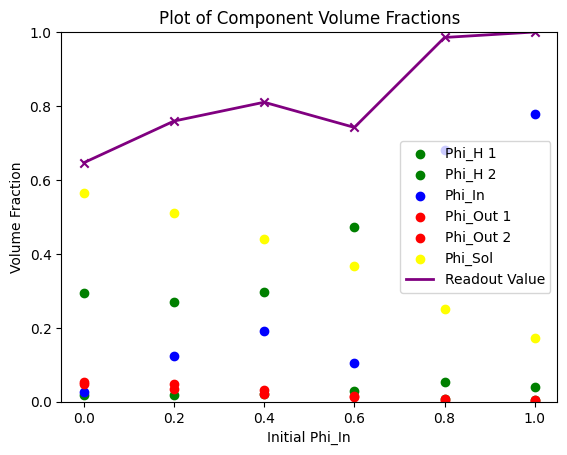

LOSS: 2.5642755415629956
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.77s/it]

[0.05198261 0.04445274]
[0.04653545 0.03370049]
[0.03135976 0.02072828]
[0.01614615 0.01201875]
[0.00721917 0.00270953]
[0.00440186 0.00146621]
[0.6150268  0.72308012 0.77287835 0.70666978 0.93849799 0.95264887]
NORM FACTOR 1.049704700014098


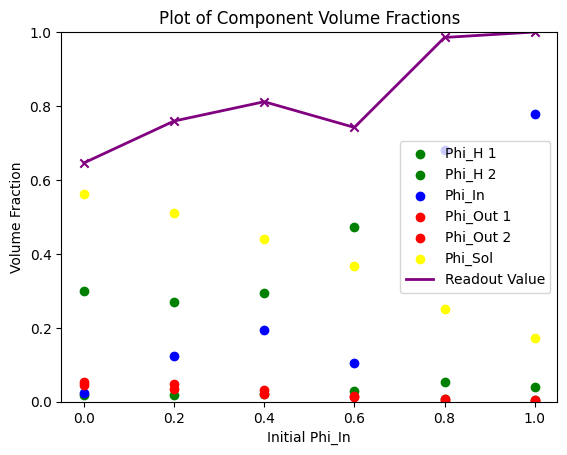

LOSS: 2.564173749886744
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.61s/it]

[0.04960699 0.04246722]
[0.04653569 0.03370048]
[0.03131068 0.02073676]
[0.01614599 0.01201864]
[0.00721972 0.00270978]
[0.00440188 0.00146622]
[0.6142617  0.7230832  0.77187983 0.70666895 0.93849591 0.9526488 ]
NORM FACTOR 1.0497047849667336


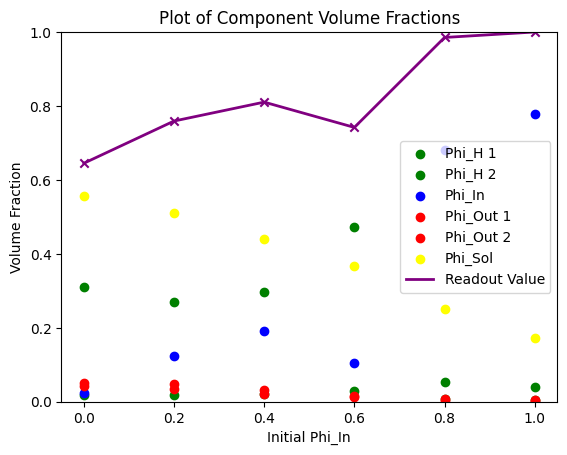

LOSS: 2.565211063957223
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.75s/it]

[0.05982105 0.05097415]
[0.04653203 0.03369846]
[0.03143042 0.02069994]
[0.01614644 0.01201893]
[0.00721909 0.0027095 ]
[0.00440188 0.00146621]
[0.61753408 0.72307238 0.77469886 0.70667157 0.93849825 0.95264879]
NORM FACTOR 1.0497047894698894


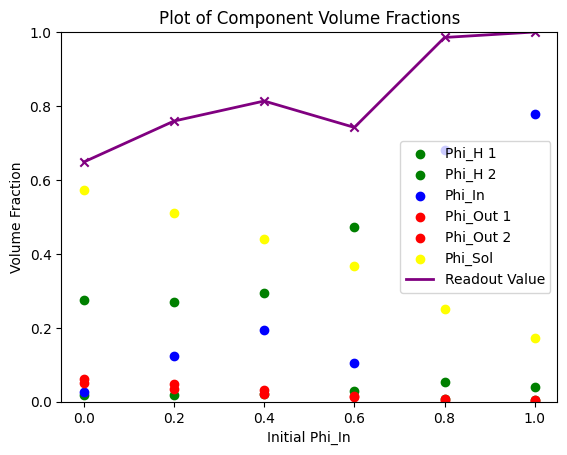

LOSS: 2.5614330947041846
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.77s/it]

[0.05426523 0.04636035]
[0.0465321  0.03369887]
[0.03135988 0.02072942]
[0.01614629 0.01201884]
[0.00721899 0.00270945]
[0.00441842 0.00147337]
[0.61570182 0.72306598 0.77285254 0.70667046 0.93849862 0.95253565]
NORM FACTOR 1.0498294689743064


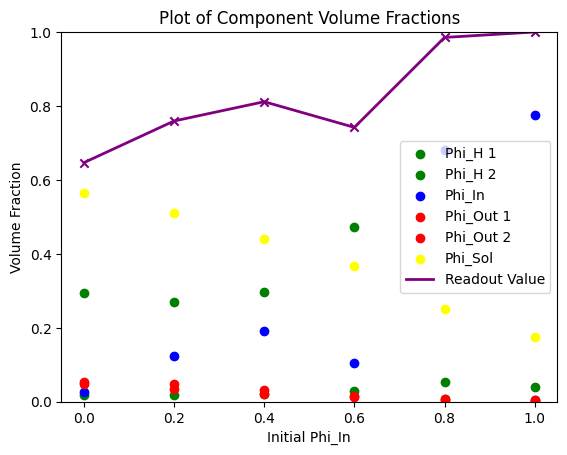

LOSS: 2.563460483131519
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.76s/it]

[0.05134359 0.04391963]
[0.04653212 0.03369888]
[0.03130127 0.02073961]
[0.01614599 0.01201865]
[0.00721916 0.00270953]
[0.00440182 0.00146619]
[0.61481227 0.72306607 0.77165783 0.70666889 0.93849807 0.95264903]
NORM FACTOR 1.0497045323921335


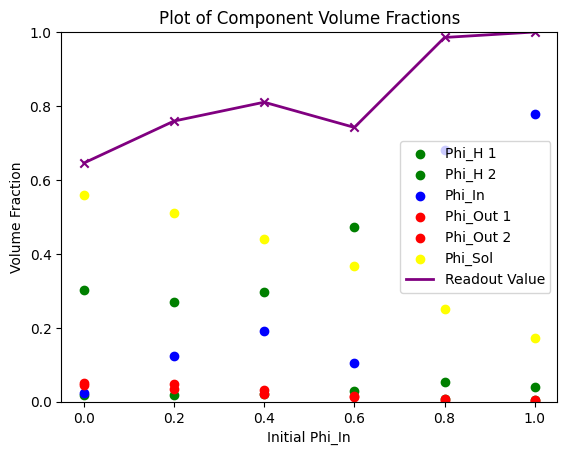

LOSS: 2.564901850896608
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:23<00:00,  3.87s/it]

[0.04995179 0.04275326]
[0.04653185 0.03369863]
[0.03129842 0.02073931]
[0.01614601 0.01201866]
[0.007219   0.00270946]
[0.00441843 0.00147337]
[0.61441267 0.72306718 0.77161897 0.70666915 0.93849862 0.95253565]
NORM FACTOR 1.0498294790375986


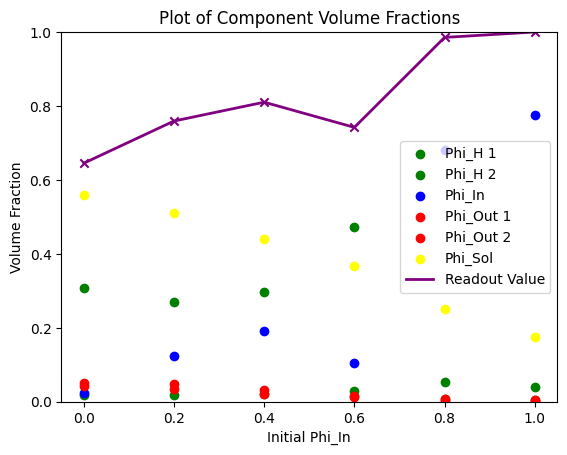

LOSS: 2.5650123799077607
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.56s/it]

[0.05034707 0.04308289]
[0.04653561 0.0337004 ]
[0.0313952  0.02071709]
[0.01614611 0.01201872]
[0.00721906 0.00270948]
[0.00440187 0.00146621]
[0.61455501 0.72308367 0.77371968 0.70666951 0.93849838 0.95264885]
NORM FACTOR 1.0497047226441771


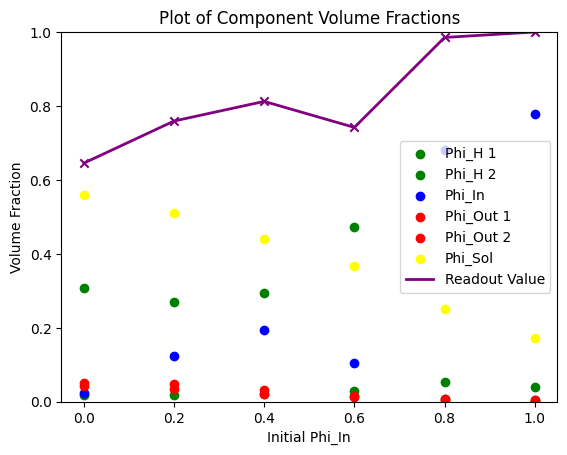

LOSS: 2.5641541135184998
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:22<00:00,  3.80s/it]

[0.05179061 0.04429172]
[0.04653178 0.03369889]
[0.03133704 0.0207337 ]
[0.01614636 0.01201889]
[0.00721976 0.0027098 ]
[0.00440186 0.00146621]
[0.61497629 0.72306167 0.77238035 0.70667087 0.93849574 0.95264886]
NORM FACTOR 1.0497047135734225


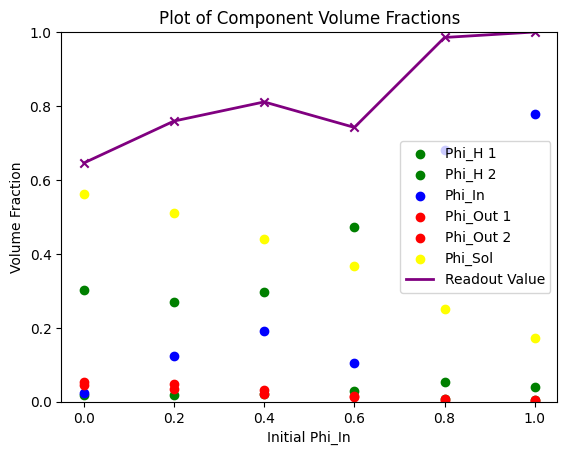

LOSS: 2.56444663309204
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:23<00:00,  3.87s/it]

[0.05202288 0.04448722]
[0.04653555 0.03370065]
[0.03129755 0.02073777]
[0.01614625 0.01201882]
[0.00721918 0.00270954]
[0.00441842 0.00147336]
[0.61502615 0.72307848 0.77164265 0.70667032 0.93849791 0.95253567]
NORM FACTOR 1.0498294527575065


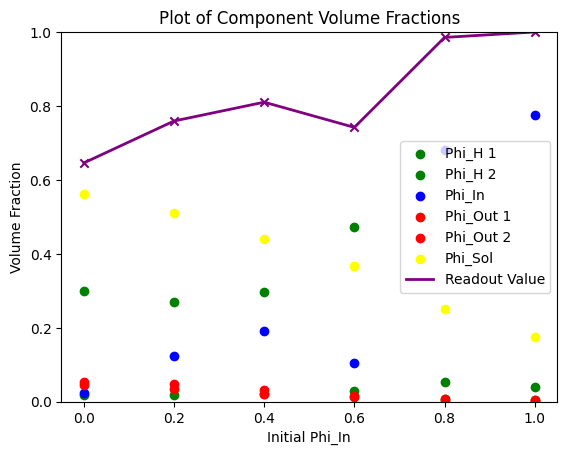

LOSS: 2.5645229297221306
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:23<00:00,  3.97s/it]

[0.05076917 0.04343827]
[0.04653546 0.03370033]
[0.0313076 0.0207388]
[0.01614613 0.01201873]
[0.00721902 0.00270947]
[0.00441838 0.00147335]
[0.61464969 0.72308289 0.77177997 0.70666984 0.93849852 0.95253588]
NORM FACTOR 1.049829216587899


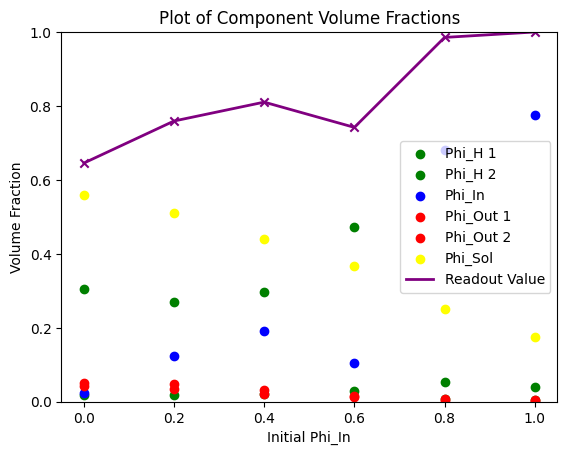

LOSS: 2.564748659679997
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:20<00:00,  3.42s/it]

[0.05147325 0.04402683]
[0.04653573 0.03370059]
[0.03130651 0.02073852]
[0.01614618 0.01201877]
[0.00721917 0.00270953]
[0.00440182 0.00146619]
[0.61487176 0.72308185 0.77176937 0.70666987 0.93849801 0.95264902]
NORM FACTOR 1.0497045366626627


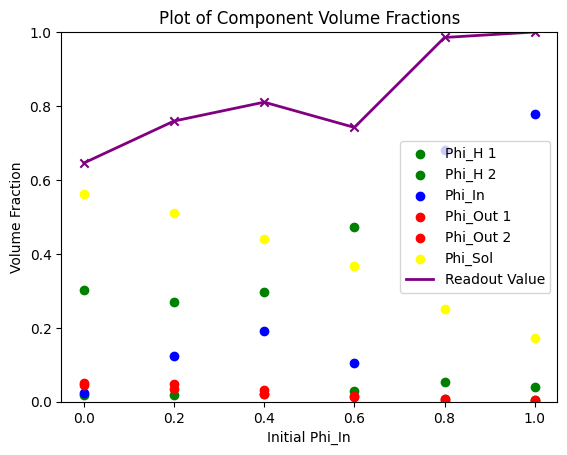

LOSS: 2.5647976178860725
IN BOUNDS


100%|█████████████████████████████████████████████| 6/6 [00:21<00:00,  3.66s/it]

[0.05631298 0.04806541]
[0.04653134 0.03369836]
[0.03133639 0.02073402]
[0.01614611 0.01201873]
[0.00721912 0.00270951]
[0.00440202 0.00146627]
[0.61635292 0.72306518 0.77236172 0.70666938 0.9384982  0.95264819]
NORM FACTOR 1.0497054484149406


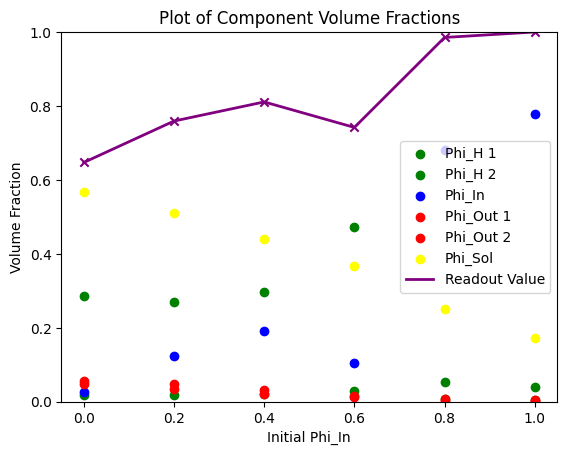

LOSS: 2.5633962160263435
IN BOUNDS


  0%|                                                     | 0/6 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [1429]:



phi_H_test_x = np.linspace(0.02,0.2,3)
phi_H_test_y = np.linspace(0.02,0.2,3)
'''
for x in phi_H_test_x:
    for y in phi_H_test_y:
        phi_H = [x,y]
        fc.evolve_components_flory_multi(phi_H)
'''
optimize_Flory(fc)

In [ ]:
[[0.         4.56773257 4.99769244 7.26942216 6.33696974 0.        ]
 [4.56773257 0.         4.98070968 7.85213976 8.09297775 0.        ]
 [4.99769244 4.98070968 0.         5.48274719 6.82967665 0.        ]
 [7.26942216 7.85213976 5.48274719 0.         5.28070182 0.        ]
 [6.33696974 8.09297775 6.82967665 5.28070182 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


test = FloryClassifier()

test.reset_rand_chi_matrix(5,4)
test.get_info()



In [ ]:

point_1 = [0.2,0.2,0.2,0.2,0.2]
phases_1  = test.evolve_flory_simple(point_1)

point_2 = [0.05,0.4,0.3,0.05,0.2]
phases_2 = test.evolve_flory_simple(point_2)


#print(phases.fractions)



Num comps: 5
Num Phase: 4
[0 1 2 3]
[[0.09913491 0.09211556 0.00234749 0.00640205]
 [0.00939492 0.17690074 0.00505049 0.00865385]
 [0.00259639 0.0451847  0.14781612 0.00440279]
 [0.00596679 0.08789387 0.00389233 0.10224701]
 [0.02237024 0.1285752  0.02521024 0.02384432]]
5
[0 1 2 3]
Num comps: 5
Num Phase: 2
[0 1]
[[0.04679491 0.00320509]
 [0.36632582 0.03367419]
 [0.18298462 0.11701538]
 [0.04276421 0.00723579]
 [0.1651969  0.0348031 ]]
5
[0 1]


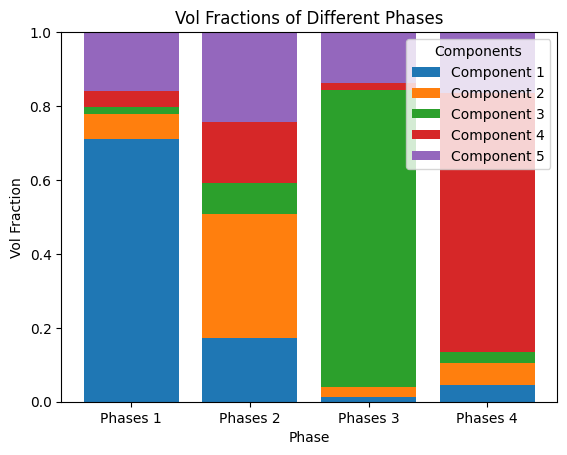

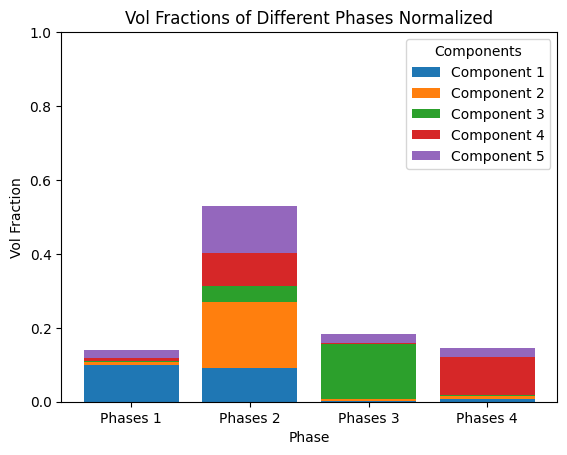

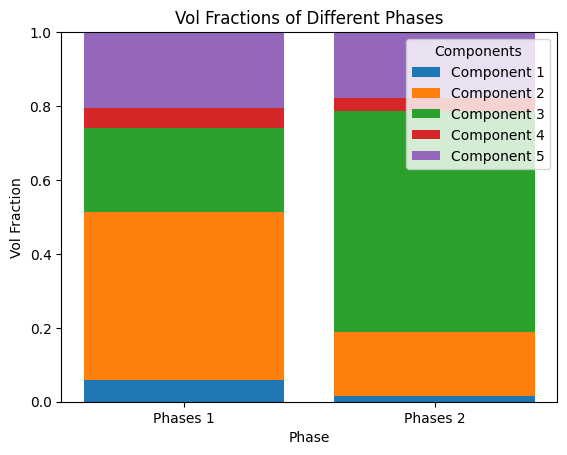

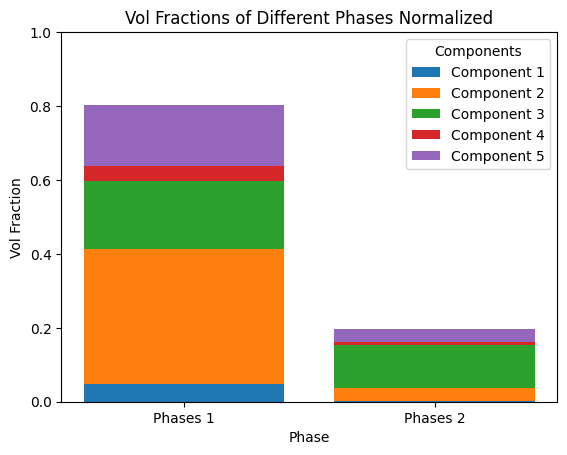

In [1304]:
plots.plot_phases(phases_1)
plots.plot_phases_vol_norm(phases_1)

plots.plot_phases(phases_2)
plots.plot_phases_vol_norm(phases_2)



In [1189]:
'''
phi_H_test_x = np.linspace(0.02,0.2,3)
phi_H_test_y = np.linspace(0.02,0.2,3)

for x in phi_H_test_x:
    for y in phi_H_test_y:
        phi_H = [x,y]
        test.evolve_components_flory_multi_clean(phi_H)
 '''

'\nphi_H_test_x = np.linspace(0.02,0.2,3)\nphi_H_test_y = np.linspace(0.02,0.2,3)\n\nfor x in phi_H_test_x:\n    for y in phi_H_test_y:\n        phi_H = [x,y]\n        test.evolve_components_flory_multi_clean(phi_H)\n '

# Test Chi_Matrix

Chi_Strength = 3


KeyboardInterrupt: 

In [1596]:

def plot_phases_and_vol_norms(phases):
        volumes = phases.volumes
        print(volumes)
        phases = phases.fractions
        components = phases.T
        
        num_phases = components.shape[1]
        num_comps = components.shape[0]
       
        #print(f"Num comps: {num_comps}")
        #print(f"Num Phase: {num_phases}")
        x = np.arange(num_phases)
        #print(x)
        phases_index = []
        for i in range(num_phases ):
            phases_index.append(f'Phases {i +1}')
            
        plt.figure(figsize=(6,10))
        plt.subplot(1, 2, 1)
       
    
        bottom = np.zeros(num_phases)
        for i in range(0,num_comps):
            plt.bar(x, components[i], label = f'Component {i + 1}', bottom = bottom)
            bottom += components[i]
        
        #plt.bar(x, phases[i], label = f'Componenet {i + 1}', bottom = phases[i-1])

        plt.title('Vol Fracs of Phases')
        plt.xlabel('Phase')
        plt.ylabel('Vol Fraction')
        plt.ylim([0,1])
        plt.xticks(x, phases_index)
        plt.legend(title="Components", loc="upper right") 

        count = 0
        for phase in phases:
            print(count)
            phase = phase * volumes[count]
            phases[count] = phase
            count +=1
            
        #print(x)
        phases_index = []
        for i in range(num_phases ):
            phases_index.append(f'Phases {i +1}')
        plt.subplot(1, 2, 2)
    
        bottom = np.zeros(num_phases)
        for i in range(num_comps):
            plt.bar(x, components[i], label = f'Component {i + 1}', bottom = bottom)
            bottom += components[i]
        
        #plt.bar(x, phases[i], label = f'Componenet {i + 1}', bottom = phases[i-1])
        plt.title('Vol Fractions Normalized')
        plt.xlabel('Phase')
        plt.ylabel('Vol Fraction')
        plt.ylim([0,1])
        plt.xticks(x, phases_index)
        plt.legend(title="Components", loc="upper right") 
        


Evolved Point: [0.18328241 0.         0.81671759]
Evolved Point: [0.88129893 0.         0.11870107]
[0.16543947 0.83456053]
0
1
[0.90277952 0.09722048]
0
1


'\nplot_phases(phases)\nplot_phases_vol_norm(phases)\nplot_phases(phases_2)\nplot_phases_vol_norm(phases_2)\n'

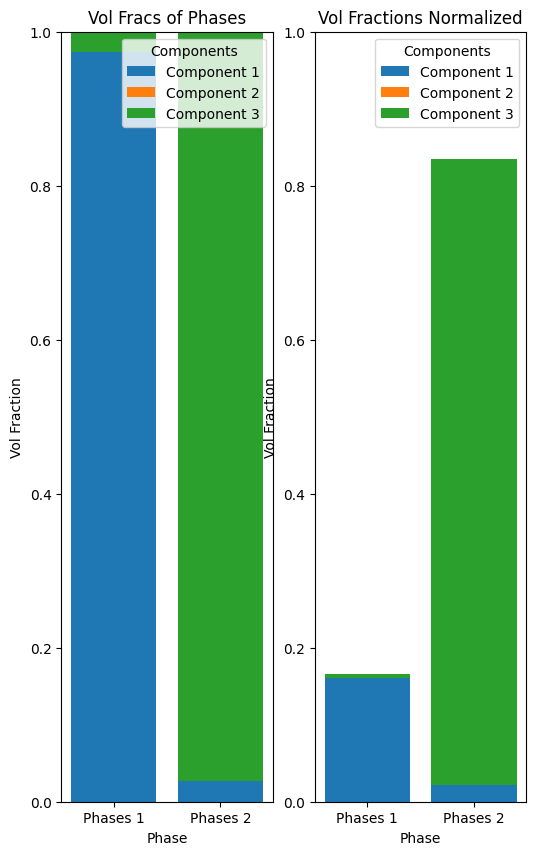

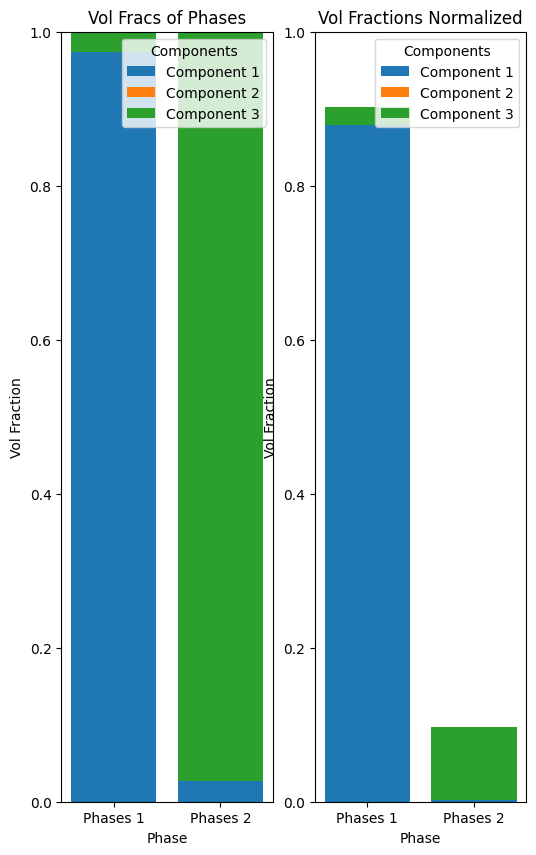

In [1597]:
test_flory = FloryClassifier()
num_comps = 3
chi = [[0.0, 4.2,3.8],
       [4.2,0.0,7.0],
       [3.8,7.0,0.0]]
test_flory.set_chi_matrix_multi(chi)
#print(test_flory.chi_matrix)
phases = test_flory.pick_point(num_comps, phi_H=[0])
phases_2 = test_flory.pick_point(num_comps, phi_H=[0])

plot_phases_and_vol_norms(phases)
plot_phases_and_vol_norms(phases_2)
'''
plot_phases(phases)
plot_phases_vol_norm(phases)
plot_phases(phases_2)
plot_phases_vol_norm(phases_2)
'''

[[ 0.          1.79747145  5.12115037 10.18597822 10.98686074  0.        ]
 [ 1.79747145  0.          4.40702384 10.98837522  8.91771901  0.        ]
 [ 5.12115037  4.40702384  0.          9.15133881 10.51181062  0.        ]
 [10.18597822 10.98837522  9.15133881  0.         10.92166926  0.        ]
 [10.98686074  8.91771901 10.51181062 10.92166926  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


# Check if Phase Exists Function

V1: Takes in a set of phases and sees if the phase exists.Returns True or False
V2: Takes in a set of phases and sees if a range of phases exists.
V3: Takes in a set of phases and sees if multiple range of phases exists


In [1732]:
def phase_exists(phases, phase_key_range):

    phases = phases.fractions
    phases_shape = np.shape(phases)
    num_comps = phases_shape[1]
    num_phases = phases_shape[0]
    
    phase_fit = np.zeros(phases_shape)
    phase_count = 0
    for phase in phases:        
        for i in range(num_comps):
            max_val = phase_key_range[i]
            if phase[i] <= max_val:
                phase_fit[phase_count][i] = 1
            else:
                phase_fit[phase_count][i] = 0
        phase_count +=1

    '''
    print(f"Phases Vol Fracs: \n {phases}")
    print(f"Phase_Key range: \n {phase_key_range}")
    print(f"Phase_fit: \n {phase_fit}")
    '''
    phase_bool = np.zeros(num_phases)
    for i in range(num_phases):
        if np.sum(phase_fit[i]) == num_comps:
            phase_bool[i] = 1
            print(f"Phase {i + 1} Fits")
        else:
            print(f"Phase {i + 1} Doesn't Fit")

        
    return phase_bool
                
    

In [1725]:
test = FloryClassifier()
phases = test.pick_point(6,auto_chi = True)

Reset CHI_MATRIX: 
 [[0.         2.47409054 4.19439328 3.36417389 4.02061201 0.        ]
 [2.47409054 0.         3.17027969 4.08056469 3.70053165 0.        ]
 [4.19439328 3.17027969 0.         4.66817451 4.13984897 0.        ]
 [3.36417389 4.08056469 4.66817451 0.         2.913822   0.        ]
 [4.02061201 3.70053165 4.13984897 2.913822   0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
Evolved Point: [0.20647255 0.11725299 0.22582307 0.15474235 0.1113648  0.18434424]


Num comps: 6
Num Phase: 2
[0 1]


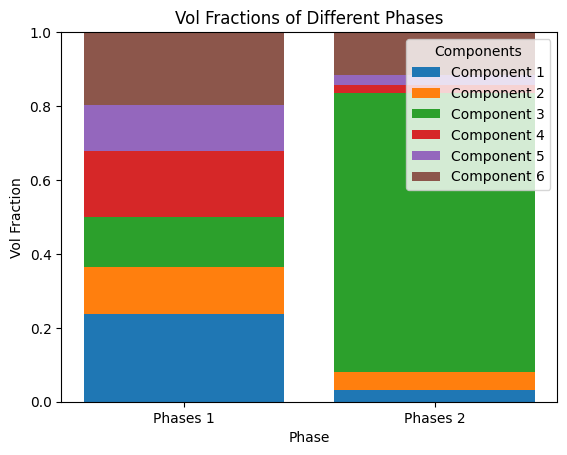

In [1726]:
plot_phases(phases)


In [1698]:
phases.fractions

array([[0.49160874, 0.08170928, 0.0523868 , 0.24593433, 0.02868535,
        0.09967547],
       [0.02211245, 0.0074772 , 0.8841661 , 0.01563366, 0.01349323,
        0.05711736],
       [0.32788359, 0.10484742, 0.0524687 , 0.38486098, 0.02572711,
        0.10421222]])

In [1781]:
phase_key_range = [0.8,0.8,0.8,0.8,0.8,0.8]
phase_fit = phase_exists(phases, phase_key_range)

Phase 1 Fits


In [1778]:
phi_H = [0.1,0.1]
test.num_of_points = 4
test.reset_rand_chi_matrix(6,6)
evolved_points = test.evolve_components_flory_all_phases(phi_H)

Reset CHI_MATRIX: 
 [[0.         6.85772065 7.82524955 5.76314637 5.57801514 0.        ]
 [6.85772065 0.         5.00483784 5.8068998  7.77421694 0.        ]
 [7.82524955 5.00483784 0.         5.85832138 3.85318491 0.        ]
 [5.76314637 5.8068998  5.85832138 0.         6.12012715 0.        ]
 [5.57801514 7.77421694 3.85318491 6.12012715 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


100%|█████████████████████████████████████████████| 4/4 [00:15<00:00,  3.96s/it]


In [1782]:
evolved_points[3].fractions

array([[0.71771796, 0.00525409, 0.00248072, 0.01216369, 0.0131492 ,
        0.24923434],
       [0.00571406, 0.70042809, 0.02145585, 0.01274822, 0.00299267,
        0.2566611 ],
       [0.01420306, 0.01378664, 0.01237936, 0.68305175, 0.01054259,
        0.26603661],
       [0.02312252, 0.00820358, 0.09096744, 0.02019245, 0.53766953,
        0.31984446],
       [0.02601252, 0.04819612, 0.30411604, 0.05177203, 0.17399041,
        0.39591287]])

In [1783]:
phase_exists(evolved_points[3], phase_key_range)

Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Fits


array([1., 1., 1., 1., 1.])

In [1785]:
data = []
phase_key_range = [1,1,1,1,1,1]



for phases in evolved_points:
    #plot_phases_and_vol_norms(phases)
    phase_bool = phase_exists(phases,phase_key_range)
    if 1 in phase_bool:
        data.append(1)
    else:
        data.append(0)
print(f"Data: {data}")

test.phi_in_range = [0.02,0.3]


Phase 1 Fits
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Fits
Data: [1, 1, 1, 1]


100%|█████████████████████████████████████████████| 8/8 [00:24<00:00,  3.03s/it]

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Fits
True
Phase 1 Fits
Phase 2 Fits
True
Phase 1 Fits
Phase 2 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
True
Data: [0, 0, 0, 0, 1, 1, 1, 1]


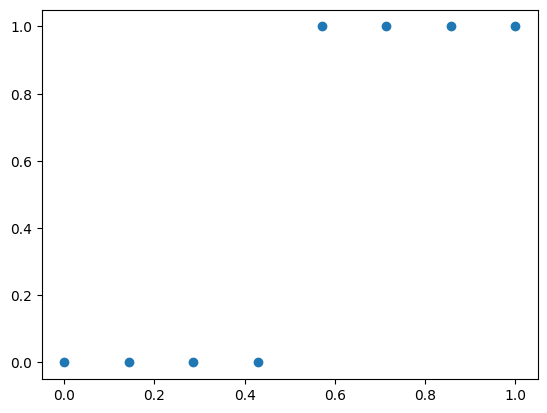

100%|█████████████████████████████████████████████| 8/8 [00:20<00:00,  2.62s/it]

Phase 1 Doesn't Fit
False
Phase 1 Doesn't Fit
False
Phase 1 Fits
True
Phase 1 Fits
Phase 2 Fits
True
Phase 1 Fits
Phase 2 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Data: [0, 0, 1, 1, 1, 1, 1, 1]


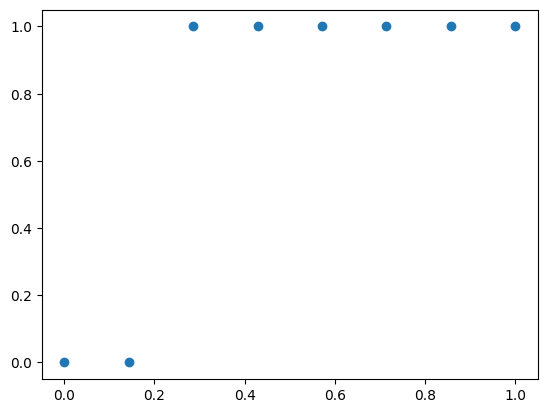

100%|█████████████████████████████████████████████| 8/8 [00:29<00:00,  3.63s/it]

Phase 1 Fits
True
Phase 1 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
Phase 5 Fits
True
Phase 1 Fits
Phase 2 Fits
Phase 3 Fits
Phase 4 Fits
True
Data: [1, 1, 1, 1, 1, 1, 1, 1]


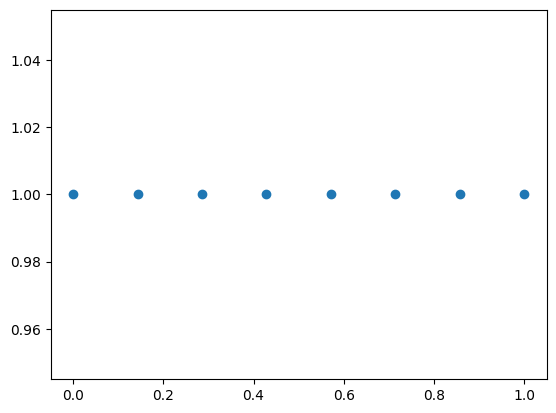

 25%|███████████▎                                 | 2/8 [00:06<00:19,  3.18s/it]


KeyboardInterrupt: 

In [1791]:

phi_H_test_x = np.linspace(0.02,0.2,3)
phi_H_test_y = np.linspace(0.02,0.2,3)

test.num_of_points = 8
for x in phi_H_test_x:
    for y in phi_H_test_y:
        phi_H = [x,y]
        evolved_points = test.evolve_components_flory_all_phases(phi_H, plotFlag = False)
        #print(f"Evolved Points {evolved_points}")
        data = []
        cutoff = 1
        phase_key_range = [1,1,1,1,0.6,0.6]
        phase_key_range = cutoff*np.array(phase_key_range)
        for phases in evolved_points:
            #plot_phases_and_vol_norms(phases)
            phase_bool = phase_exists(phases,phase_key_range)
            #print(f"phases_bool {phase_bool}")
            if 1 in phase_bool:
                data.append(1)
                print("True")
            else:
                data.append(0)
                print("False")
                
        norm_points = np.linspace(0,1,len(evolved_points))
        print(f"Data: {data}")
        plt.figure()
        plt.scatter(norm_points,data)
        plt.show()
        


In [1809]:
data = generate_data_plane(3,3,[0.02,0.3],[0.02,0.3])

100%|█████████████████████████████████████████████| 8/8 [00:23<00:00,  2.98s/it]


ValueError: setting an array element with a sequence.

In [1965]:
fc = FloryClassifier()
'''
square_matrix = 6*np.ones((6,6))
for i in range((square_matrix.shape[0])):
    square_matrix[i][i] = 0

print(square_matrix)
'''
chi_matrix = gen.chi_matrix_strong_out(6,2,4,7)
print(chi_matrix)
fc.set_chi_matrix_multi(chi_matrix)
#fc.reset_rand_chi_matrix(6,5)
fc.get_info()


[[0.         2.49820246 3.96752676 8.02822632 7.01292037 0.        ]
 [2.49820246 0.         2.58809164 7.1587963  6.726589   0.        ]
 [3.96752676 2.58809164 0.         7.28123713 5.94068322 0.        ]
 [8.02822632 7.1587963  7.28123713 0.         5.53771485 0.        ]
 [7.01292037 6.726589   5.94068322 5.53771485 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
num_comps: 6 
H_DIM: 2
Phi_out_vector: [0.1, 0.1]
Phi_in_range: [0.02, 0.4]
num_of_points: 6
CHI_STRENGTH: 4 
 CHI_MATRIX: 
 [[0.         2.49820246 3.96752676 8.02822632 7.01292037 0.        ]
 [2.49820246 0.         2.58809164 7.1587963  6.726589   0.        ]
 [3.96752676 2.58809164 0.         7.28123713 5.94068322 0.        ]
 [8.02822632 7.1587963  7.28123713 0.         5.53771485 0.        ]
 [7.01292037 6.726589   5.94068322 5.53771485 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


Evolved Point: [0.15, 0.15, 0.15, 0.15, 0.15, 0.25]
[[0.00099377 0.0033098  0.00104307 0.14465336]
 [0.11556062 0.00337591 0.00060648 0.03045698]
 [0.00309768 0.10042449 0.00174317 0.04473465]
 [0.00072899 0.00220661 0.12670265 0.02036175]
 [0.00346277 0.00257415 0.00100442 0.14295866]
 [0.02735276 0.02768002 0.026157   0.16881022]]
6
[0 1 2 3]


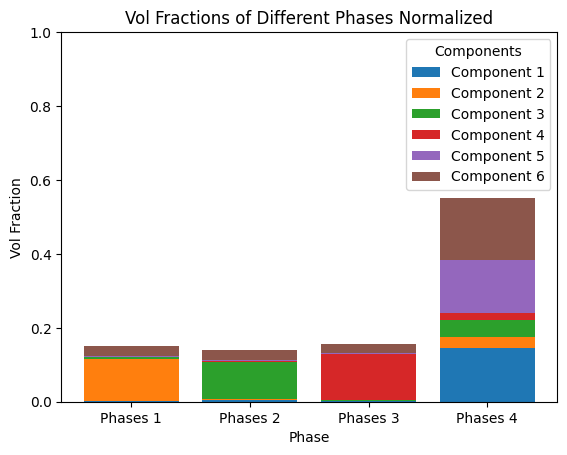

In [1962]:
phases = fc.pick_point(6, phi_H = [0.15,0.15,0.15,0.15,0.15,0.25])
plots.plot_phases_vol_norm(phases)

[[1.50254051e-04 4.61952458e-04 1.64030308e-04 7.98451284e-02]
 [1.74723724e-02 4.71179744e-04 9.53734117e-05 1.68115120e-02]
 [4.68359299e-04 1.40163450e-02 2.74125651e-04 2.46924373e-02]
 [1.10221348e-04 3.07978876e-04 1.99248520e-02 1.12391888e-02]
 [5.23558929e-04 3.59276425e-04 1.57951505e-04 7.89096990e-02]
 [4.13564475e-03 3.86332719e-03 4.11336633e-03 9.31791256e-02]]
6
[0 1 2 3]


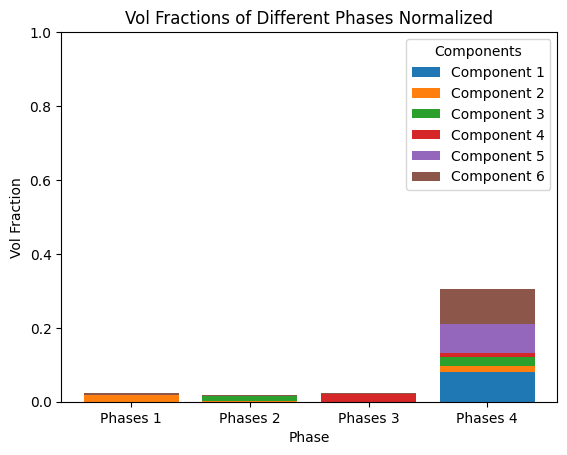

In [1963]:
plots.plot_phases_vol_norm(phases)

Evolved Point: [0.15, 0.2, 0.1, 0.15, 0.15, 0.25]
[[0.00144269 0.00160422 0.00105144 0.14590165]
 [0.16699244 0.00163621 0.00061161 0.03075974]
 [0.00449288 0.04839965 0.0017565  0.04535097]
 [0.00105859 0.00106988 0.12723988 0.02063166]
 [0.00501095 0.00124561 0.00101044 0.14273301]
 [0.03969608 0.01341216 0.0263747  0.17051707]]
6
[0 1 2 3]


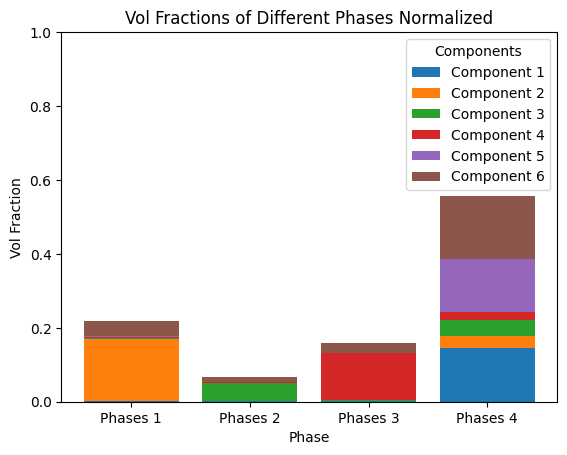

In [1964]:
phases = fc.pick_point(6, phi_H = [0.15,0.2,0.1,0.15,0.15,0.25])
plots.plot_phases_vol_norm(phases)

In [1966]:
fc = FloryClassifier()

chi_matrix = gen.chi_matrix_strong_out(6,2,4,7)
print(chi_matrix)
fc.set_chi_matrix_multi(chi_matrix)
#fc.reset_rand_chi_matrix(6,5)
fc.get_info()
phi_H = [0.15,0.2]
evolved_points = fc.evolve_components_flory_multi(phi_H)

[[0.         4.21492375 3.16128607 7.14779078 7.82957319 0.        ]
 [4.21492375 0.         4.96221155 4.95578176 7.24052105 0.        ]
 [3.16128607 4.96221155 0.         6.52384252 7.57301457 0.        ]
 [7.14779078 4.95578176 6.52384252 0.         6.02687188 0.        ]
 [7.82957319 7.24052105 7.57301457 6.02687188 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
num_comps: 6 
H_DIM: 2
Phi_out_vector: [0.1, 0.1]
Phi_in_range: [0.02, 0.4]
num_of_points: 6
CHI_STRENGTH: 4 
 CHI_MATRIX: 
 [[0.         4.21492375 3.16128607 7.14779078 7.82957319 0.        ]
 [4.21492375 0.         4.96221155 4.95578176 7.24052105 0.        ]
 [3.16128607 4.96221155 0.         6.52384252 7.57301457 0.        ]
 [7.14779078 4.95578176 6.52384252 0.         6.02687188 0.        ]
 [7.82957319 7.24052105 7.57301457 6.02687188 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


[[0.02  0.15  0.2   0.1   0.1   0.43 ]
 [0.096 0.15  0.2   0.1   0.1   0.354]
 [0.172 0.15  0.2   0.1   0.1   0.278]
 [0.248 0.15  0.2   0.1   0.1   0.202]
 [0.324 0.15  0.2   0.1   0.1   0.126]
 [0.4   0.15  0.2   0.1   0.1   0.05 ]]


100%|█████████████████████████████████████████████| 6/6 [00:26<00:00,  4.39s/it]

Data: [[0.02250724 0.22067106 0.12097638 0.11675833 0.04032867 0.47875832]
 [0.14262094 0.10260836 0.32156855 0.03127225 0.01494599 0.38698379]
 [0.26101281 0.08594333 0.30816308 0.01882269 0.00902012 0.31703796]
 [0.52826223 0.06011851 0.16648575 0.00795897 0.00403736 0.23313719]]
[0.11675833 0.04032867]
TEST
[0.03127225 0.01494599]
TEST
[0.01882269 0.00902012]
TEST
[0.00795897 0.00403736]
TEST
[0.0032834  0.00167175]
TEST
[0.00166445 0.00082279]
TEST
[0.524308   0.51765479 0.51759615 0.5163392  0.51625666 0.5169132 ]


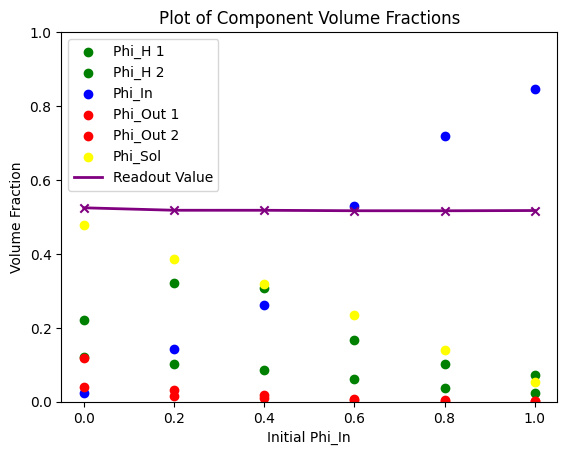

In [1970]:
evolved_points

array([[2.25072403e-02, 2.20671057e-01, 1.20976379e-01, 1.16758327e-01,
        4.03286663e-02, 4.78758323e-01],
       [1.42620937e-01, 1.02608357e-01, 3.21568555e-01, 3.12722476e-02,
        1.49459942e-02, 3.86983788e-01],
       [2.61012811e-01, 8.59433304e-02, 3.08163083e-01, 1.88226890e-02,
        9.02011523e-03, 3.17037964e-01],
       [5.28262232e-01, 6.01185145e-02, 1.66485745e-01, 7.95896779e-03,
        4.03736283e-03, 2.33137192e-01],
       [7.18784676e-01, 3.60040263e-02, 1.01305634e-01, 3.28340156e-03,
        1.67174909e-03, 1.38950487e-01],
       [8.46255702e-01, 2.43733485e-02, 7.30509031e-02, 1.66445022e-03,
        8.22786610e-04, 5.38328334e-02]])